# Introduction and Motivation

I am interested in analyzing the factors that cause loan defaults for small businesses. As I am highly aware of the plights and challenges that small businesses face, especially with the increases in small mom and pop shops closing their doors due to the pandemic, I became fascinated at learning about loan default risks for small businesses. There are two major objectives of this project: To determine the factors that affect whether a small business can pay off their loan in time and also whether we can successfully predict whether a small business loan will default based on various factors such as geographical location, the time the loan was approved by the bank, the industry sector the business belongs to, etc.

# Table of Contents
<a href='#1.0'><b><h2>1.0 Project Background<b></a><br>
<a href='#2.0'><b><h2>2.0 Load, Prepare, and Explore Data<b></a><br>
<a href='#2.1'><b><h3>2.1 Load Data<b></a><br>
<a href='#2.2'><b><h3>2.2 Data Exploration, Cleaning, and Feature Engineering<b></a><br>
<a href='#2.3'><b><h3>2.3 EDA - Summary Statistics<b></a><br>
<a href='#2.4'><b><h3>2.4 Removing Redundant Columns and Loans with Null Values<b></a><br>
<a href='#2.5'><b><h3>2.5 EDA - Analysis of Loan Default Rate<b></a><br>
<a href='#3.0'><b><h2>3.0 Machine Learning Modelling<b></a><br>
<a href='#3.1'><b><h3>3.1 Metric Selection<b></a><br>
<a href='#3.2'><b><h3>3.2 Feature Selection and Train, Test, Split<b></a><br>
<a href='#3.3'><b><h3>3.3 Model Development<b></a><br>
<a href='#3.3.1'><b><h4>3.3.1 Logistic Regression<b></a><br>
<a href='#3.3.2'><b><h4>3.3.2 Decision Tree Classifier<b></a><br>
<a href='#3.3.3'><b><h4>3.3.3 Random Forest Classifier<b></a><br>
<a href='#3.3.4'><b><h4>3.3.4 XGBoost<b></a><br>
<a href='#3.3.5'><b><h4>3.3.5 Neural Networks<b></a><br>
<a href='#3.4'><b><h3>3.4 Model Selection<b></a><br>
<a href='#3.5'><b><h3>3.5 Model Interpretation for XGBoost<b></a><br>
<a href='#4.0'><b><h2>4.0 Final Insights and Recommendations<b></a><br>
<a href='#4.1'><b><h3>4.1 Algorithm<b></a><br>
<a href='#4.2'><b><h3>4.2 Recommendations Based on Model Interpretation<b></a><br>
<a href='#4.3'><b><h3>4.3 Considerations<b></a><br>

<a id='1.0'></a>
# 1.0 Project Background

For this project, I am analyzing and predicting whether a loan default will occur for small business loans. The dataset was obtained from Kaggle and consists of data from Small Business Administration (SBA), a US government entity that provides assistance to help small businesses grow. The dataset can be obtained from the Dataset Source below. If the dataset no longer exists, please reach out to me at nathanling9730@gmail.com and I will send it to you accordingly.

SBA Background Source: https://www.investopedia.com/terms/s/small-business-administration.asp

Dataset Source: https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied

<a id='2.0'></a>
# 2.0 Load, Prepare, and Explore Data

<a id='2.1'></a>
## 2.1 Load Data

Importing libraries necessary for data cleaning, analysis, and feature engineering

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Load and see what the data looks like

**Important Note:** Make sure the csv file downloaded from Kaggle is still called 'SBAnational.csv'. Otherwise, rename it.

In [105]:
SBA_loan_data=pd.read_csv('SBAnational.csv')
SBA_loan_data.head(2)

C:\Users\Nathan Ling\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"


Exploring the different columns in the dataset

In [106]:
SBA_loan_data.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

Analyzing the number of rows and columns in this dataset

In [107]:
print(f'The number of rows is {SBA_loan_data.shape[0]} and columns is {SBA_loan_data.shape[1]}.')

The number of rows is 899164 and columns is 27.


Analyzing the data types

**Insights:** Most features are objects, or strings, even for numerical values such as the gross disbursement and balance. They will need to be converted to numeric values later.

In [108]:
SBA_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

Finding all of the null values

**Insights:** Appears ChgOffDate has the most null values. Reason is likely because most loans are not charged off

In [109]:
SBA_loan_data.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

<a id='2.2'></a>
## 2.2 Data Exploration, Cleaning, and Feature Engineering

This section entails exploring the different values as well as the frequencies within each feature to identify values such as "unknown" or other non sensical values (eg. a value of "R" for a feature which only takes "Y" for yes or "N" for no). These values will be converted to null values as they are equivalent to nulls since they do not provide insights into the data.

Other data cleaning includes converting data to the right format (eg. removing "$" signs from numeric columns and then converting to floats) so that we can visualize trends and the ML models can properly ingest the data.

We also create new features based on analyzing the existing features in more depth.

Filtering out the database to **ONLY** include labels that are not null.

**Insights:** Only a small amount of data had null output values

In [110]:
SBA_loan_data=SBA_loan_data[pd.notna(SBA_loan_data['MIS_Status'])]
print(f'The number of rows is {SBA_loan_data.shape[0]} and columns is {SBA_loan_data.shape[1]}.')

The number of rows is 897167 and columns is 27.


Finding out how imbalanced the output variable is. "P I F" represents paid in full, meaning the conditions of the loan were honoured. On the other hand, "CHGOFF" represents a delinquent loan that will not ever be paid off, meaning the loan was bad.

In [111]:
SBA_loan_data['MIS_Status'].unique()

array(['P I F', 'CHGOFF'], dtype=object)

Replacing the MIS_Statuses with 0s and 1s.

In [112]:
SBA_loan_data['MIS_Status']=SBA_loan_data['MIS_Status'].map({'P I F': 0, 'CHGOFF': 1})

Finding all the unique company names, banks, different cities, zip codes, and states (company and bank states)

**Insights:** Given that there's nearly 780000 different companies, 6000 banks, 33000 unique cities, and 34000 zip codes it would be very difficult to bucket these attributes into a form that the ML algorithms can use.

In [113]:
for column in ['Name', 'Bank', 'City', 'Zip', 'State', 'BankState']:
    print(f'{column} column has {SBA_loan_data[column].nunique()} unique values')

Name column has 778679 unique values
Bank column has 5801 unique values
City column has 32566 unique values
Zip column has 33602 unique values
State column has 51 unique values
BankState column has 56 unique values


Analyzing the different franchise codes

In [114]:
SBA_loan_data['FranchiseCode'].unique()

array([    1,     0, 15100, ...,  2899, 18701, 15930], dtype=int64)

We are interested in creating a new feature that buckets the different businesses into whether they are a franchise or not. We believe this will be more useful than analyzing all 2767 different franchise codes for model performance. Businesses that are not franchised are indicated by 0 or 1.

In [115]:
SBA_loan_data['Franchised_or_Not']=SBA_loan_data['FranchiseCode'].apply(lambda x: 0 if x in [0,1] else 1)

Counting the proportion of urban to rural

**Insights:** There is a very large proportion of businesses that are not specified as rural nor urban, as indicated by the large number of 0s

In [116]:
SBA_loan_data['UrbanRural'].unique()

array([0, 1, 2], dtype=int64)

Replacing 0 as null for UrbanRural as 0 is undefined.

**Important Note:** Undefined could have various meanings. Undefined could refer to the fact that the business is not strictly rural nor urban. However, undefined could also be interpreted as the result of poor data collection, of which we simply do not know whether the business is urban, rural, both, or neither. This is the worst case scenario and making an inference for this second scenario would introduce noise into the data and thus negatively affect the accuracy as well as the validity of the model results later on. Thus, it would be safer to treat values of 0 as nulls.

Afterwards, we subtract by 1 so that it could be treated as a categorical value during model deployment.

**Insights:** The majority of businesses are urban

In [117]:
SBA_loan_data['UrbanRural']=SBA_loan_data['UrbanRural'].replace(0,np.nan)
SBA_loan_data['UrbanRural']=SBA_loan_data['UrbanRural']-1

Finding the frequency of businesses that are under the LowDoc loan program.

**Insights:** There is a small fraction of loans that are not "No" or "Yes", suggesting the values of 0, C, S, A, R, and 1 may need to be interpreted as unknown, hence null values.

In [119]:
SBA_loan_data['LowDoc'].unique()

array(['Y', 'N', 'C', '1', nan, 'S', 'R', 'A', '0'], dtype=object)

Replacing 'N' and 'Y' with 0 and 1 respectively, and assigning the other values to nulls.

**Important Note:** The reason why only 'N's and 'Y's are assigned to 0s and 1s are because the dataset description only mentions 'N' and 'Y's. Making assumptions about the values that do not fall under these two categories may be risky and introduce noise into the data and affect the accuracy and validity of the model later on.

In [120]:
SBA_loan_data['LowDoc']=SBA_loan_data['LowDoc'].map({
    'N':0,
    'Y':1 
    })

Finding the proportion of businesses that utilize a revolving line of credit.

**Insights:** Similar to LowDoc, there are a significant number of businesses that have an unknown status for revolving line of credit, indicated by the values other than a 'N' or a 'Y', which represent No and Yes respectively for revolving line of credit. Also suggests that there may be a large percentage of null values for this feature.

In [121]:
SBA_loan_data['RevLineCr'].unique()

array(['N', '0', 'Y', 'T', nan, '`', ',', '1', 'C', '3', '2', 'R', '7',
       'A', '5', '.', '4', '-', 'Q'], dtype=object)

Replacing 'N' and 'Y' with 0 and 1 respectively, and assigning the other values to nulls. 

**Important Note:** The reason why only 'N's and 'Y's are assigned to 0s and 1s are because the dataset description only mentions 'N' and 'Y's. Making assumptions about the values that do not fall under these two categories may be risky and introduce noise into the data and affect the accuracy and validity of the model later on.

In [122]:
SBA_loan_data['RevLineCr']=SBA_loan_data['RevLineCr'].map({
    'N':0,
    'Y':1
})

We are interested in bucketing the NAICS into the various business sectors to engineer a new feature. We believe this will be very helpful for model performance.

Extracting the first two numbers of the NAICS.

In [123]:
SBA_loan_data['NAICS_Sector']=SBA_loan_data['NAICS'].astype(str).apply(lambda x: x[:2])

Assigning the two digit NAICS codes to sector names. Any NAICS code of 0 is replaced with null values

In [124]:
SBA_loan_data['NAICS_SectorName']=SBA_loan_data['NAICS_Sector']\
.astype(int).map({11:'Agriculture, Forestry, Fishing & Hunting', 21:'Mining, Quarying, Oil & Gas',
                22:'Utilities', 23:'Constuction', 31:'Manufacturing', 32:'Manufacturing', 33:'Manufacturing',
                42:'Wholesale Trade', 44:'Retail Trade', 45:'Retail Trade', 48:'Transportation & Warehousing',
                49:'Transportation & Warehousing', 51:'Information', 52:'Finance & Insurance', 
                53:'Real Estate, Rental & Leasing', 54:'Professional, Scientific & Technical Service',
                55:'Management of Companies & Enterprise', 
                56:'Administrative, Support, Waste Management & Remediation Service',
                61:'Educational Service', 62:'Health Care & Social Assistance',
                71:'Arts, Entertainment & Recreation', 72:'Accomodation & Food Service',
                81:'Other Services (Except: Public Administration)', 92:'Public Administration'
               })

We are interested creating a new feature to analyze whether geographic proximity between the borrower and the bank affects loan performance. We do so by determining whether the small business is in the same state as the bank.

In [125]:
SBA_loan_data['Borrower_State_Same_As_Bank']=(SBA_loan_data['State']==SBA_loan_data['BankState']).astype(int)

Finding the ApprovalFY values to see if data cleaning is necessary

**Insights:** Given that some values are integers and others are strings, as well as the 1976A value, there needs to be data cleaning applied

In [126]:
SBA_loan_data['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1966, 1983, 1973, 1984, 2007, 1985, 1986,
       1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 2011, 1992,
       1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976, '2004',
       '1994', '1979', '1976', '1975', '1974', '1977', '1981', '1982',
       '1983', '1984', '1978', '1980', '1968', '1976A', '1969', '1995',
       '1970', '2005', '1996', '1971', 1996, 1971], dtype=object)

Seeing what the approval date column looks like to see how we can create new features, such as the month, in this column

**Insights:** Follows a "DD-MMM-YY" format.

In [127]:
SBA_loan_data['ApprovalDate'].head()

0    28-Feb-97
1    28-Feb-97
2    28-Feb-97
3    28-Feb-97
4    28-Feb-97
Name: ApprovalDate, dtype: object

We create a new feature, the month column, based on the approval date. We are interested to assess whether seasonal patterns affect loan defaults

In [128]:
SBA_loan_data['Month']=SBA_loan_data['ApprovalDate'].apply(lambda x: x.split('-')[1])

Removing the 'A' value and converting everything to int

In [129]:
SBA_loan_data['ApprovalFY']=\
SBA_loan_data['ApprovalFY'].astype(str).apply(lambda x: x.replace('A','')).astype(int)

For the following features of ChgOffPrinGr, GrAppv, SBA_Appv, DisbursementGross, BalanceGross, we are transforming the format to a numerical value for further analysis by removing the string of '$' and ','

In [130]:
columns=['ChgOffPrinGr','GrAppv', 'SBA_Appv', 'DisbursementGross','BalanceGross']
for column in columns:
    SBA_loan_data[column]=\
    SBA_loan_data[column].apply(lambda x: x[1:]).apply(lambda x: x.replace(',','')).astype(float)

Finding out the distinct values for NewExist column

In [131]:
SBA_loan_data['NewExist'].unique()

array([ 2.,  1.,  0., nan])

Replacing NewExist values of 0 to none as 1 represents not new and 2 represents new, 0 does not meaning anything in this context, hence could be treated as a null value. We further subtract this column by 1 so that it could be treated as a categorical value during model development.

In [132]:
SBA_loan_data['NewExist']=SBA_loan_data['NewExist'].replace(0,np.nan)
SBA_loan_data['Is_New_Business']=SBA_loan_data['NewExist']-1

Creating a feature that calculates the time between approval and disbursement (in days)

In [133]:
SBA_loan_data['Time_Between_Approval_and_Disbursement (days)']=\
(pd.to_datetime(SBA_loan_data['DisbursementDate'])-pd.to_datetime(SBA_loan_data['ApprovalDate'])).dt.days
SBA_loan_data['Time_Between_Approval_and_Disbursement (days)'].head()

0    730.0
1     92.0
2    306.0
3    122.0
4     75.0
Name: Time_Between_Approval_and_Disbursement (days), dtype: float64

Create a new feature called Percent_SBA_Guarantees, the percent that SBA guarantees.

In [134]:
SBA_loan_data['Percent_SBA_Guarantees']=SBA_loan_data['SBA_Appv']/SBA_loan_data['GrAppv']

Creating a new feature called Retention_Rate

In [135]:
SBA_loan_data['Retention_Rate']=SBA_loan_data['RetainedJob']/(SBA_loan_data['RetainedJob']+SBA_loan_data['CreateJob'])

Finding whether there are null values

**Insights:** Given that there are situations where the job creation and retained jobs are both 0, this will create a divide by 0 error. Hence there are many null retention rate values

In [136]:
SBA_loan_data['Retention_Rate'].isnull().sum()

386961

Replacing null values with 0. The reason is because in the above mentioned situation, the retained jobs is 0, hence retention rate is truly 0 despite the divide by 0 issue

In [137]:
SBA_loan_data['Retention_Rate'].fillna(0, inplace=True)

Converting approval date to a datetime object so that the recession time period can be calculated

In [138]:
SBA_loan_data['ApprovalDate']=pd.to_datetime(SBA_loan_data['ApprovalDate'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897167 entries, 0 to 899163
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ApprovalDate  897167 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 13.7 MB


Creating a new feature that determines whether the loan approval date was part of a recession or not. The recession dates were based on Investopedia.

Source: https://www.investopedia.com/articles/economics/08/past-recessions.asp

In [139]:
SBA_loan_data['Recession']=\
((SBA_loan_data['ApprovalDate']>='2001-03-01') & (SBA_loan_data['ApprovalDate']<='2001-11-30')) |\
((SBA_loan_data['ApprovalDate']>='2007-12-01') & (SBA_loan_data['ApprovalDate']<='2009-06-30'))

SBA_loan_data['Recession']=SBA_loan_data['Recession'].astype(int)

<a id='2.3'></a>
## 2.3 EDA - Summary Statistics

This section will explore the trends within the data, such as identifing min, max, median values, and distributions of the numeric features using histograms as well as the proportions for categorical features using bar plots.

Creating a function to build plots

In [140]:
def create_plots(df, column, graph_type, as_percentage=False, sort=False, bins=20):
    if graph_type=='bar':
        if sort:
            df[column].value_counts(normalize=as_percentage).sort_values(ascending=False).plot(kind=graph_type);
        else:
            df[column].value_counts(normalize=as_percentage).plot(kind=graph_type);
        plt.rcParams["figure.figsize"] = (40,10)
        plt.rcParams.update({'font.size': 30})
        plt.rc('xtick', labelsize=30)   
        plt.title(f'Proportion of Loans by {column}');
        plt.xlabel(column);
        plt.ylabel('Fraction of Total Loans');
    else:
        df[column].plot(kind=graph_type, bins=bins);
        plt.title(f'Distribution of {column}');
        plt.xlabel(column);

Figuring out the percentage of loan defaults.

**Insights:** Imbalanced dataset with roughly 18% of defaults.

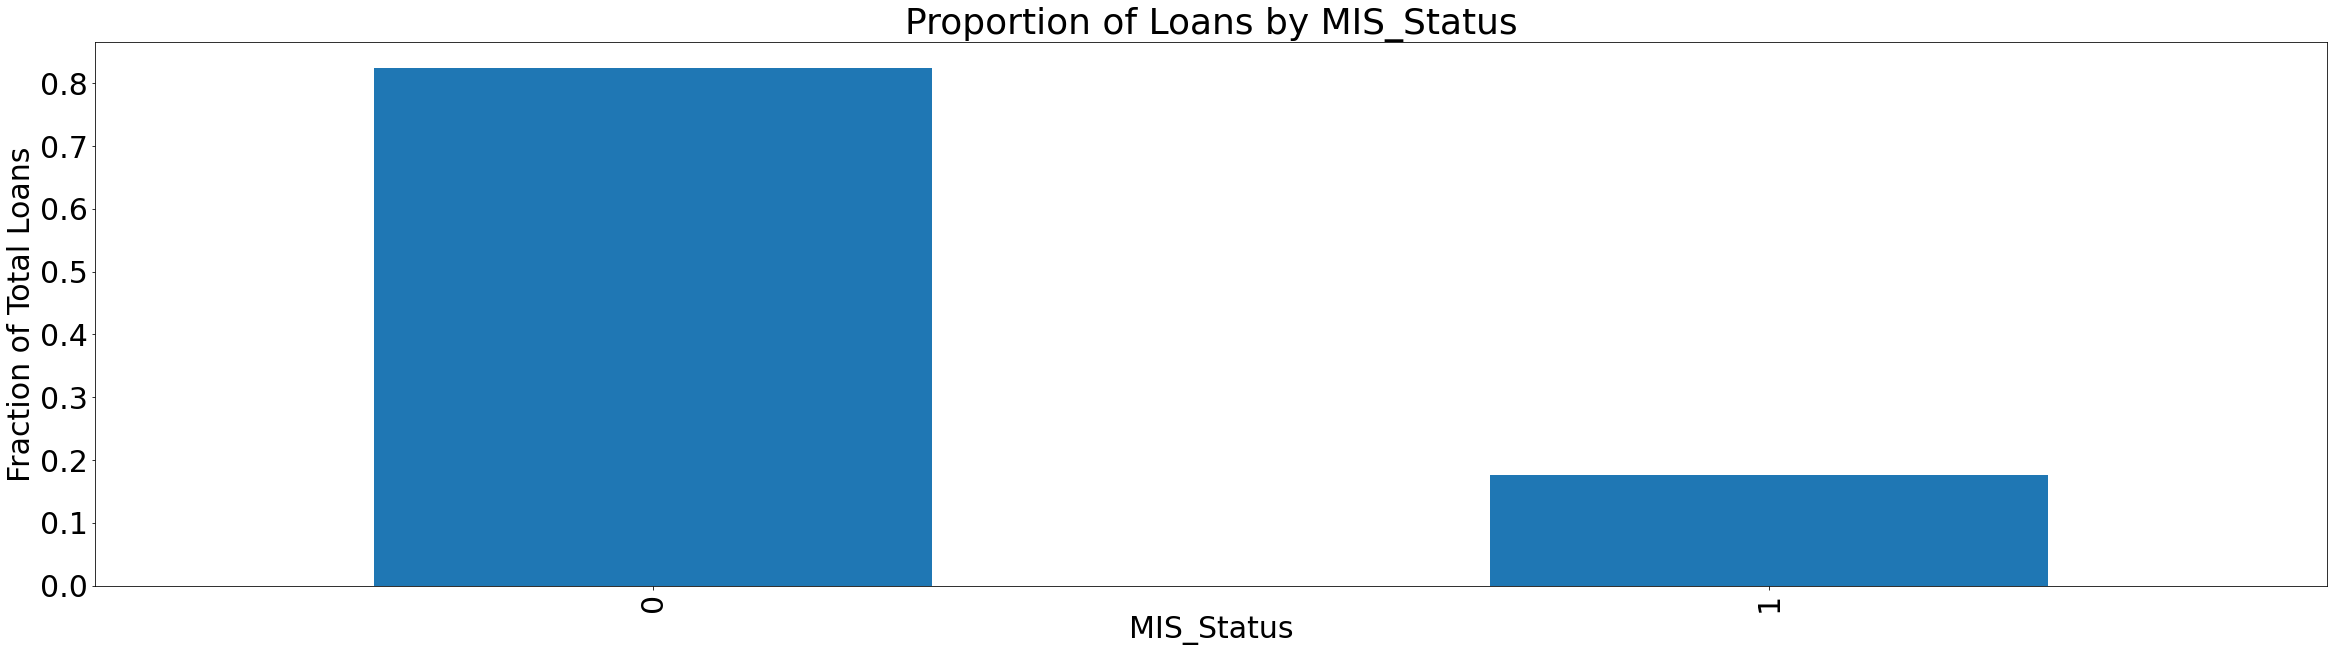

In [141]:
create_plots(SBA_loan_data, 'MIS_Status', 'bar', True, False)

Analyzing the frequency of franchised to non franchised businesses

**Insights:** Appears that most small businesses aren't franchised which makes sense as franchisees tend to be larger in size and scale

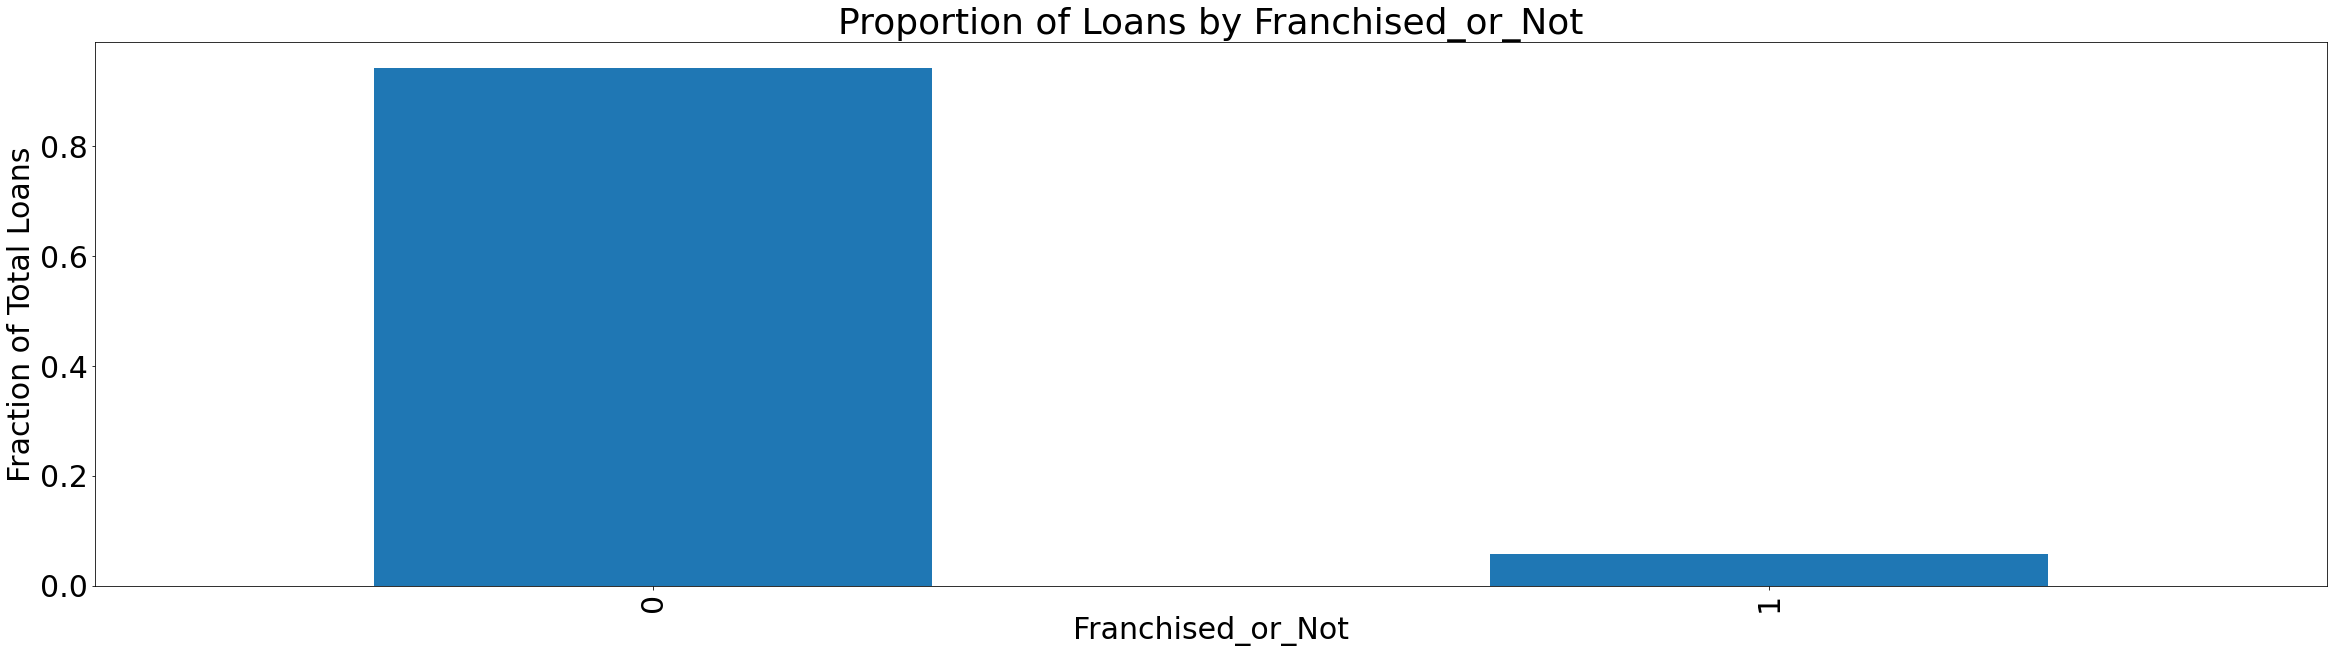

In [142]:
create_plots(SBA_loan_data, 'Franchised_or_Not', 'bar', True, False)

Analyzing the frequency of borrower states in the same state as their bank vs not.

**Insights:** It appears that roughly slightly more than half of all businesses are in the same state as their bank

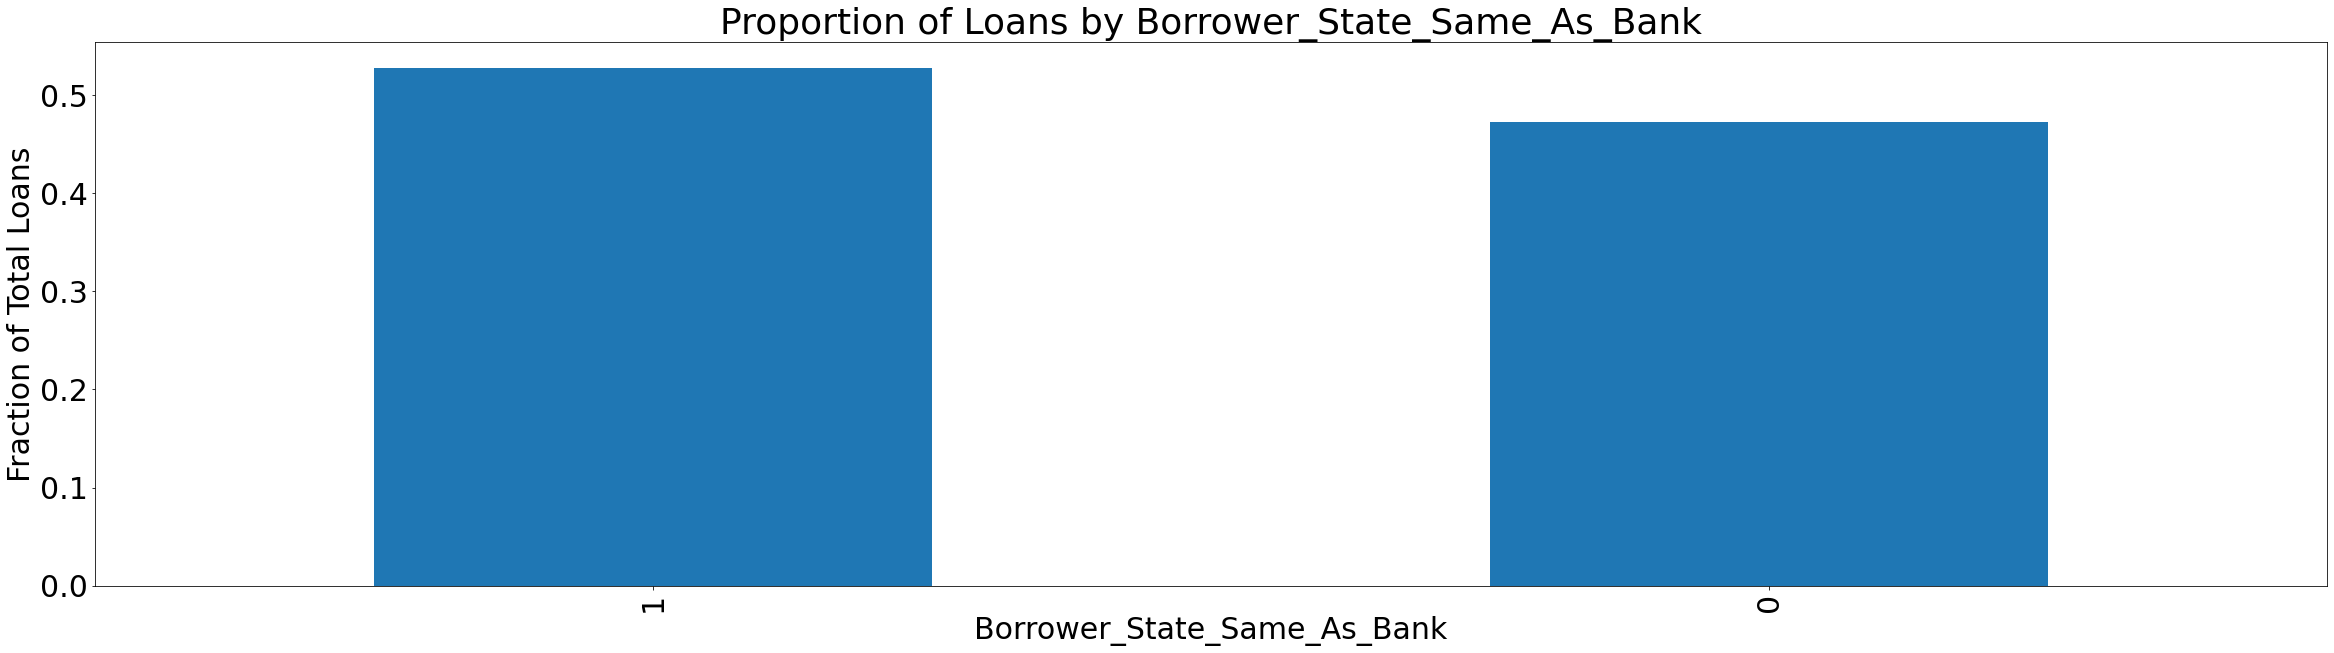

In [143]:
create_plots(SBA_loan_data, 'Borrower_State_Same_As_Bank', 'bar', True, False)

**Insights:** The majority of businesses are not new

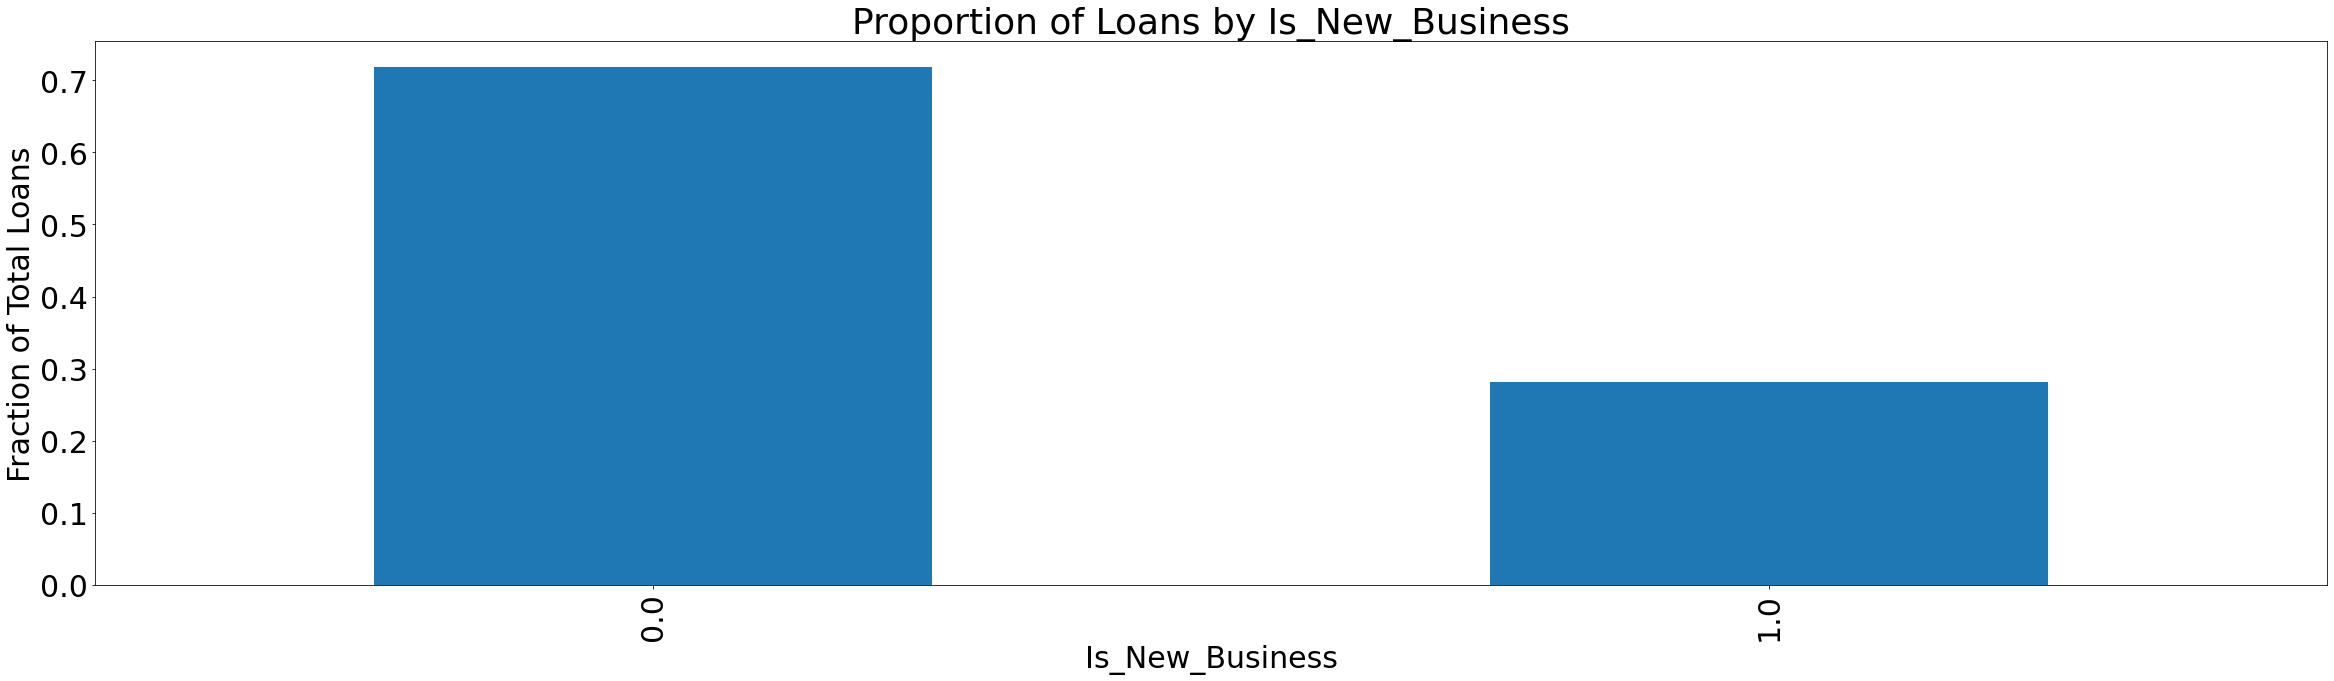

In [144]:
create_plots(SBA_loan_data, 'Is_New_Business', 'bar', True, False)

Figuring out the distributions of businesses by location.

**Insights:** California has the highest number of loans, followed by Texas, New York, and Florida. This makes sense as these 4 states have the highest populations, with California being the most populous state. Hence, business and loan activity is likely to be the highest.

**Important Note:** You may need to run below cell twice to get the formatting to work properly.

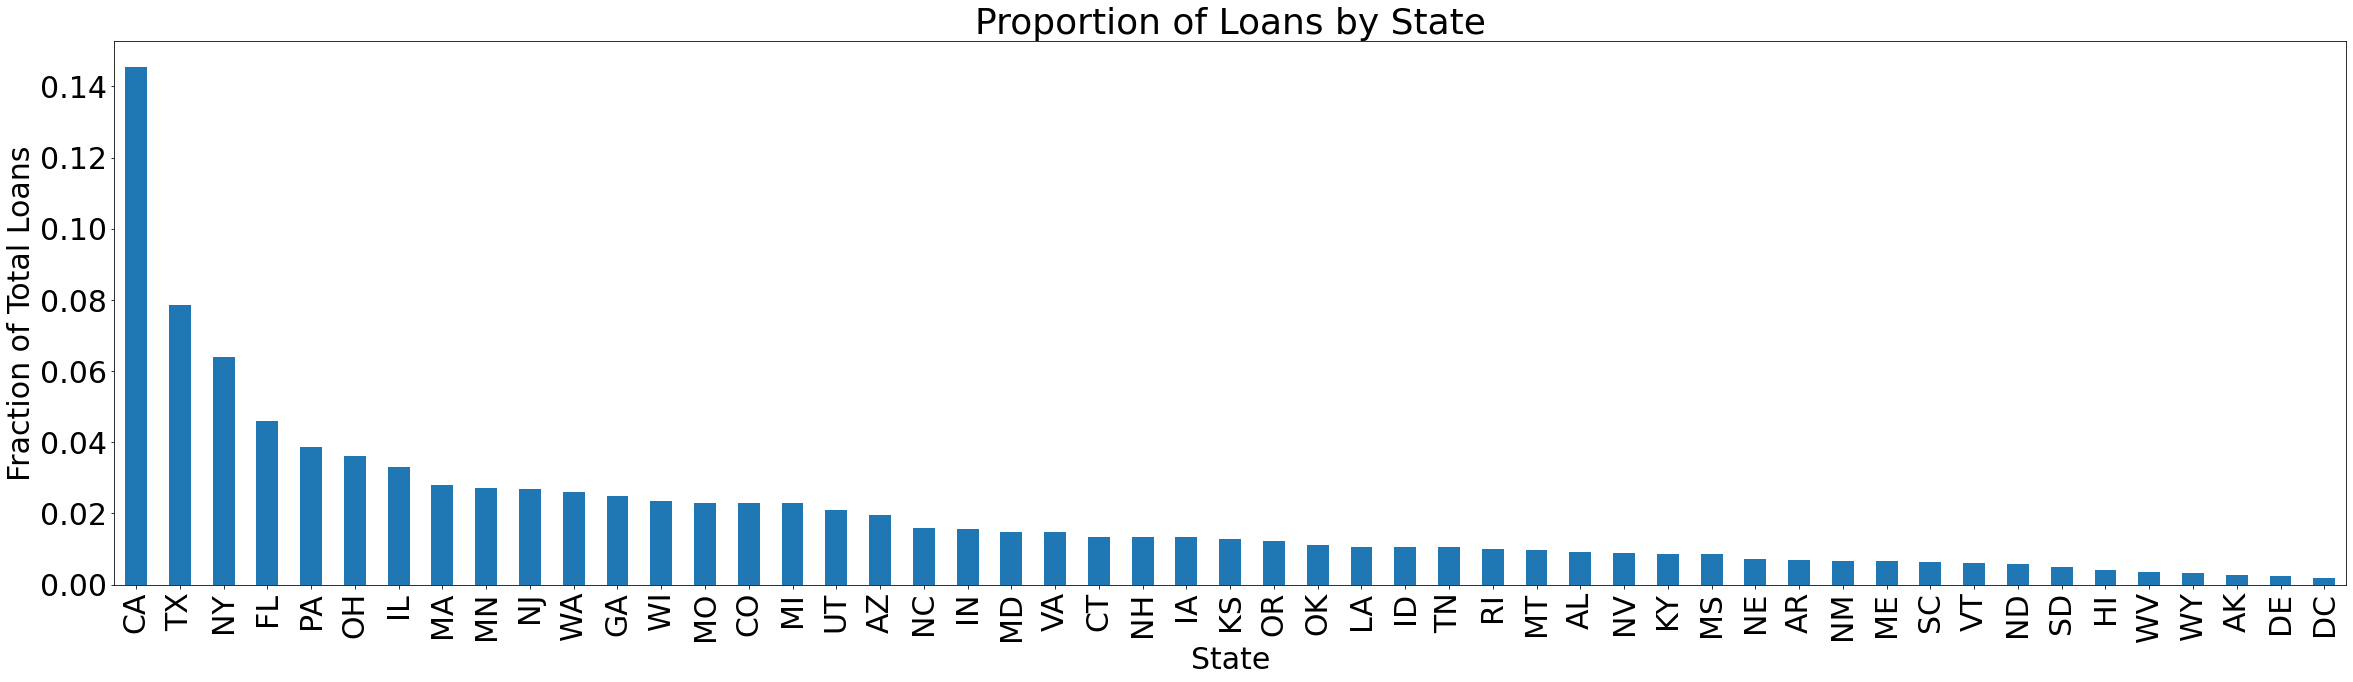

In [145]:
create_plots(SBA_loan_data, column='State', graph_type='bar', as_percentage=True, sort=True)

Seeing distribution of jobs created

**Insights:** Given that there are outliers in this dataset, it is difficult to visualize the distribution of number of jobs created. Thus, we need to cap the number of jobs created

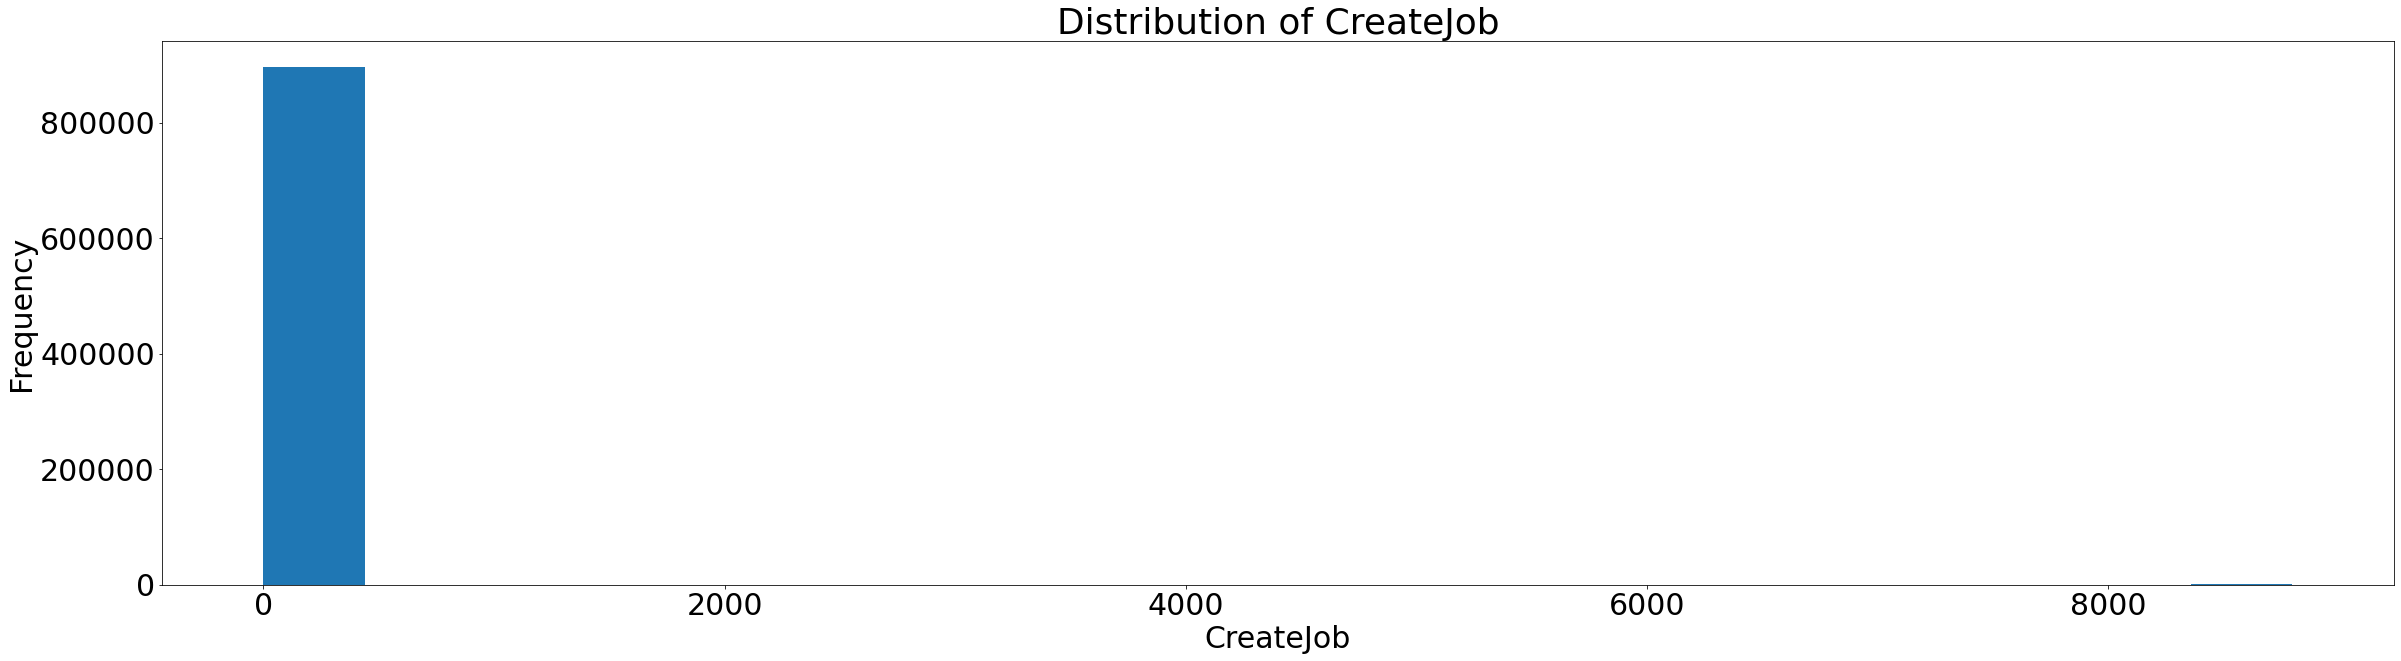

In [146]:
create_plots(SBA_loan_data, column='CreateJob', graph_type='hist', bins=20)

Finding the highest number of jobs created

**Insights:** The most number of jobs created is 8800. This is an unusually high number for a small business. This could be a potential data entry error and may require further investigation.

In [147]:
SBA_loan_data['CreateJob'].max()

8800

Seeing distribution of jobs created (Capped at less than 20 jobs)

**Insights:** Most small businesses create less than 5 jobs

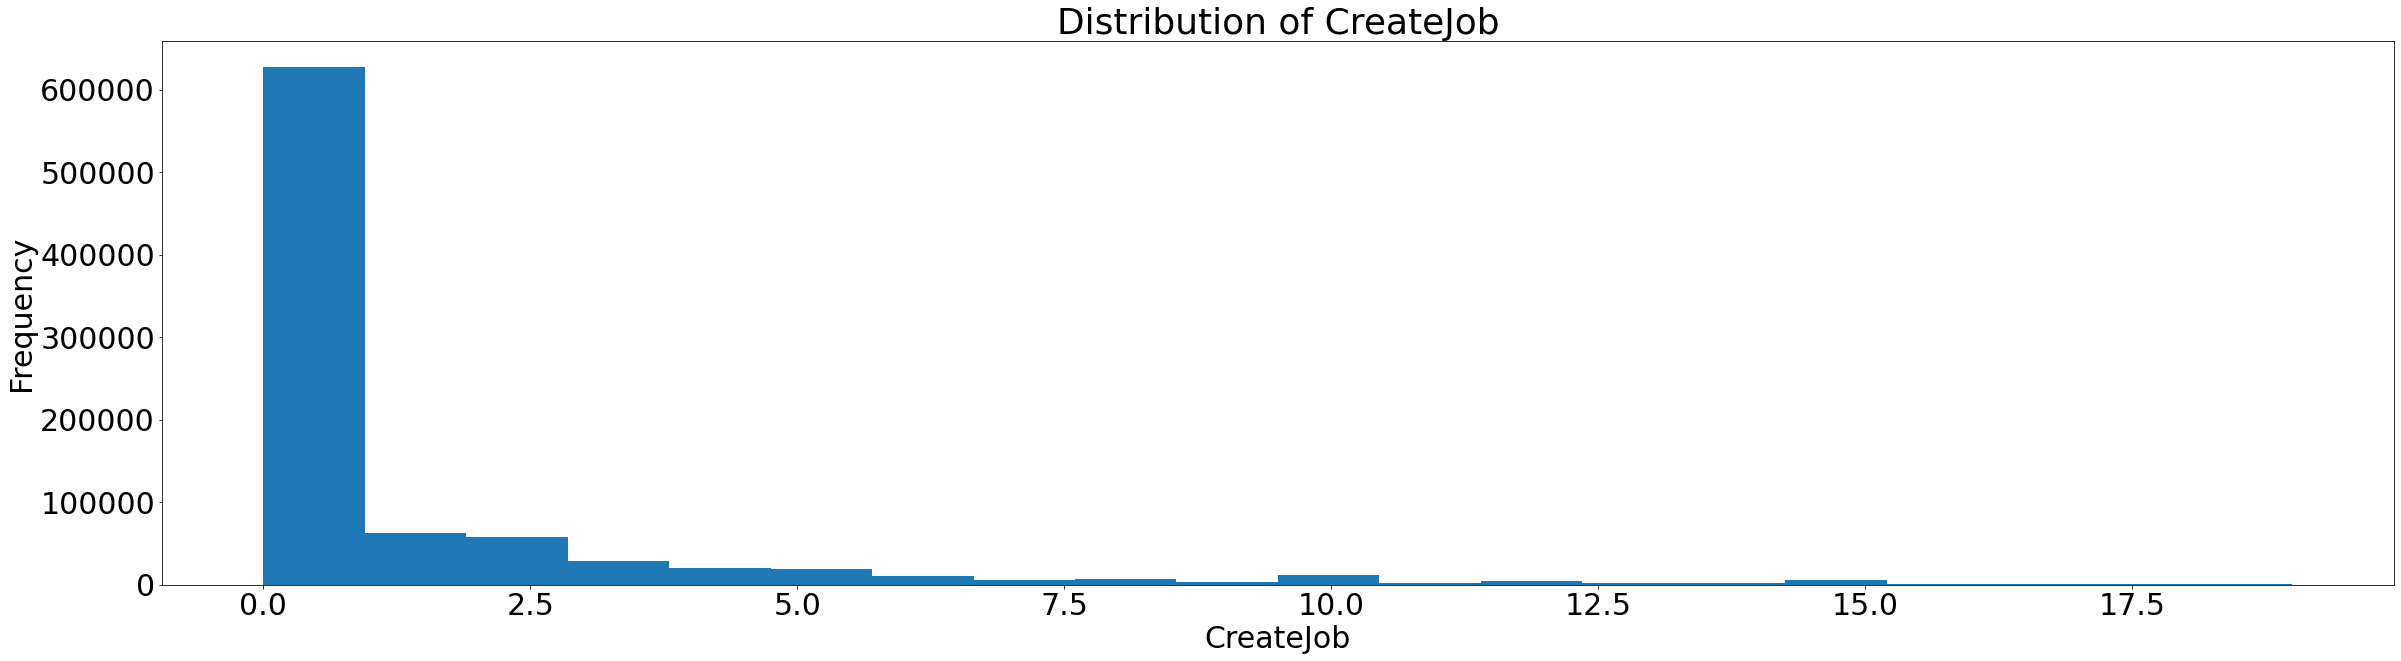

In [148]:
create_plots(SBA_loan_data[SBA_loan_data['CreateJob']<20], column='CreateJob', graph_type='hist', bins=20)

Finding the distribution of the number of employees for small businesses

**Insights:** Given the outliers in this dataset, it is hard to visualize the distribution for number of employees. We must cap this number for better visualization.

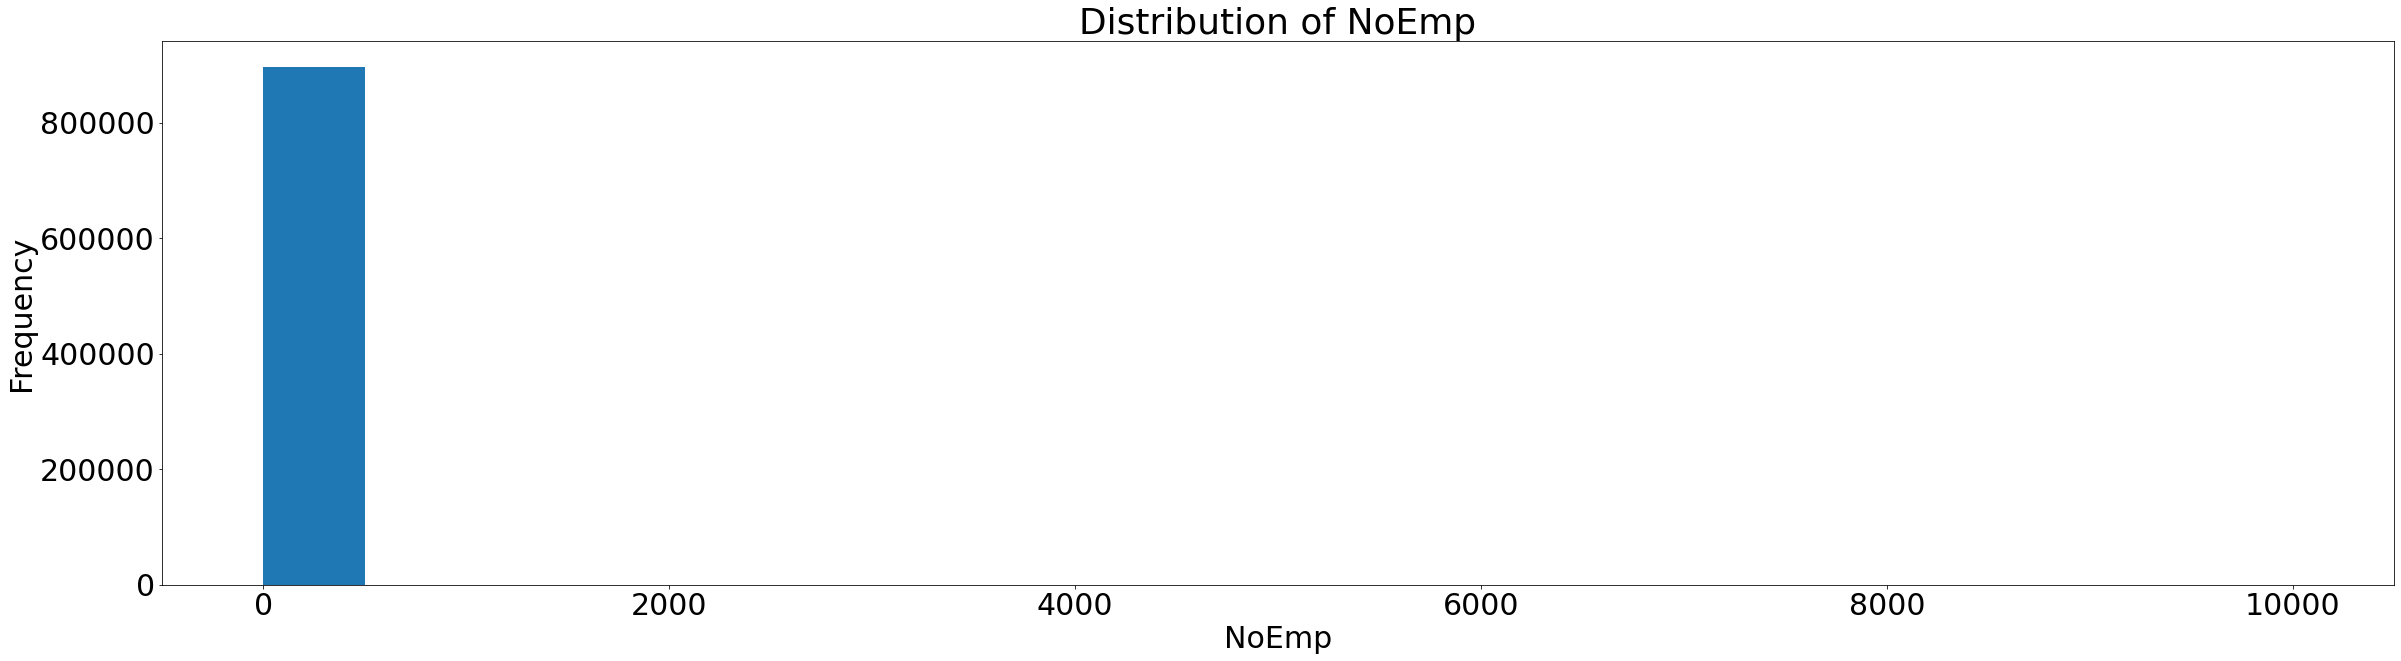

In [149]:
create_plots(SBA_loan_data, column='NoEmp', graph_type='hist', bins=20)

Finding the highest number of employees in an organization

**Insights:** The most number of employees for a small business is 9999. Given that the typical cutoffs for the number of small businesses is 50-1500 people, this could potentially be a data entry error.

https://smallbusiness.patriotsoftware.com/what-is-considered-small-business-classification-size/

In [150]:
SBA_loan_data['NoEmp'].max()

9999

Finding the distribution of the number of employees for small businesses **capped less than 30 employees.**

**Insights:** Most businesses have less than 10 employees

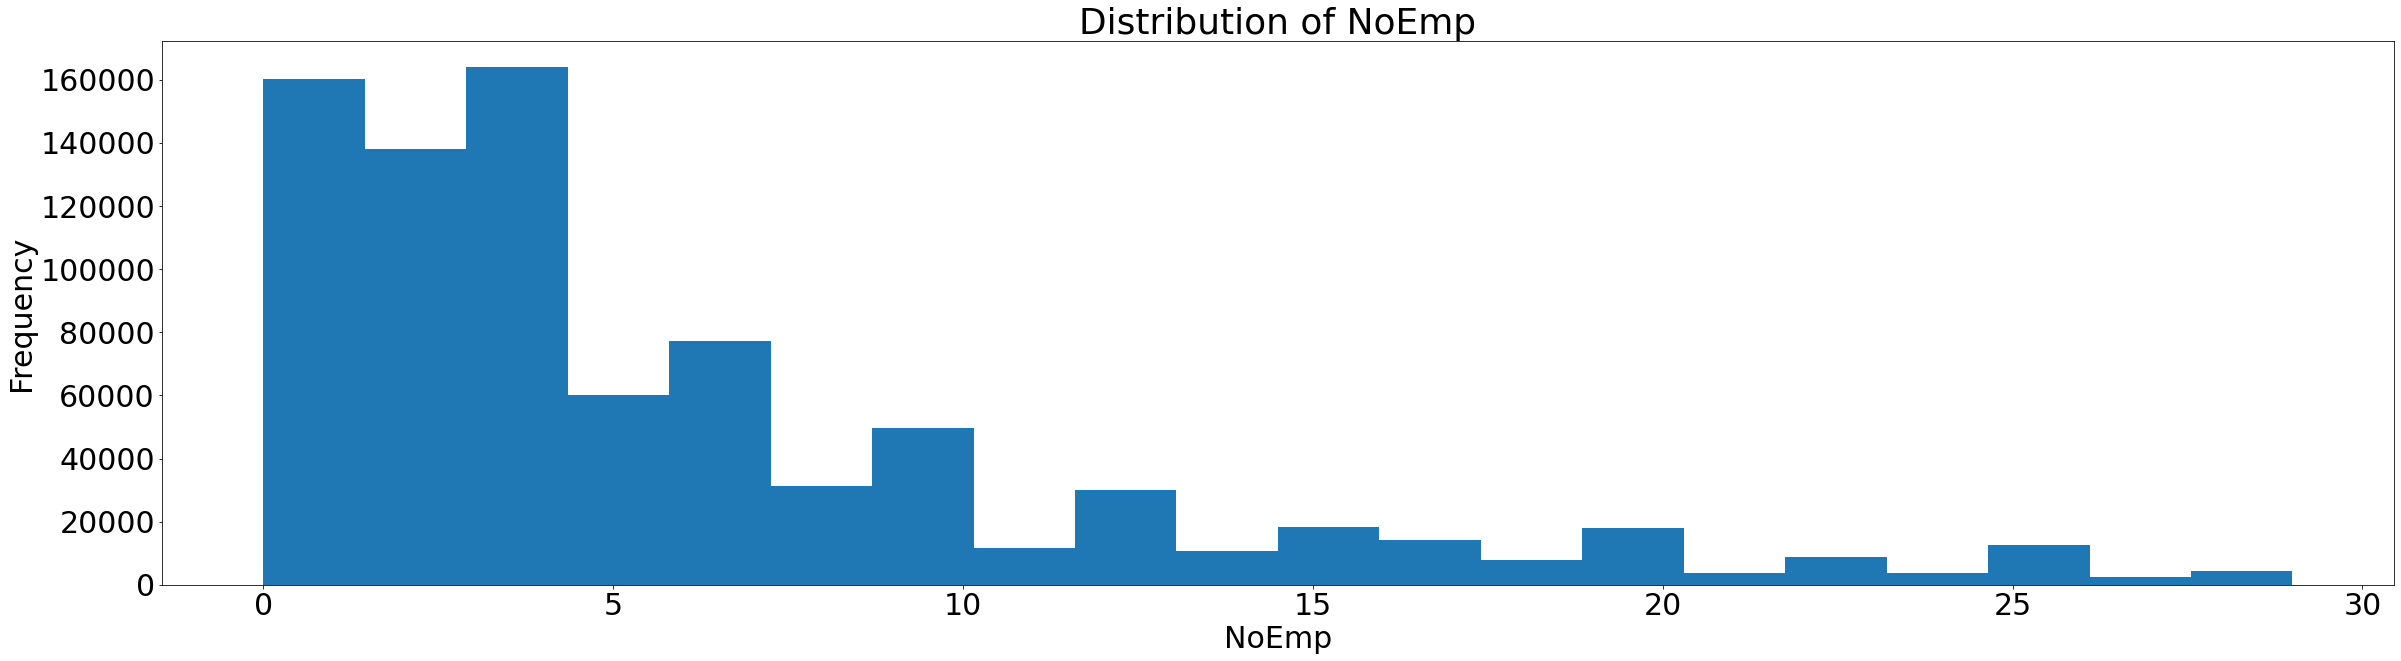

In [151]:
create_plots(SBA_loan_data[SBA_loan_data['NoEmp']<30], column='NoEmp', graph_type='hist', bins=20)

Finding loan activity per month

**Insights:** We see that March and September see small peaks in loan activity, which could suggest that loan activity is seasonal and peaks every 6 months

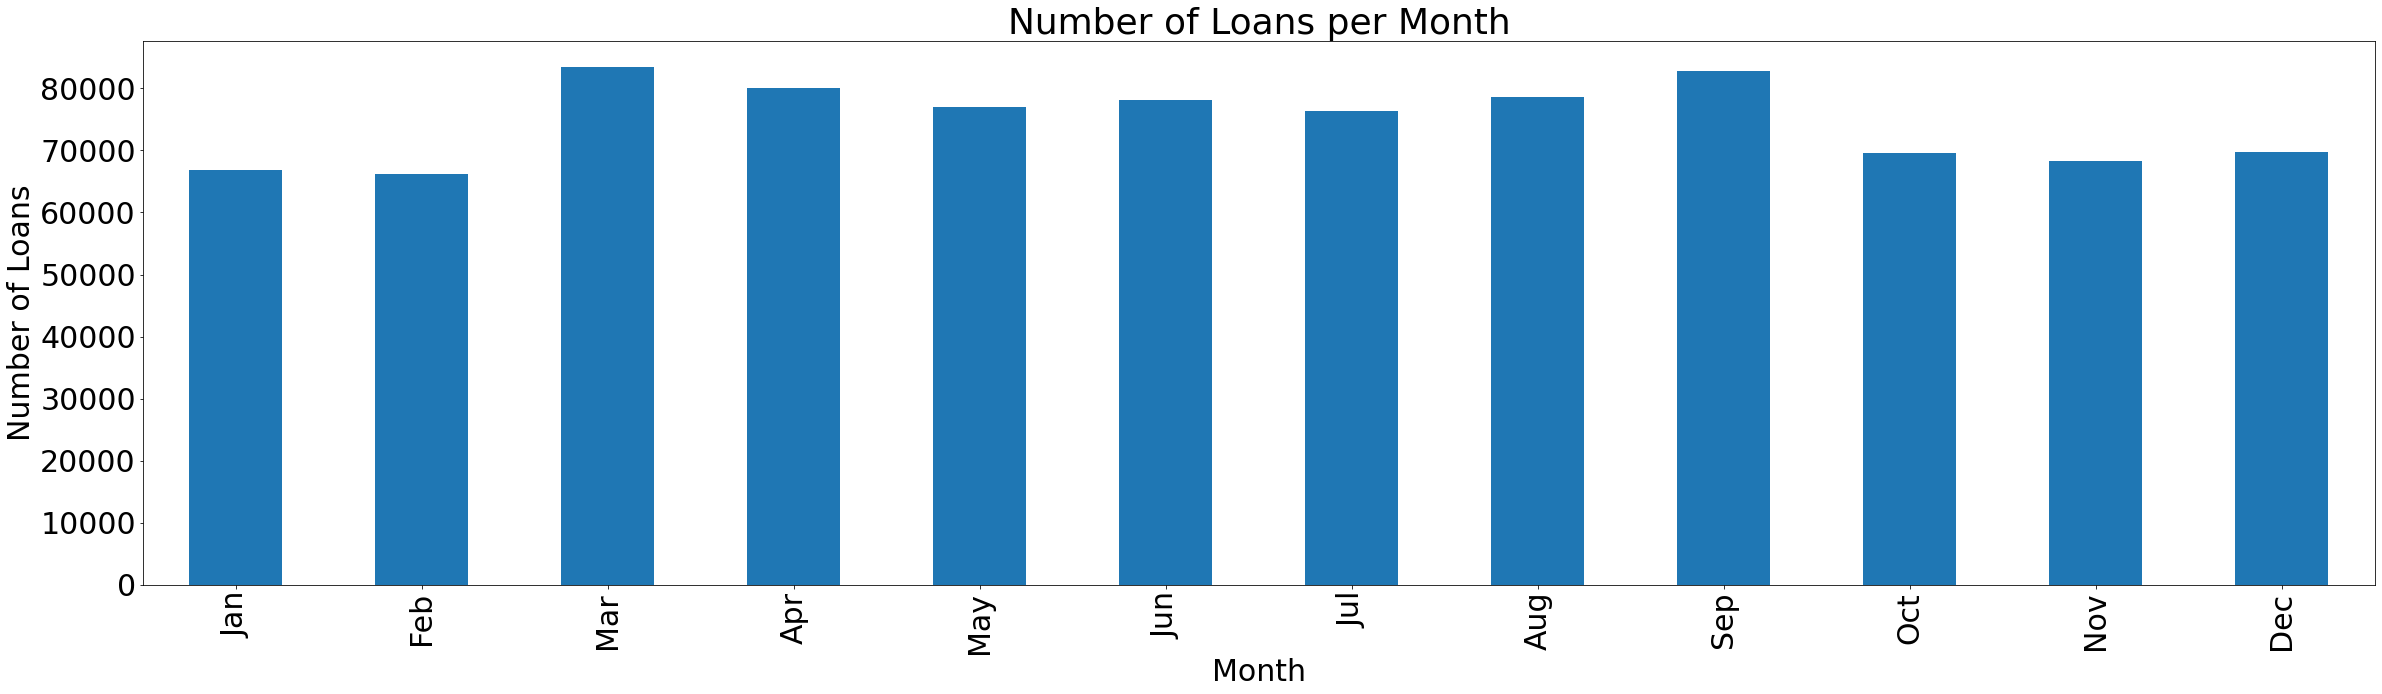

In [152]:
SBA_loan_data['Month'].value_counts().reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])\
.plot(kind='bar');
plt.title('Number of Loans per Month');
plt.xlabel('Month');
plt.ylabel('Number of Loans');

Finding out the typical loan term distributions

**Insights:** Most loans are under 300 months (25 years), with the majority being under 100 months (~8.3 years).

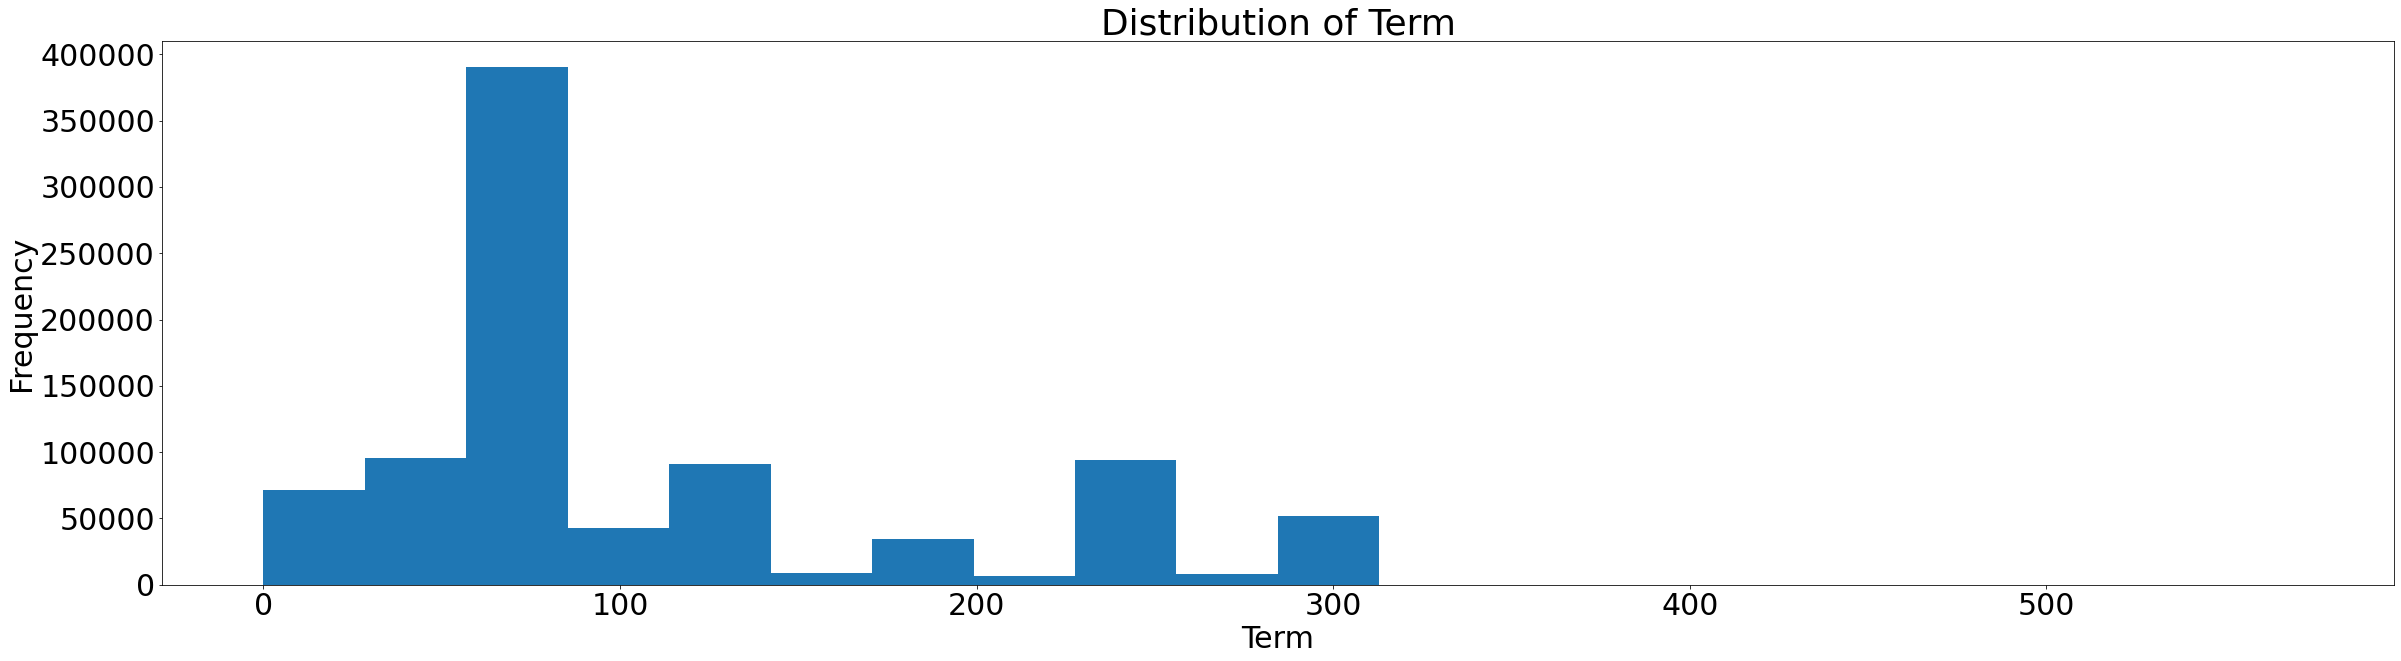

In [153]:
create_plots(SBA_loan_data, column='Term', graph_type='hist', bins=20)

Finding out the max term length.

**Insights:** The maximum term length is 569 months, or roughly 47.4 years.

In [154]:
SBA_loan_data['Term'].max()

569

Analyzing loan activity by Sector

**Insights:** The highest number of loans belong to the retail trade sector

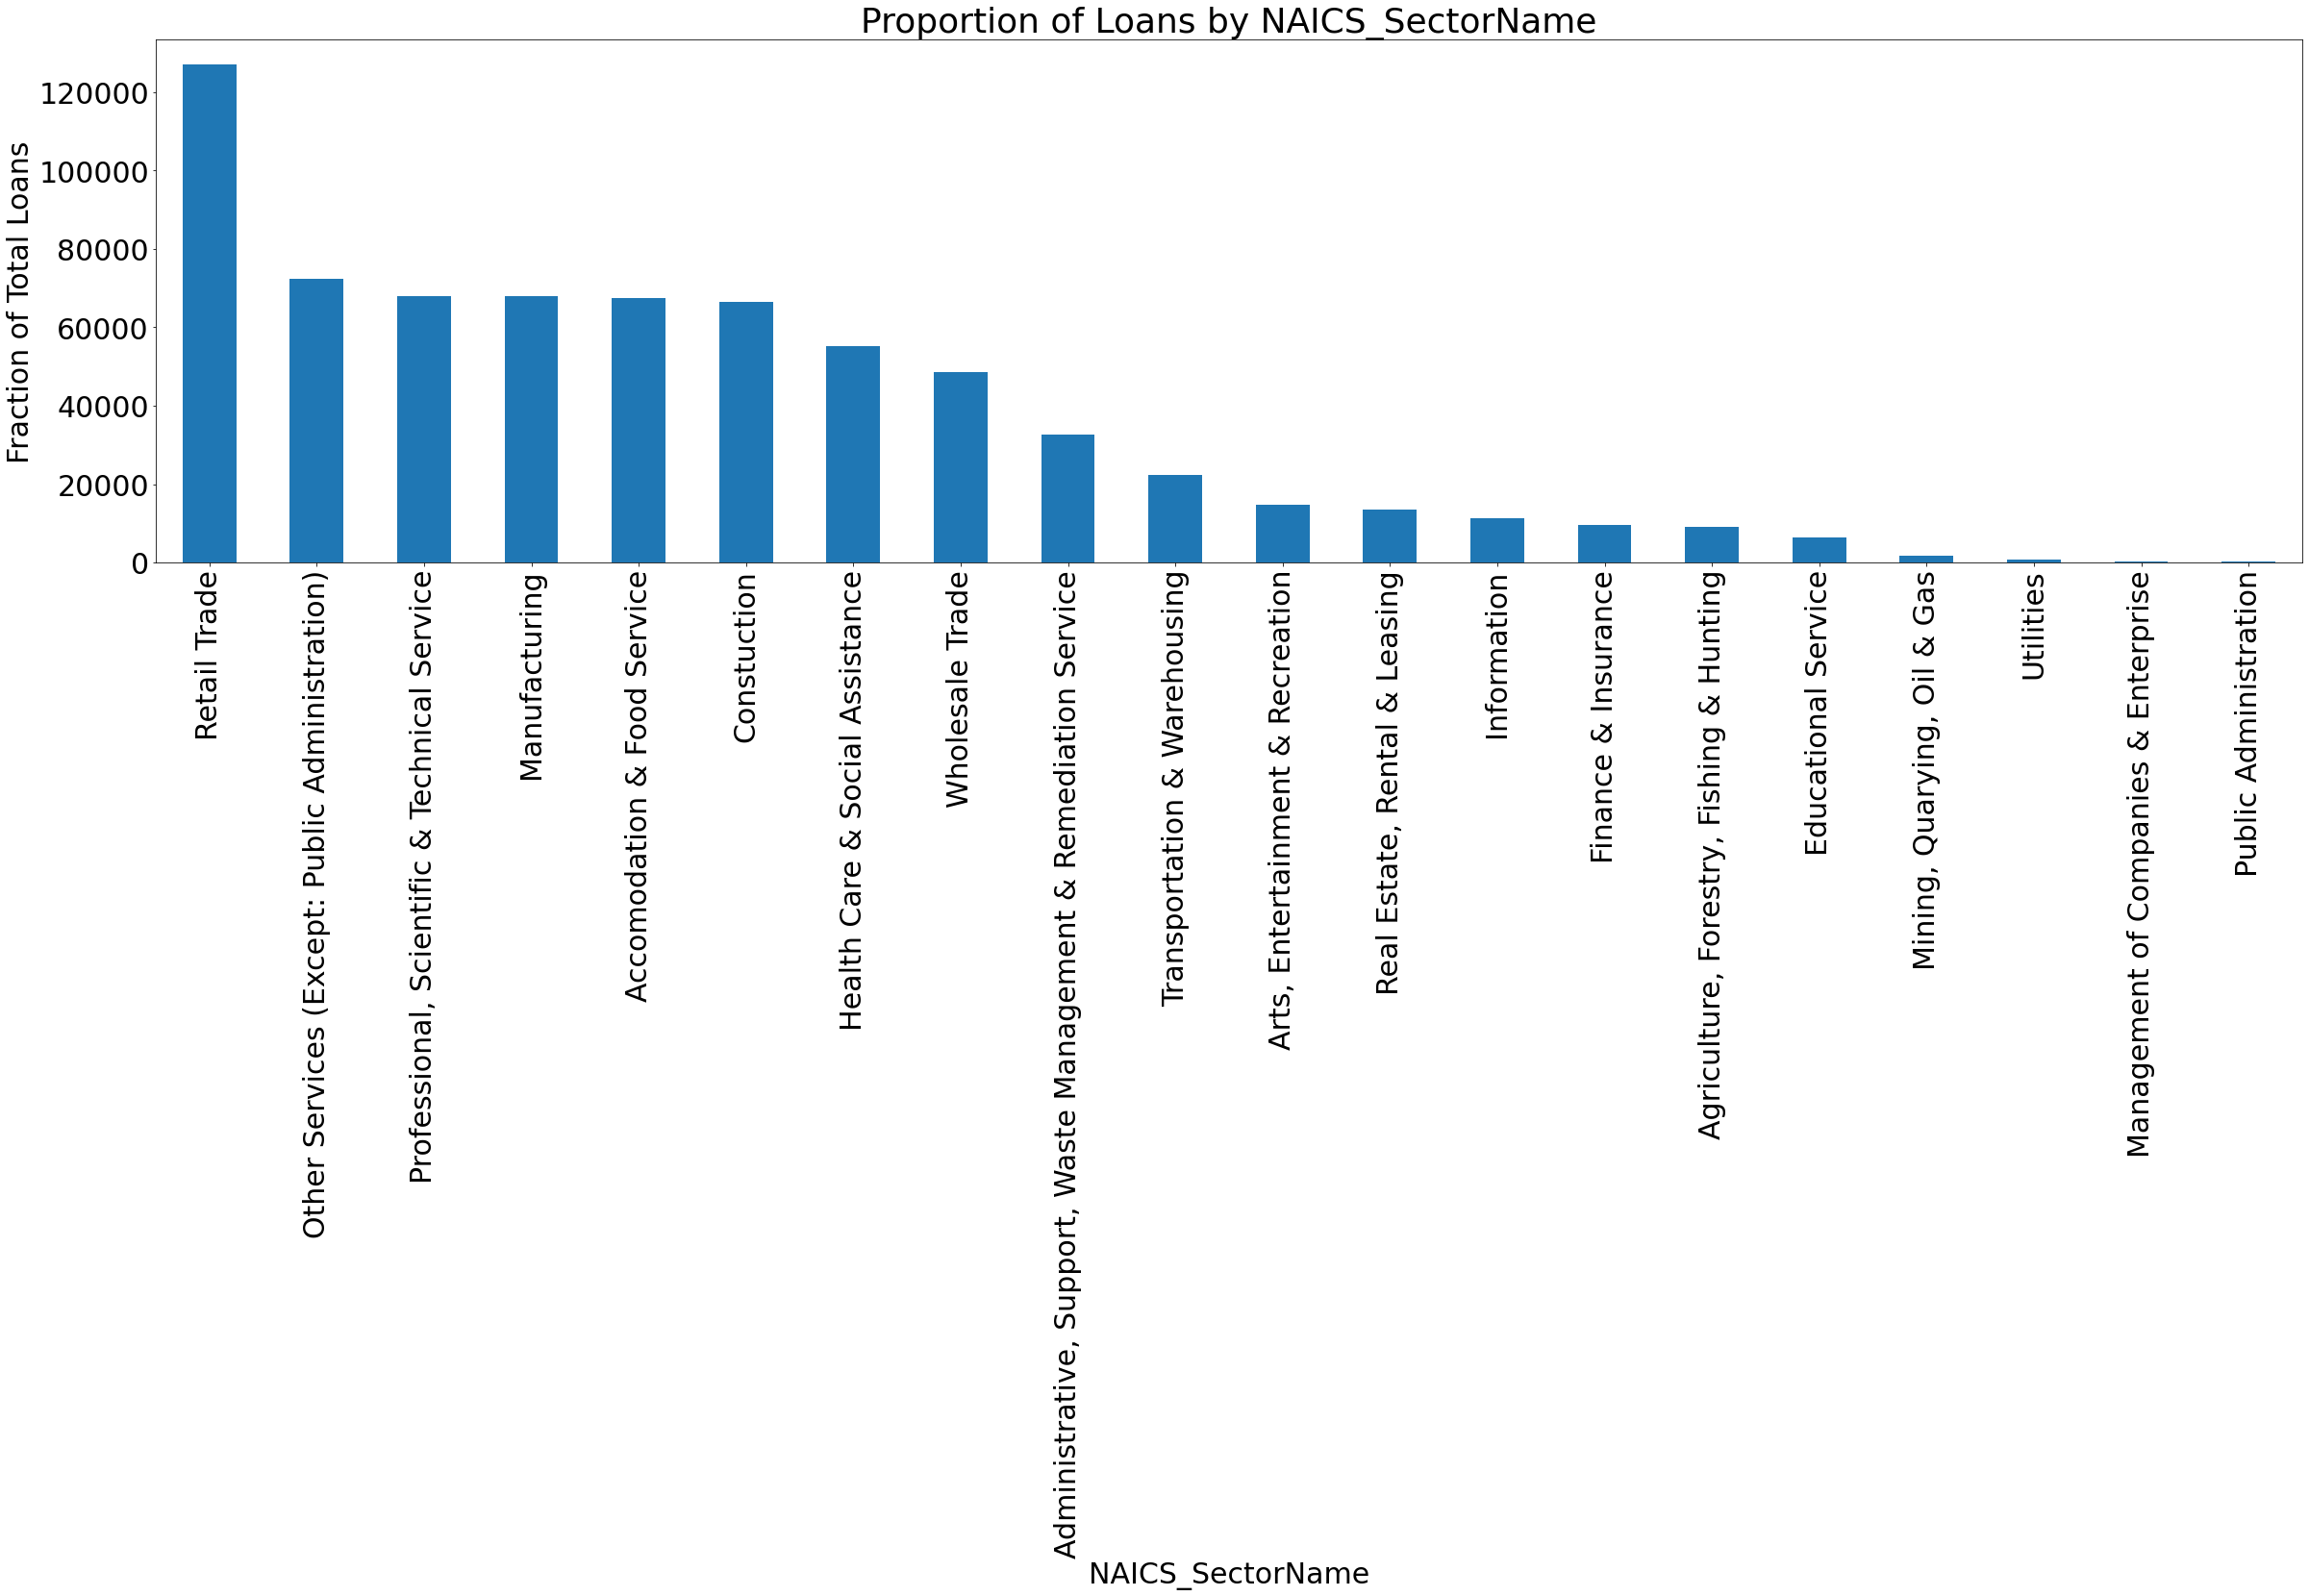

In [155]:
create_plots(SBA_loan_data, column='NAICS_SectorName', graph_type='bar', sort=True)

Finding the distribution of loans approved by year.

**Insight 1:** Loan activity for small businesses started to grow rapidly in the 1990s, peaking in the late 2000s. The sharp drop in loans after the late 2000s may be due to the great recession, which negatively impacted business and hence loan activity.

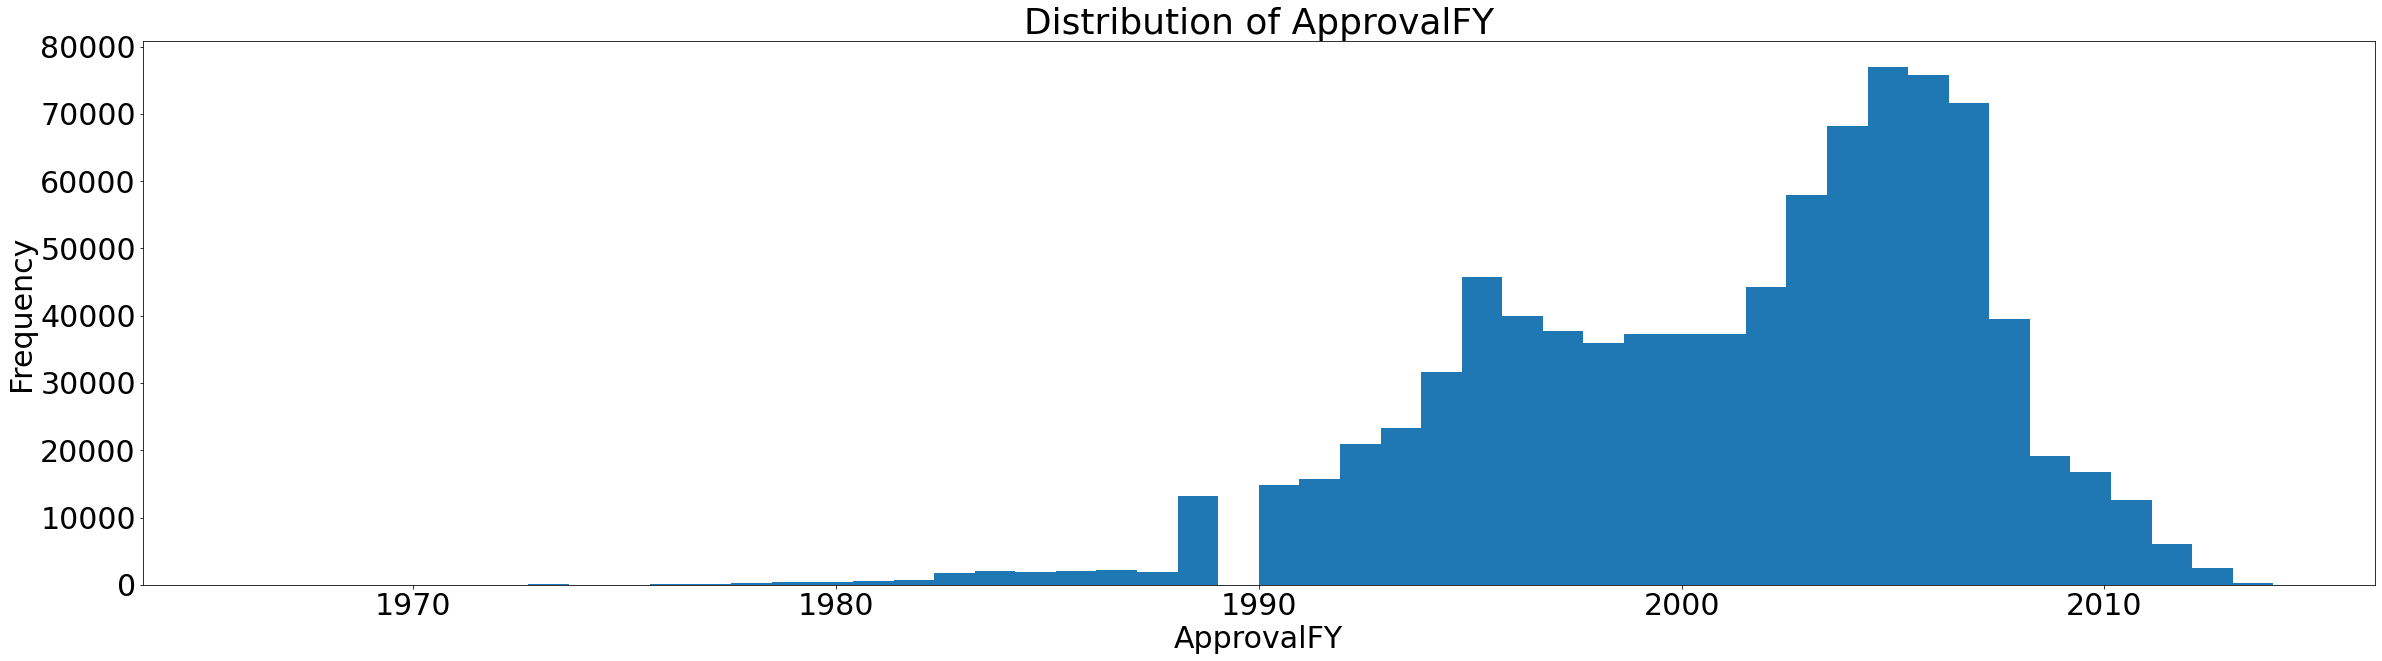

In [156]:
create_plots(SBA_loan_data, column='ApprovalFY', graph_type='hist', as_percentage=False, sort=True, bins=50)

Finding the time period the data spans.

**Insight 2:** The data spans from 1966 to 2014, close to 50 years of small business loan data.

In [159]:
SBA_loan_data['ApprovalFY'].agg(columns={'min','max'})

columns  min    1966
         max    2014
Name: ApprovalFY, dtype: int64

Finding the distribution of the charged off amount for all defaulted loans

**Insights:** We see that given the outliers, it is difficult to visualize the distribution. Thus, we will cap the values in the subsequent graph for better visualization

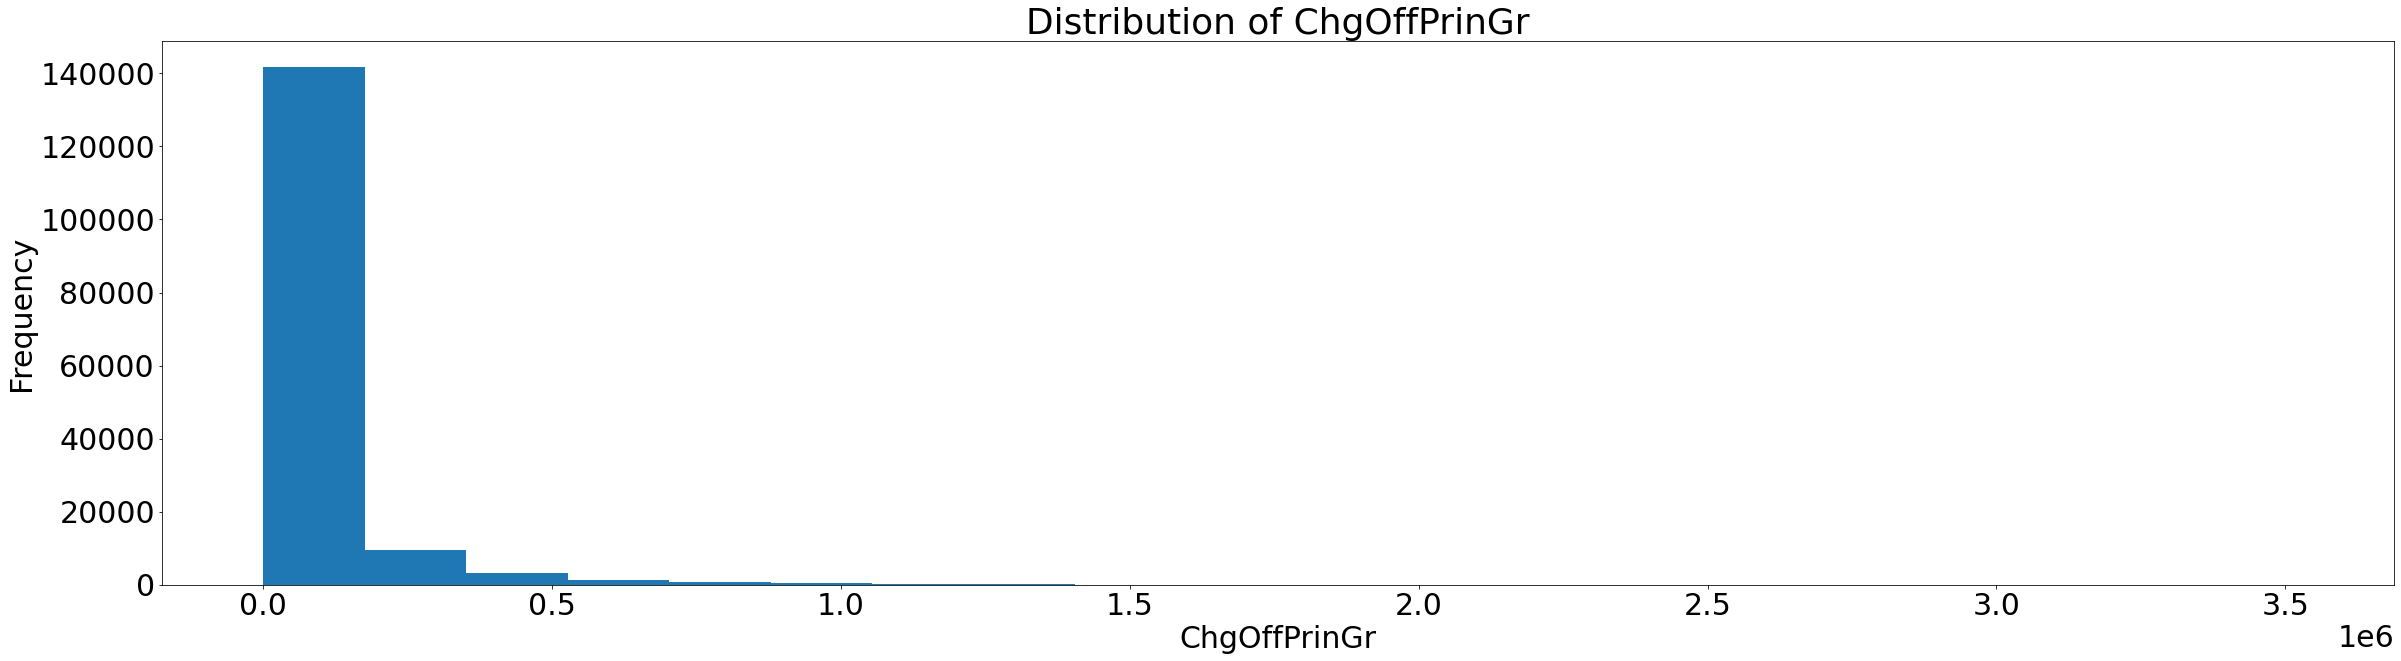

In [160]:
create_plots(SBA_loan_data[SBA_loan_data['MIS_Status']==1], column='ChgOffPrinGr', graph_type='hist', bins=20)

Finding the highest charged off amount

**Insights:** $3.5 million is a lot of money that could potentially be lost.

In [161]:
SBA_loan_data['ChgOffPrinGr'].max()

3512596.0

Finding out the average charge off dollar amount for all loans that have defaulted

In [162]:
SBA_loan_data['ChgOffPrinGr'][SBA_loan_data['MIS_Status']==1].mean()

76372.15154419324

Finding out the distribution of the charged off amount **only for loans charged off** capped at $300000

**Insights:** We find that most charged off loans are less than $100000.

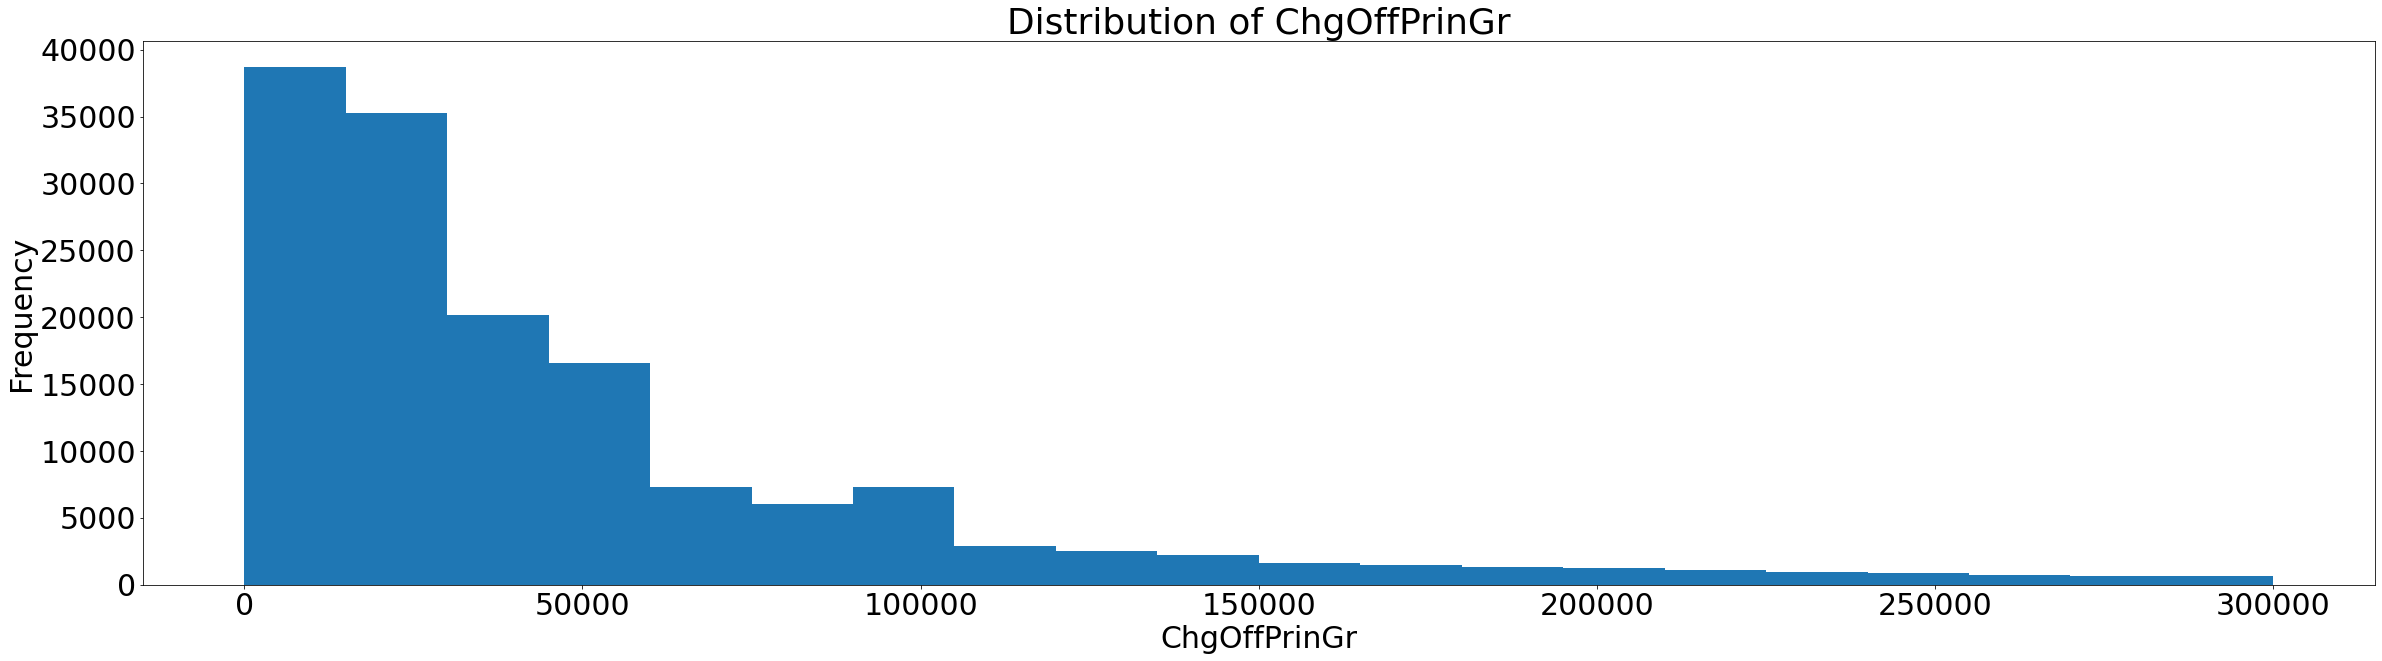

In [163]:
create_plots(SBA_loan_data[(SBA_loan_data['MIS_Status']==1)\
                           & (SBA_loan_data['ChgOffPrinGr']<300000)], column='ChgOffPrinGr', graph_type='hist', bins=20)

Finding the distribution of gross amount of loan approved by the bank

**Insights:** Given the outliers, it's hard to visualize the distribution. Thus, we will cap the value for the graph below for better visualization

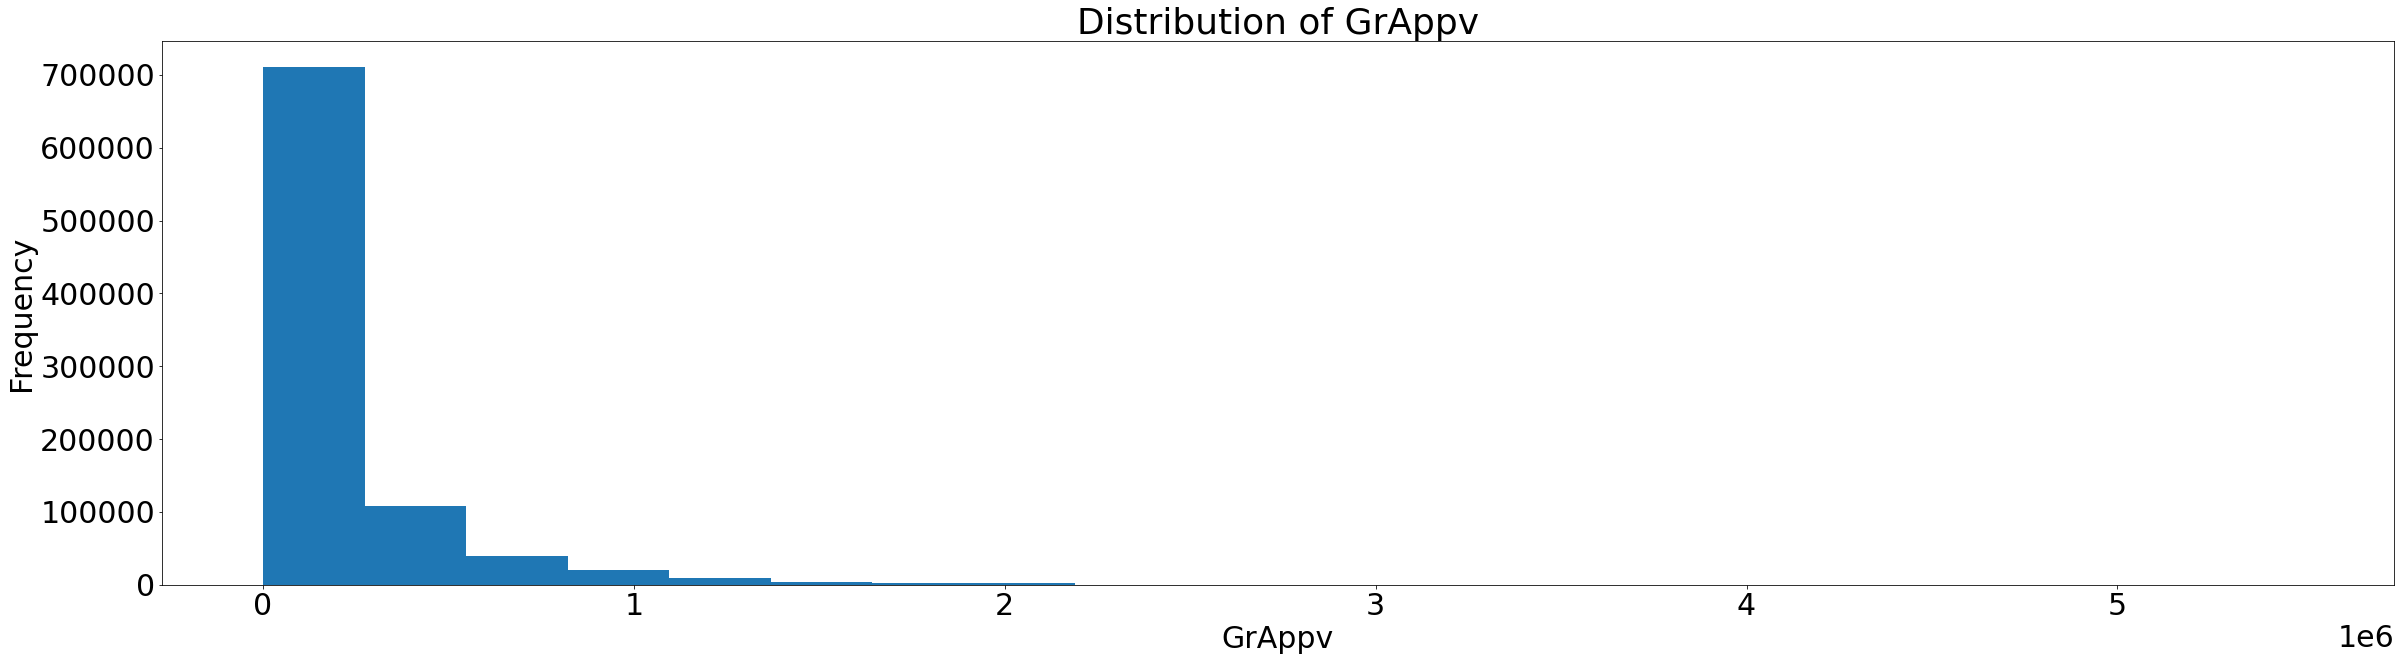

In [164]:
create_plots(SBA_loan_data, column='GrAppv', graph_type='hist', bins=20)

Finding the highest gross amount approved by the bank

**Insights:** $5.47 million is a very high value for an amount approved by the bank, especially for a small business.

In [165]:
SBA_loan_data['GrAppv'].max()

5472000.0

Finding the distribution of gross amount of loan approved by bank **capped at less than $800000**

**Insights:** Approved loans tend to be $200000 or less

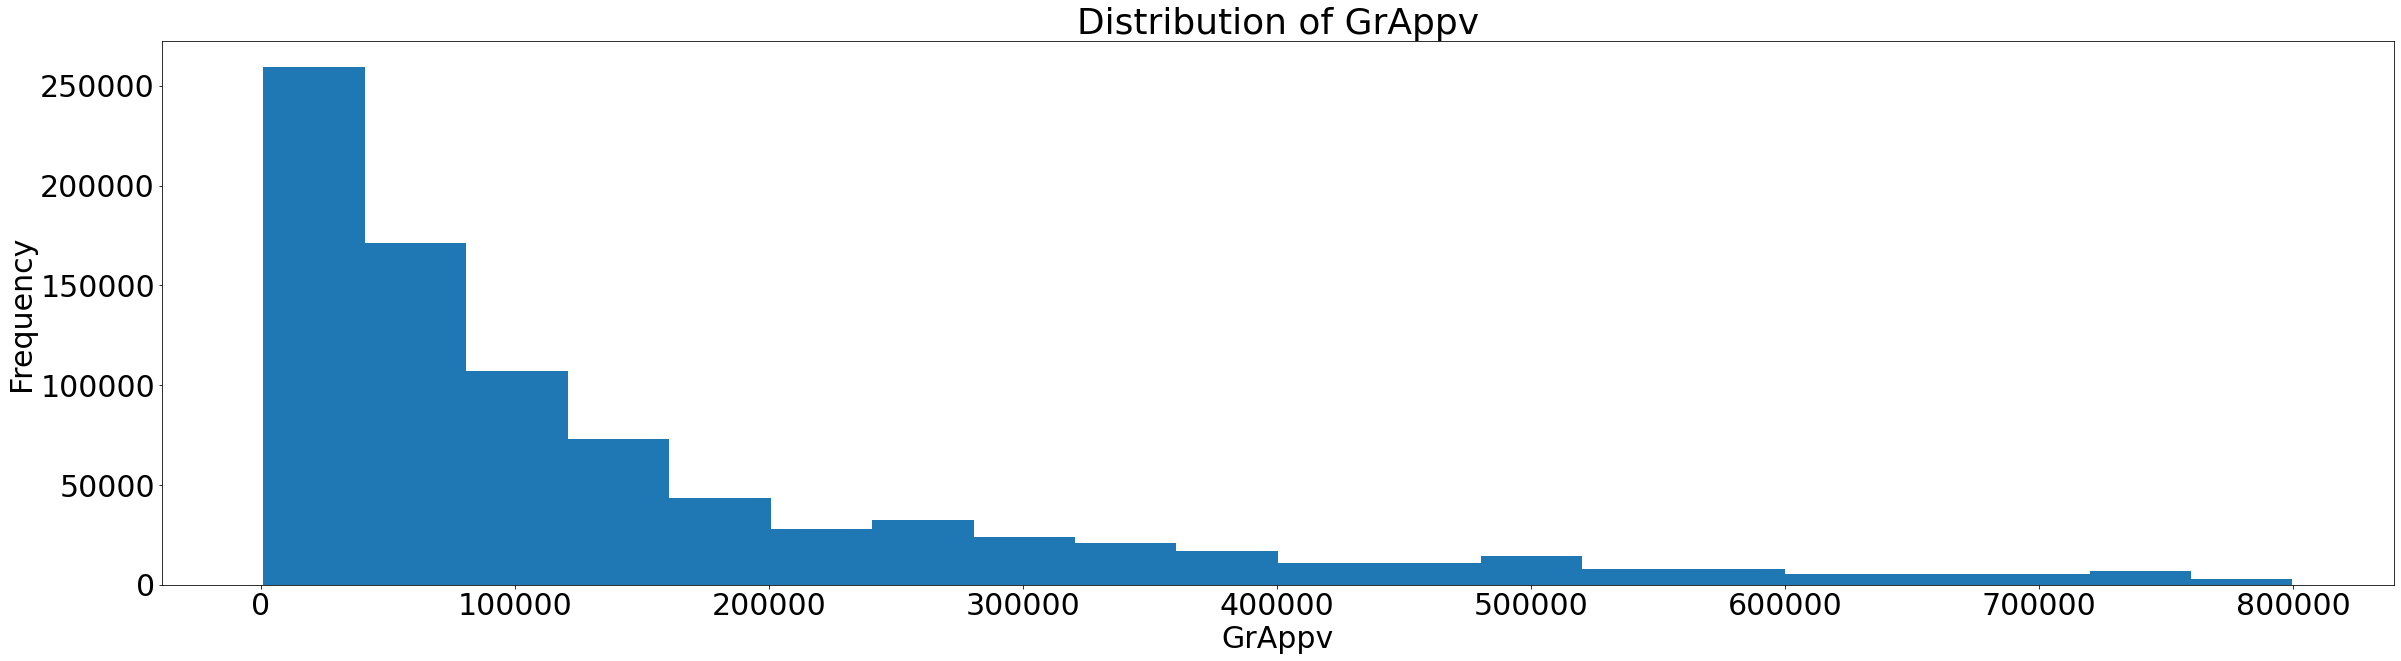

In [166]:
create_plots(SBA_loan_data[SBA_loan_data['GrAppv']<800000], column='GrAppv', graph_type='hist', bins=20)

Finding the distribution of SBA's guaranteed amount of approved loan

**Insights:** Given the outliers, it's difficult to properly visualize the distribution. The graph will need to be capped for better visualization of the distribution

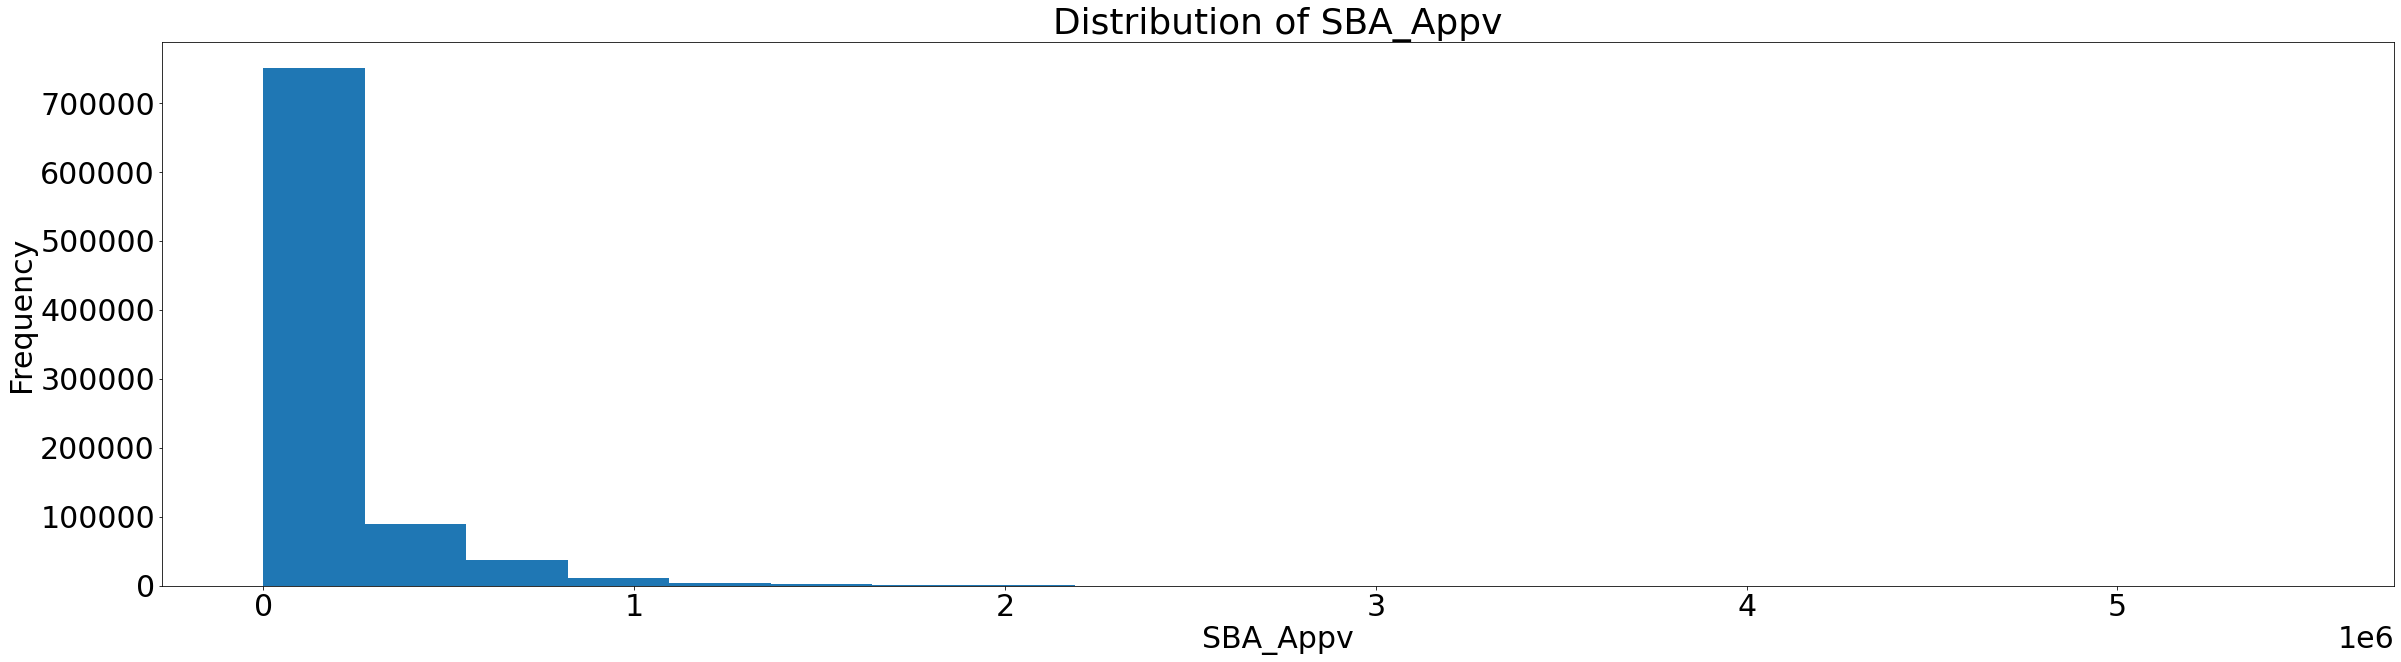

In [167]:
create_plots(SBA_loan_data, column='SBA_Appv', graph_type='hist', bins=20)

Finding the highest amount SBA has ever guaranteed

**Insights:** $5.47 million is the highest amount SBA has guaranteed. This is also the same as the max amount that the bank has approved. This means that SBA is guaranteeing 100% of the loan, which is a very high risk SBA is committing to.

In [168]:
SBA_loan_data['SBA_Appv'].max()

5472000.0

Finding the distribution of SBA's guaranteed amount of approved loan **capped at $800000**

**Insights:** The loan dollar value that SBA will typically guarantee is less than $200000. Follows a very similar distribution pattern to GrAppv.

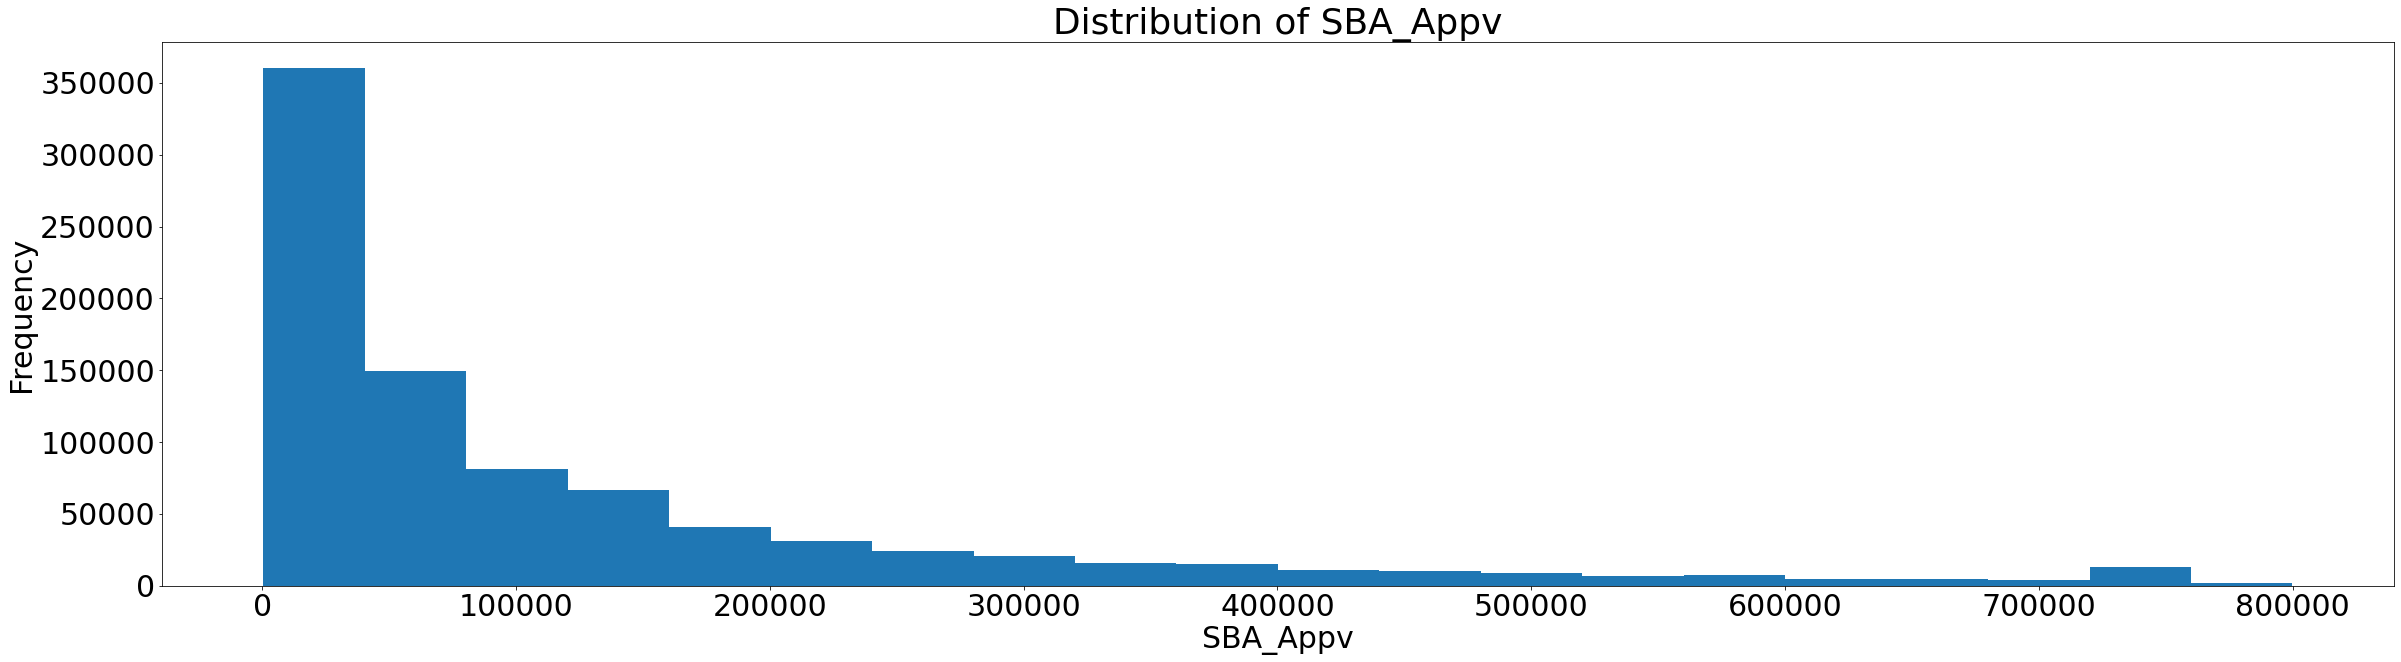

In [169]:
create_plots(SBA_loan_data[SBA_loan_data['SBA_Appv']<800000], column='SBA_Appv', graph_type='hist', bins=20)

Finding the distribution of gross disbursement dollar amount

**Insights:** Given the outliers, this graph may require capping for better visualization of the distribution

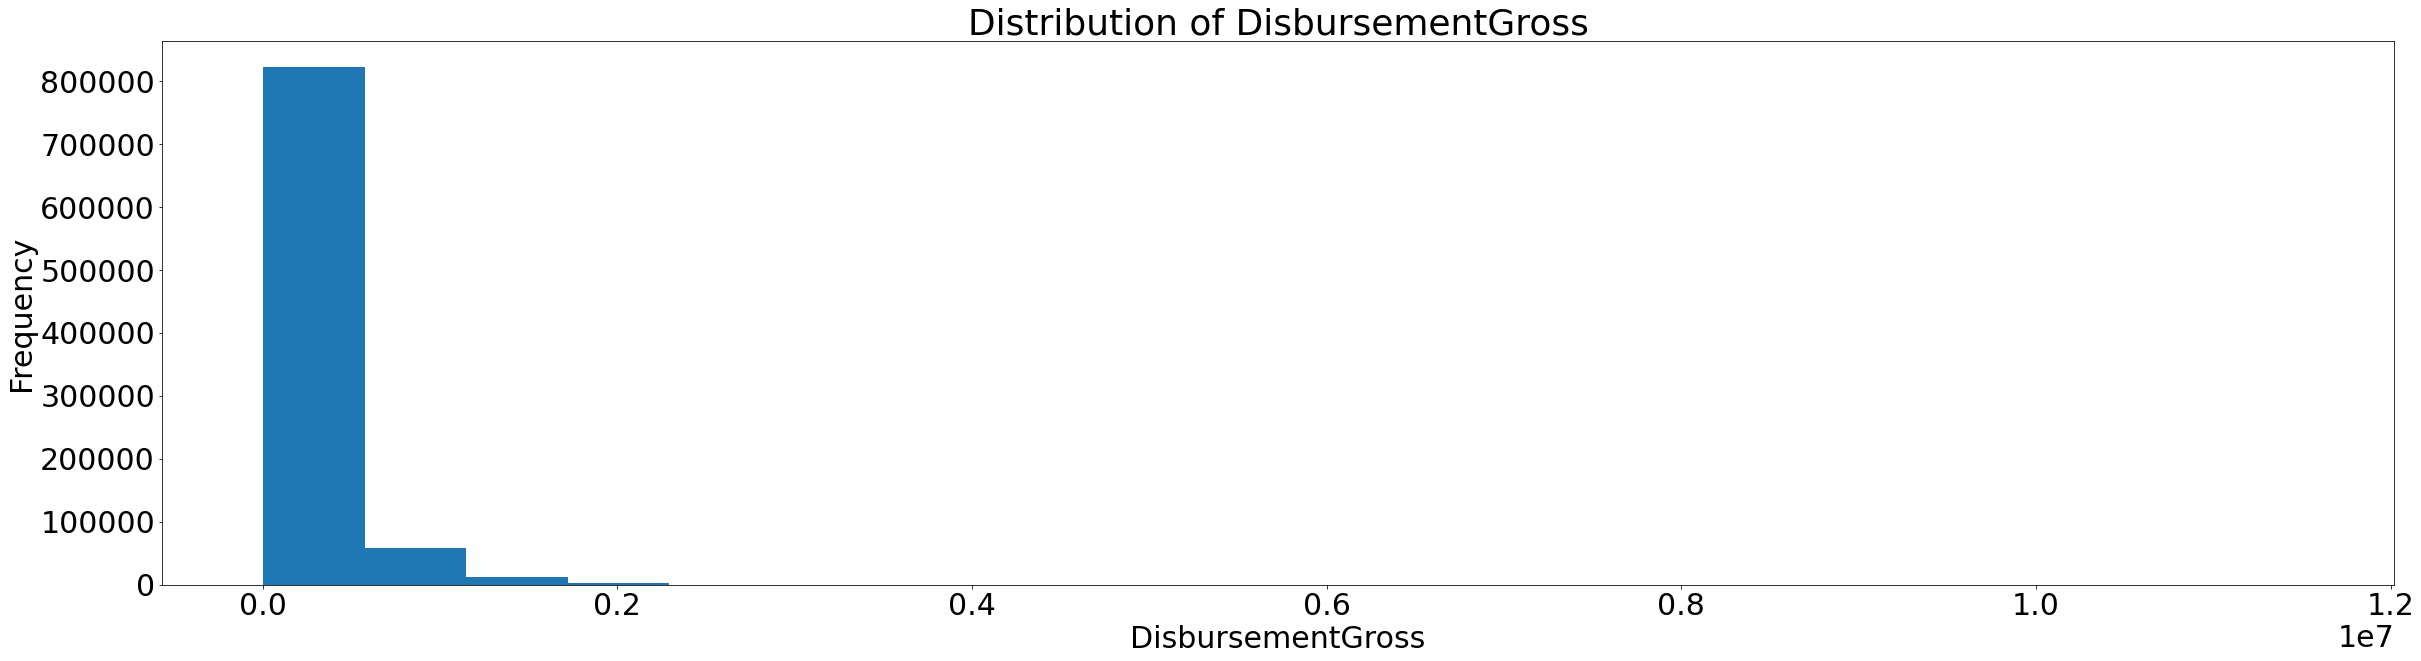

In [170]:
create_plots(SBA_loan_data, column='DisbursementGross', graph_type='hist', bins=20)

Finding the highest amount disbursed

**Insights:** $11.45 million is a very high amount of debt a small business has taken on.

In [171]:
SBA_loan_data['DisbursementGross'].max()

11446325.0

Finding the distribution of gross disbursement dollar amount **capped at $800000**

**Insights:** Most loans disbursed tend to be under $200000. Follows a very similar distribution pattern to GrAppv and SBA_Appv.

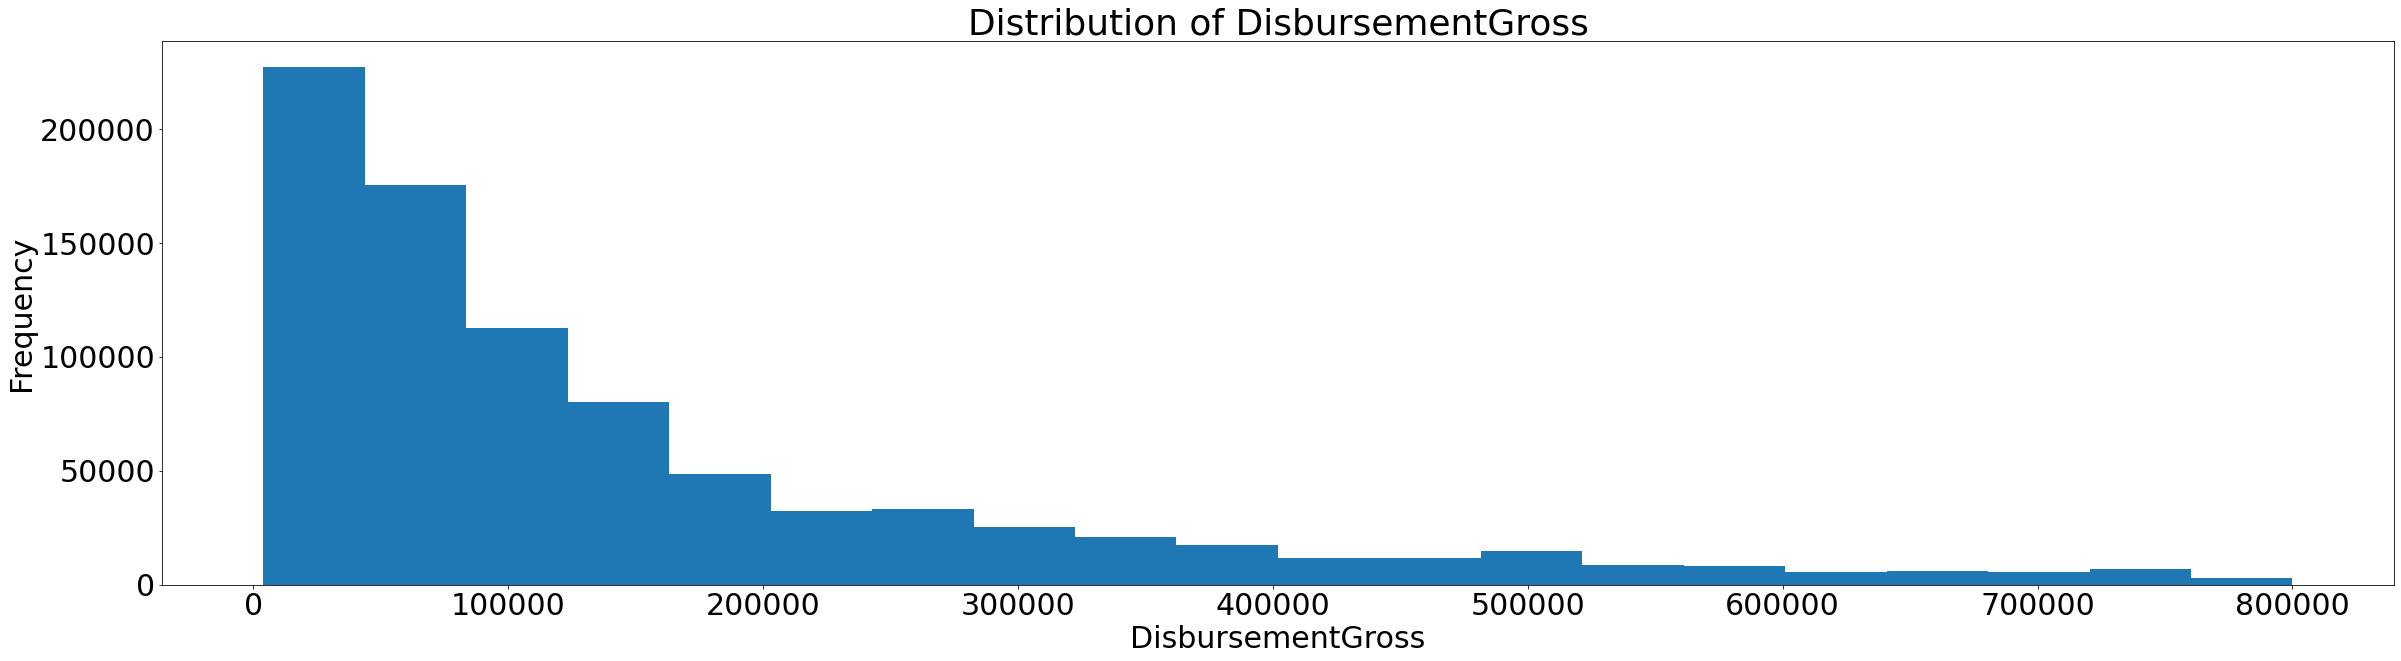

In [172]:
create_plots(SBA_loan_data[SBA_loan_data['DisbursementGross']<800000], column='DisbursementGross', graph_type='hist', bins=20)

Finding out the frequency of loans that still have outstanding amounts vs loans that don't

**Insights:** Almost all loans have been paid off, with only 14 loans that still have outstanding balance.

In [173]:
print(f"Percentage of loans that do not have outstanding balance is {100*(SBA_loan_data['BalanceGross'][SBA_loan_data['BalanceGross']<=0].shape[0])/SBA_loan_data.shape[0]}")
print(f"Percentage of loans that have outstanding balance is {100*(SBA_loan_data['BalanceGross'][SBA_loan_data['BalanceGross']>0].shape[0])/SBA_loan_data.shape[0]}")
print(f"Number of loans that have outstanding balance are {SBA_loan_data['BalanceGross'][SBA_loan_data['BalanceGross']>0].shape[0]}")

Percentage of loans that do not have outstanding balance is 99.99843953243933
Percentage of loans that have outstanding balance is 0.001560467560665963
Number of loans that have outstanding balance are 14


Finding the years of the loans that still have outstanding balance

**Insights:** We assume that this dataset is true as of 2014, given that the most recent year is 2014. The fact that there is a loan with an outstanding balance from 1992 is concerning, given that the loan has not yet been paid off for 22 years.

In [175]:
print(f"The most recent year is {SBA_loan_data['ApprovalFY'].max()}")

SBA_loan_data['ApprovalFY'][SBA_loan_data['BalanceGross']>0].value_counts().sort_index(ascending=False)

The most recent year is 2014


2010    2
2009    1
2008    1
2006    2
2005    6
2002    1
1992    1
Name: ApprovalFY, dtype: int64

Finding out the highest balance that has not been paid off

In [176]:
SBA_loan_data['BalanceGross'].max()

996262.0

Finding the distribution of loans that still have outstanding amounts

**Insights:** Most loans that have outstanding amounts are less than $200000. However, there is 1 loan that is nearly \\$1000000.

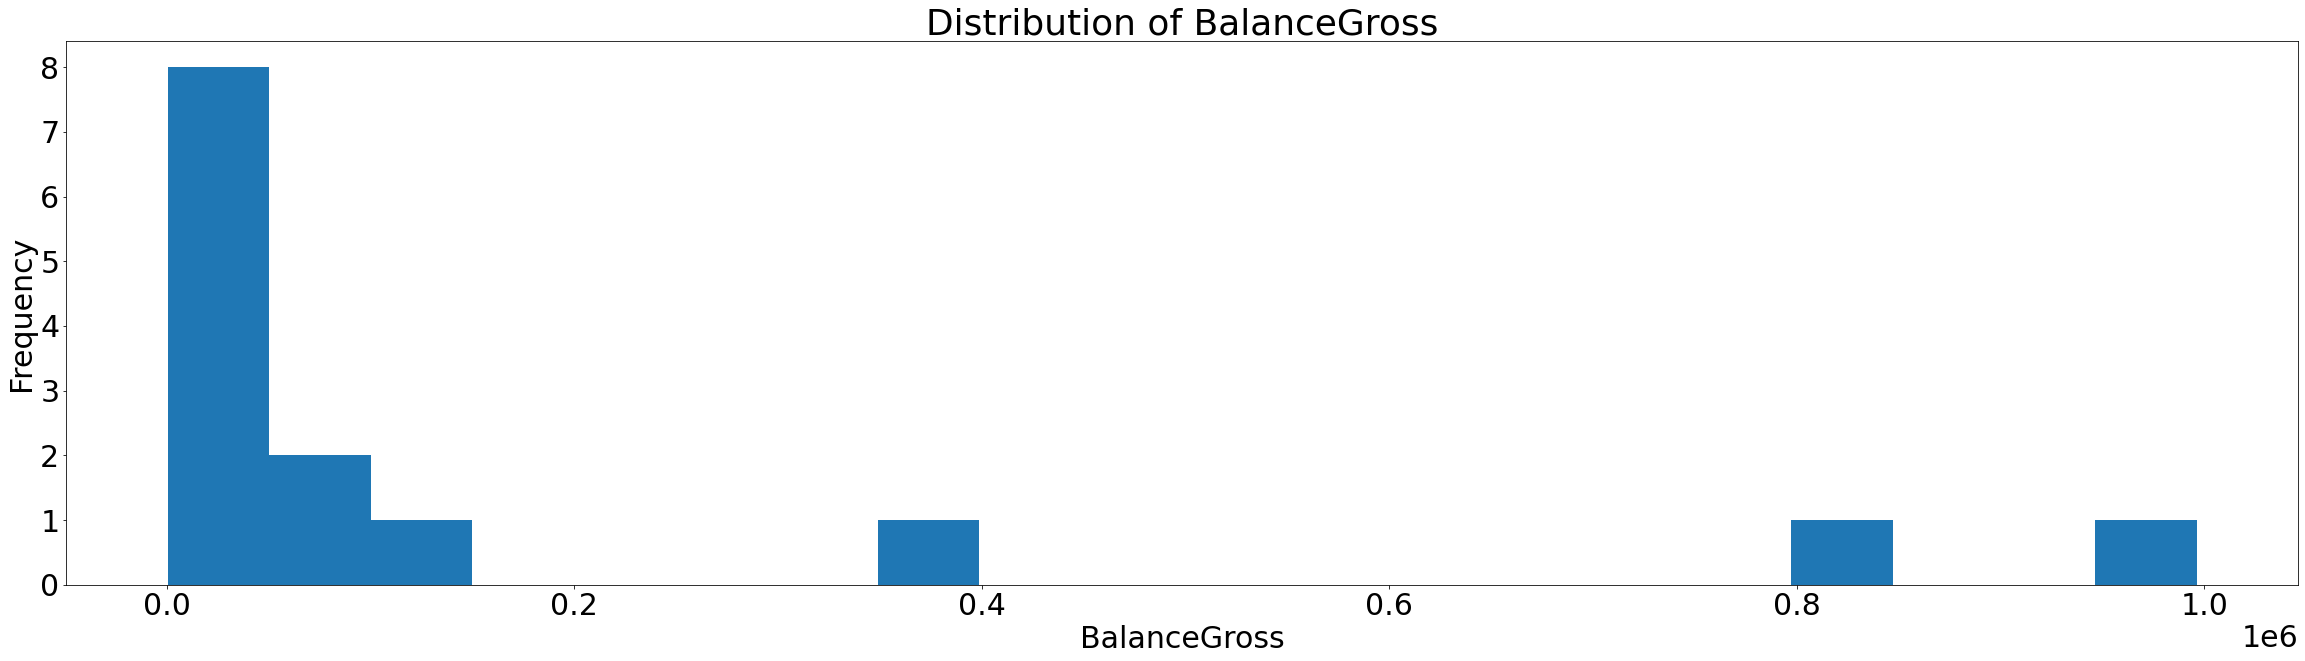

In [177]:
create_plots(SBA_loan_data[SBA_loan_data['BalanceGross']>0], column='BalanceGross', graph_type='hist', bins=20)

Finding the distribution of percent SBA guarantees

**Insights:** For percent SBA guarantees, almost all loans are guaranteed of at least 50%. There is another peak between roughly 75-90%, and finally a sizable number of loans that have nearly or at 100%.

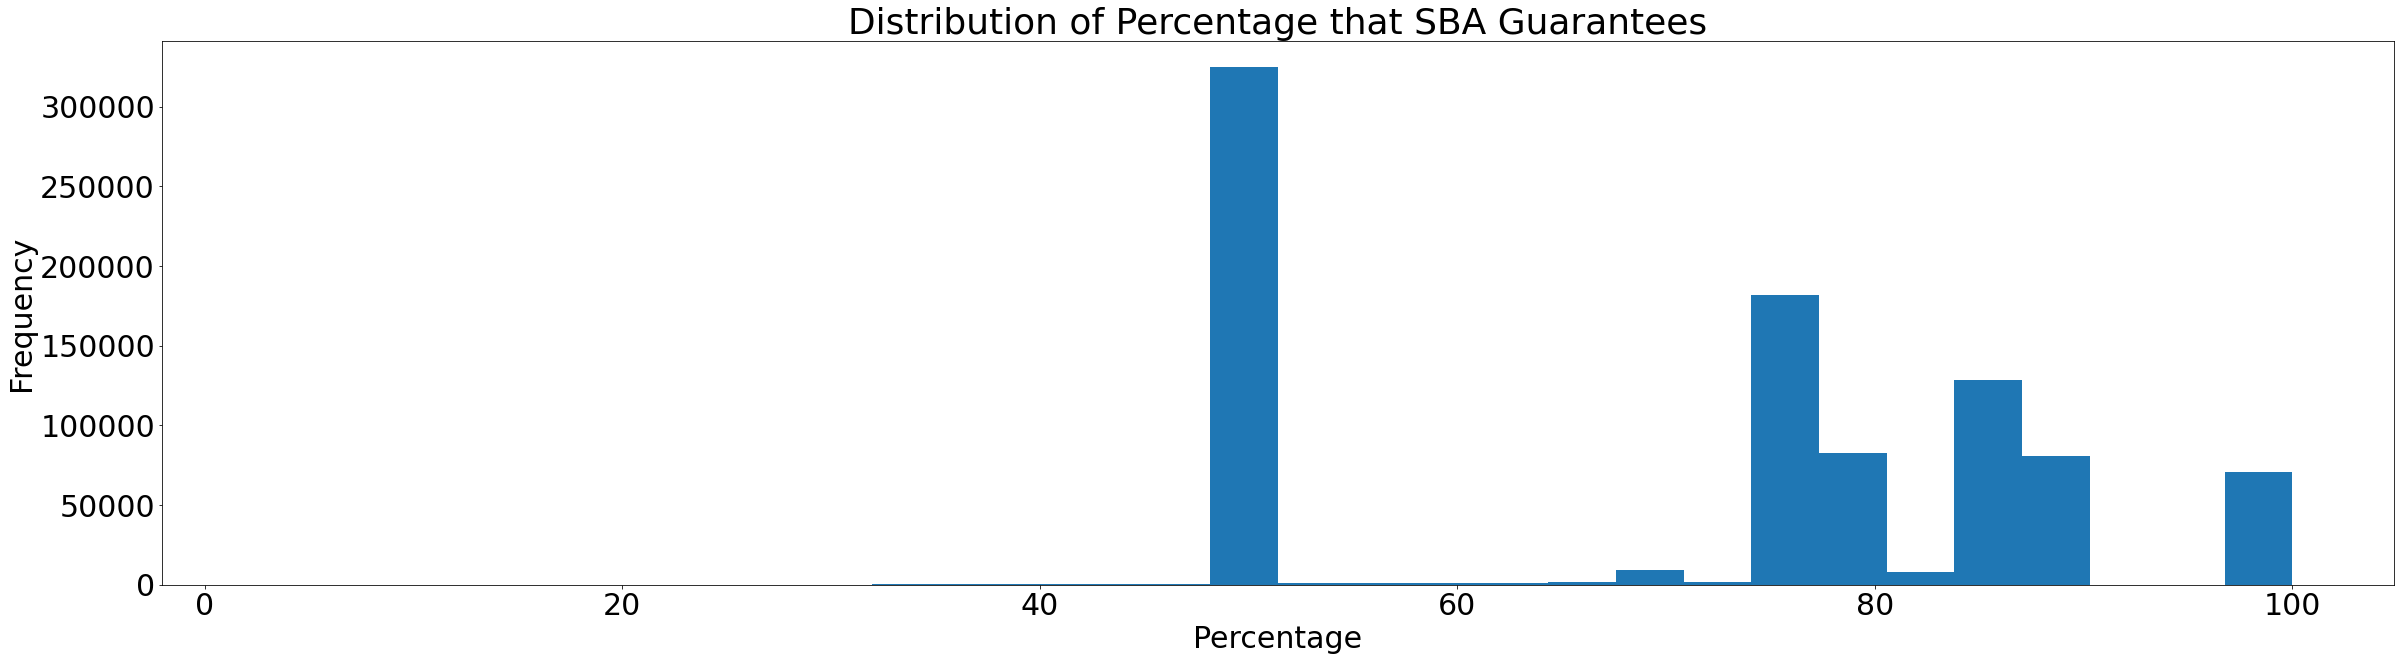

In [178]:
(100*SBA_loan_data['Percent_SBA_Guarantees']).plot(kind='hist', bins=30);
plt.title('Distribution of Percentage that SBA Guarantees');
plt.xlabel('Percentage');

Finding the distribution of the time (in days) between approval and disbursement

**Insights:** There are extreme outliers, both for large negative and positive values. This will require capping the data in the following graph to improve visualization, and hence, understanding of the typical distribution 

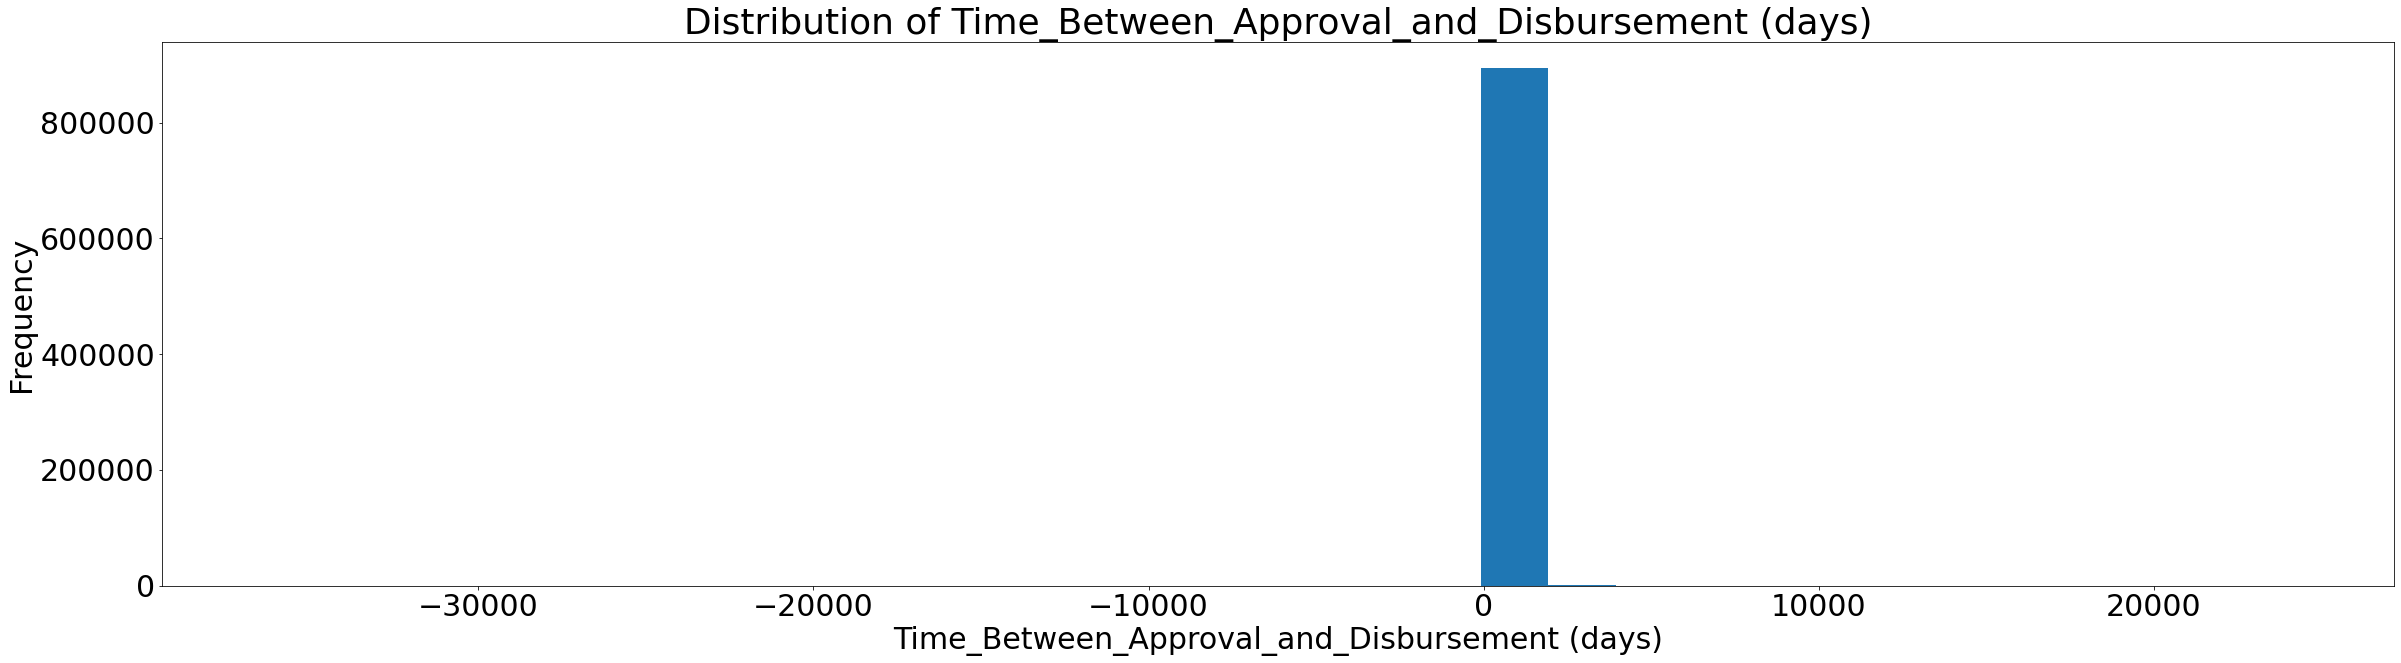

In [179]:
create_plots(SBA_loan_data, column='Time_Between_Approval_and_Disbursement (days)', graph_type='hist', bins=30)

Finding the extreme values **in years**

**Insights:** These values could be errors in data inputting as it is unlikely that there could be a loan that gets dispersed 100 years before it gets approved or a loan that gets dispersed 66 years after it gets approved.

In [180]:
SBA_loan_data['Time_Between_Approval_and_Disbursement (days)'].agg({'min','max'})/365

min   -99.761644
max    66.115068
Name: Time_Between_Approval_and_Disbursement (days), dtype: float64

Finding the distribution of the time (in days) between approval and disbursement **capped between 0 to 500 days.**

**Insights:** Most loans are distributed less than 200 days (roughly 6.5 months) after approval

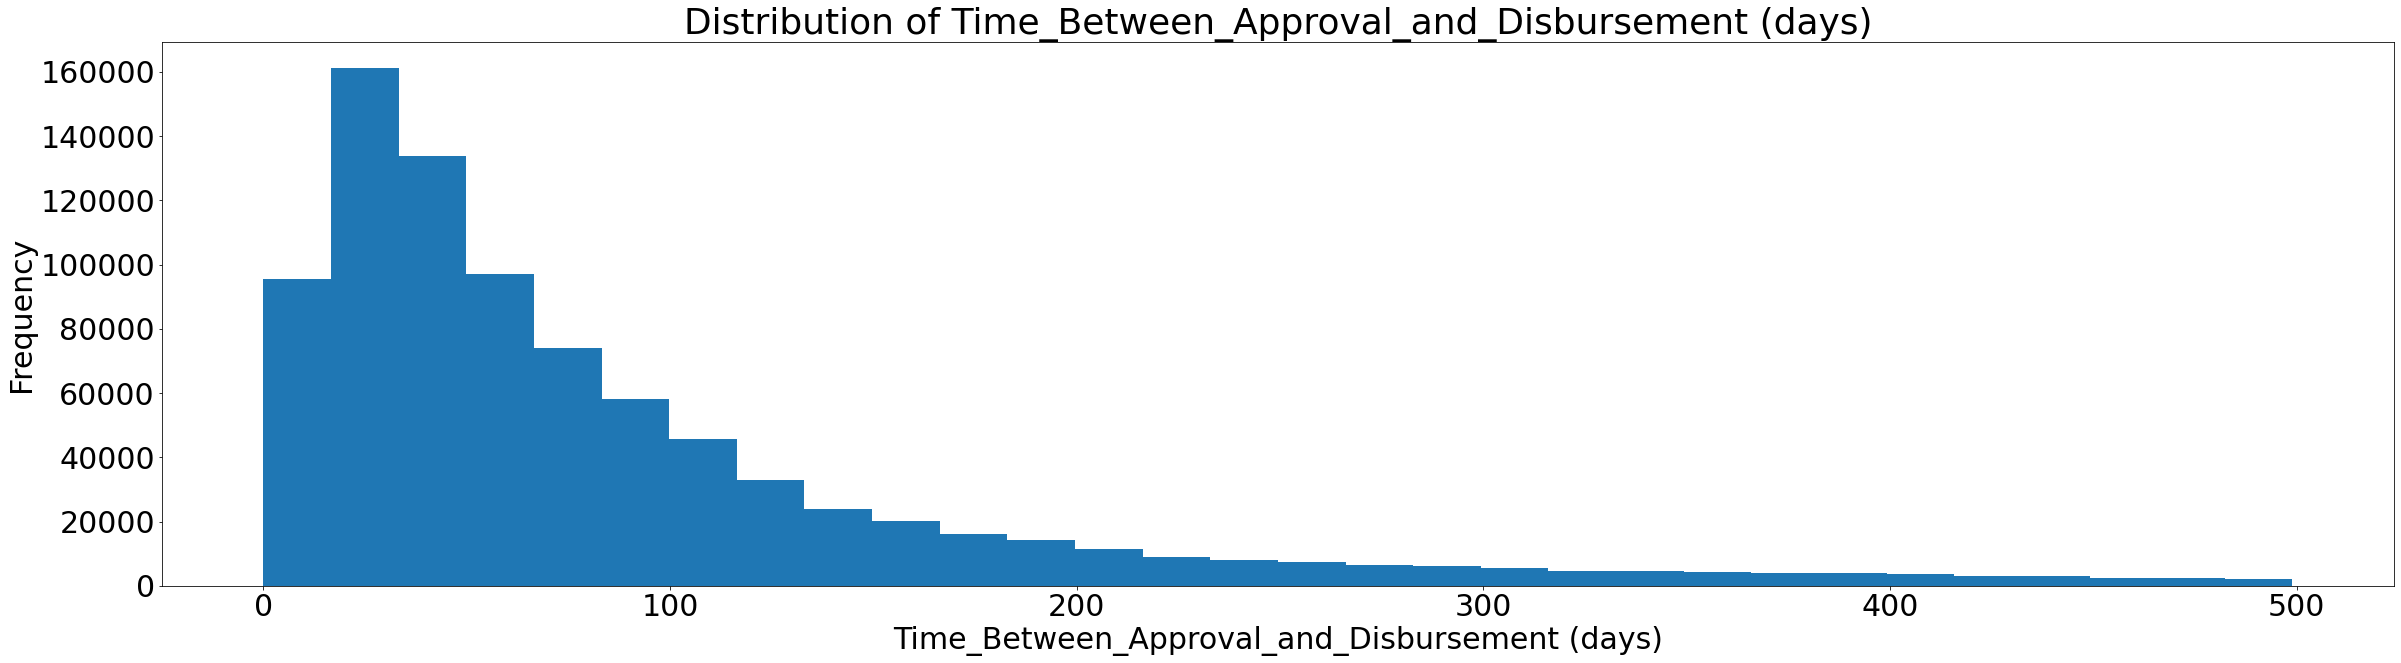

In [181]:
create_plots(SBA_loan_data[(SBA_loan_data['Time_Between_Approval_and_Disbursement (days)']>=0)\
& (SBA_loan_data['Time_Between_Approval_and_Disbursement (days)']<500)], \
             column='Time_Between_Approval_and_Disbursement (days)', graph_type='hist', bins=30)

Finding the number of loans that are disbursed before they are approved.

**Insights:** The number of loans disbursed before being approved is very small, at 811, or less than 0.1% of the entire dataset. However, it is still concerning to see that there are quite a few loans that get disbursed before being approved, as this is considered risky business behavior

In [182]:
print(f" The number of loans disbursed before they are approved are {SBA_loan_data['Time_Between_Approval_and_Disbursement (days)'][SBA_loan_data['Time_Between_Approval_and_Disbursement (days)']<0].shape[0]}")

 The number of loans disbursed before they are approved are 810


Analyzing the distribution of loans that were approved during a recession vs not during one

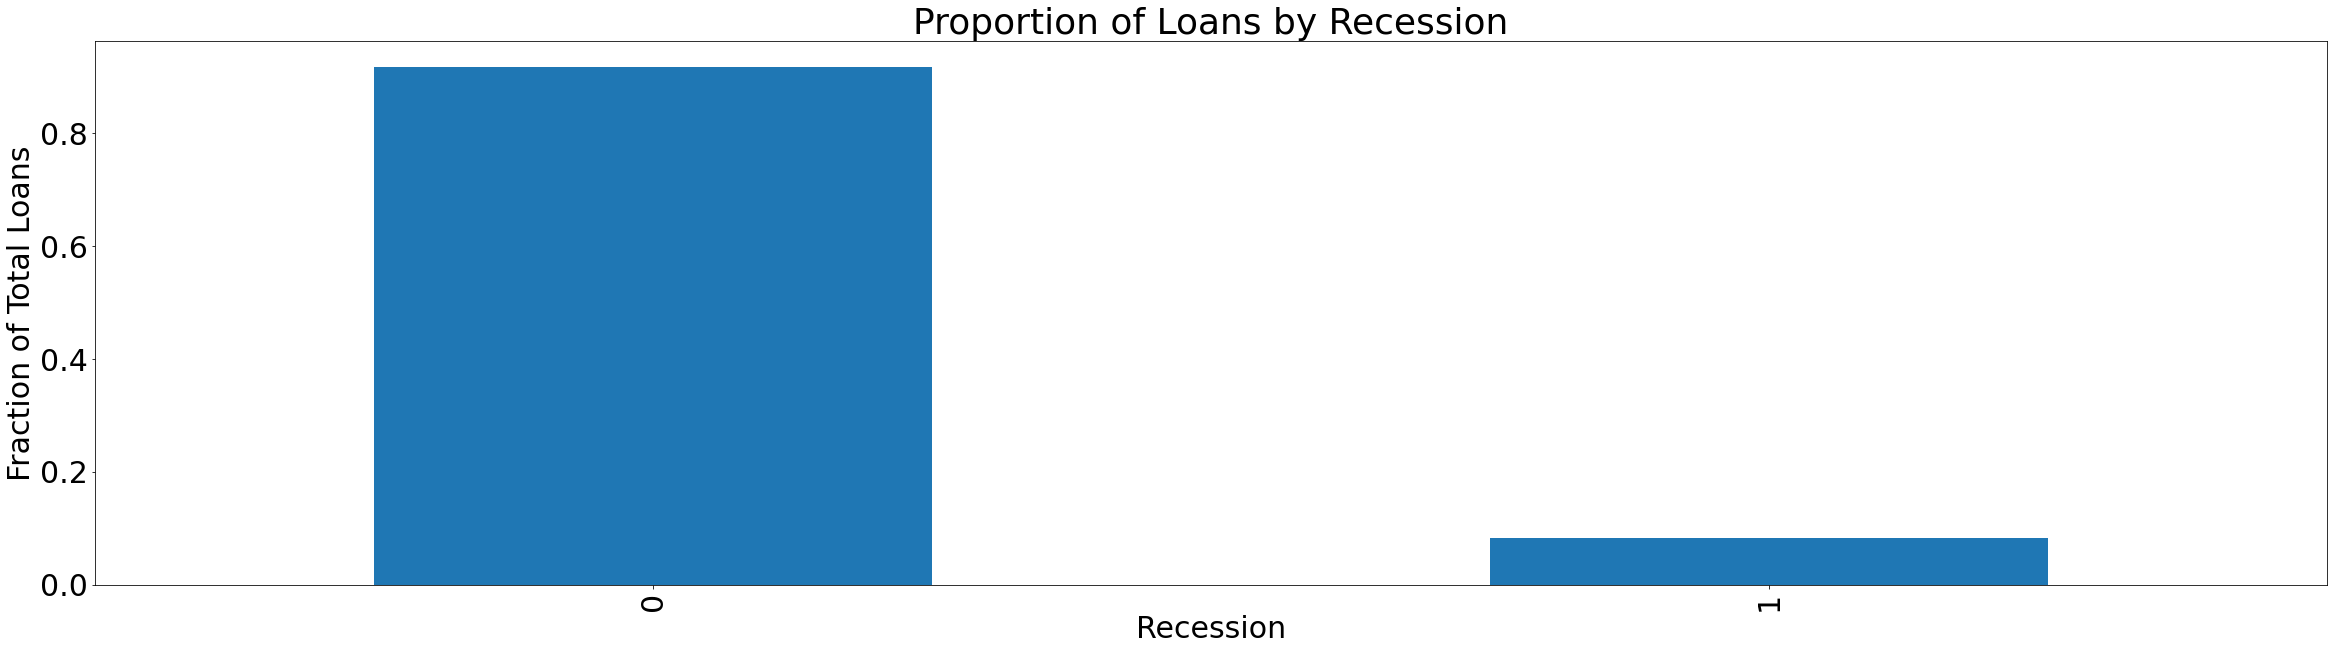

In [183]:
create_plots(SBA_loan_data, 'Recession', 'bar', True, False)

Finding out what the average retention rate is (both mean and median)

**Insights:** Given that the industry average retention rate is around 81% according to this article, the mean retention rate of 41.2% is very low. Could be a trend specific to small businesses.

https://www.dailypay.com/blog/employee-retention-rate/

In [185]:
SBA_loan_data['Retention_Rate'].agg({'min','max','mean','median'})

median    0.166667
mean      0.412294
min       0.000000
max       1.000000
Name: Retention_Rate, dtype: float64

<a id='2.4'></a>
## 2.4 Removing Redundant Columns and Loans with Null Values

Dropping the ChgOffDate as there are many different null values and the 1 value for MIS_Status represents Chgoffs/defaults. Hence this column is obsolete. Also dropping the charged off amount for the same reason. Finally, the primary key was dropped as it will not be used as a feature.

Despite the company name, city, zip code, bank name, disbursement date, amount approved by bank, and amount guaranteed by SBA not being used in the model, I have decided not to drop these columns because they could potentially be used as features in the future.

In [186]:
SBA_loan_data.drop(columns=['LoanNr_ChkDgt','ChgOffDate','ChgOffPrinGr'], inplace=True)

Seeing how many null values there are after data cleaning

**Insights:** After cleaning the data, there are many more null values. This is because there are many data points that do not have any semantic meaning and hence do not provide insight into the underlying business trends 

In [187]:
SBA_loan_data.isnull().sum()

Name                                                 14
City                                                 30
State                                                13
Zip                                                   0
Bank                                               1506
BankState                                          1513
NAICS                                                 0
ApprovalDate                                          0
ApprovalFY                                            0
Term                                                  0
NoEmp                                                 0
NewExist                                           1162
CreateJob                                             0
RetainedJob                                           0
FranchiseCode                                         0
UrbanRural                                       322826
RevLineCr                                        277255
LowDoc                                          

Dropping the null values to assess how many rows remain

**Insights:** Given that there are still nearly 350000 values to work with, dropping the null values is unlikely to affect the model performance.

**Important Note:** Because there are nearly 350000 values to work with, we still have plenty of data to work with even after removing nearly half of the original dataset's rows. I believe that running imputations on null values is not worth having more data to work with as imputing values introduces noise and could lead to misleading results. Thus, in summary, the reason I prefer removing values rather than imputing is because there is enough data to work with even after removing values.

In [188]:
SBA_loan_data.dropna().shape

(348537, 34)

Dropping all the null values

In [189]:
SBA_loan_data.dropna(inplace=True)

Finding out whether the timeline for the data has been altered after removing all the null values

**Insights:** It appears the missing values issue is systematic. Given that the years before 1994 all had missing values. Could be record keeping related problems. Thus, a new timeframe (1994 to 2014) will be analyzed and used for the ML models, rather than 1966 to 2014. 

**Important Note:** This could have significant implications on model performance and features deemed as significant as business laws, trends, and economic situations will likely be different after the '90s compared to before.

In [191]:
SBA_loan_data['ApprovalFY'].agg(columns={'min', 'max'})

columns  min    1994
         max    2014
Name: ApprovalFY, dtype: int64

Calculating the default rate after removing null values.

**Insights:** It appears that defaults have become more common in the more recent years, given that defaults were at 18% when including the entire time period (1966-2014) while they have increased to over 25% when only including the 20 year time period from (1994 to 2014). This is likely due to the great recession that have affected the trends to what we're seeing in the below graph. 

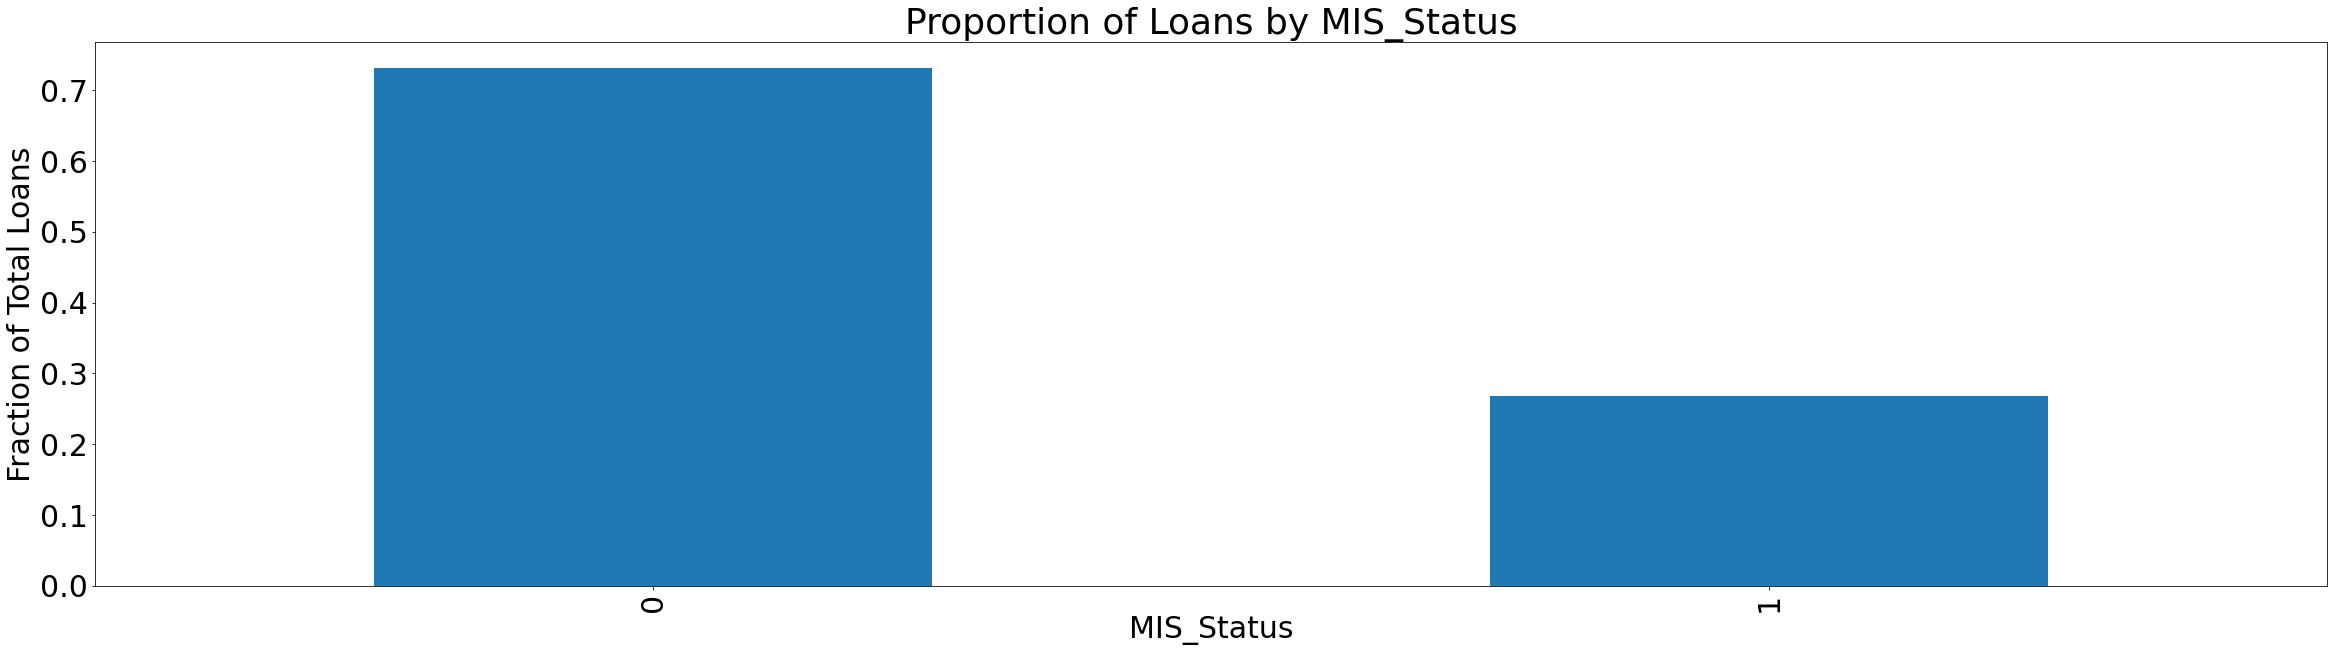

In [193]:
create_plots(SBA_loan_data, 'MIS_Status', 'bar', True, False)

<a id='2.5'></a>
## 2.5 EDA - Analysis of Loan Default Rate

This section entails the comparison of the loan default rate across various features to understand general default trends. This section will inform of which features to use in the Machine Learning models in the following section.

**Important Note:** For this section, we also look at whether there are null values in the aggregated tables. If there are null values, this means that there are certain value(s) in the feature that do not have any defaults. Thus, the null values will need to be replaced with 0s if nulls exist.

In [194]:
def plot_default_rate(df, column, sort_values_greatest_to_least=True):
    
    table_of_default_rates=df.groupby(column)[[column]]\
    .agg('count').rename(columns={column:f'Number of Loans by {column}'}).join(
    df[df['MIS_Status']==1].groupby(column)[[column]]\
    .agg('count').rename(columns={column:f'Number of Defaults by {column}'}), how='left'
    )
    if sort_values_greatest_to_least:
        (table_of_default_rates[f'Number of Defaults by {column}']/table_of_default_rates[f'Number of Loans by {column}']).\
        sort_values(ascending=False).plot(kind='bar');
        plt.title(f'Default Rate by {column}');
        plt.ylabel('Default Rate');
    
    else:
        (table_of_default_rates[f'Number of Defaults by {column}']/table_of_default_rates[f'Number of Loans by {column}']).\
        plot(kind='bar');
        plt.title(f'Default Rate by {column}');
        plt.ylabel('Default Rate');

### State

Plotting the state default rate.

**Insights:** Nevada and Georgia have the highest default rates, at nearly 40%. North Dakota has one of the lowest default risks, at roughly 10%. This visual demonstrates that the state a business is in does influence the default risk.

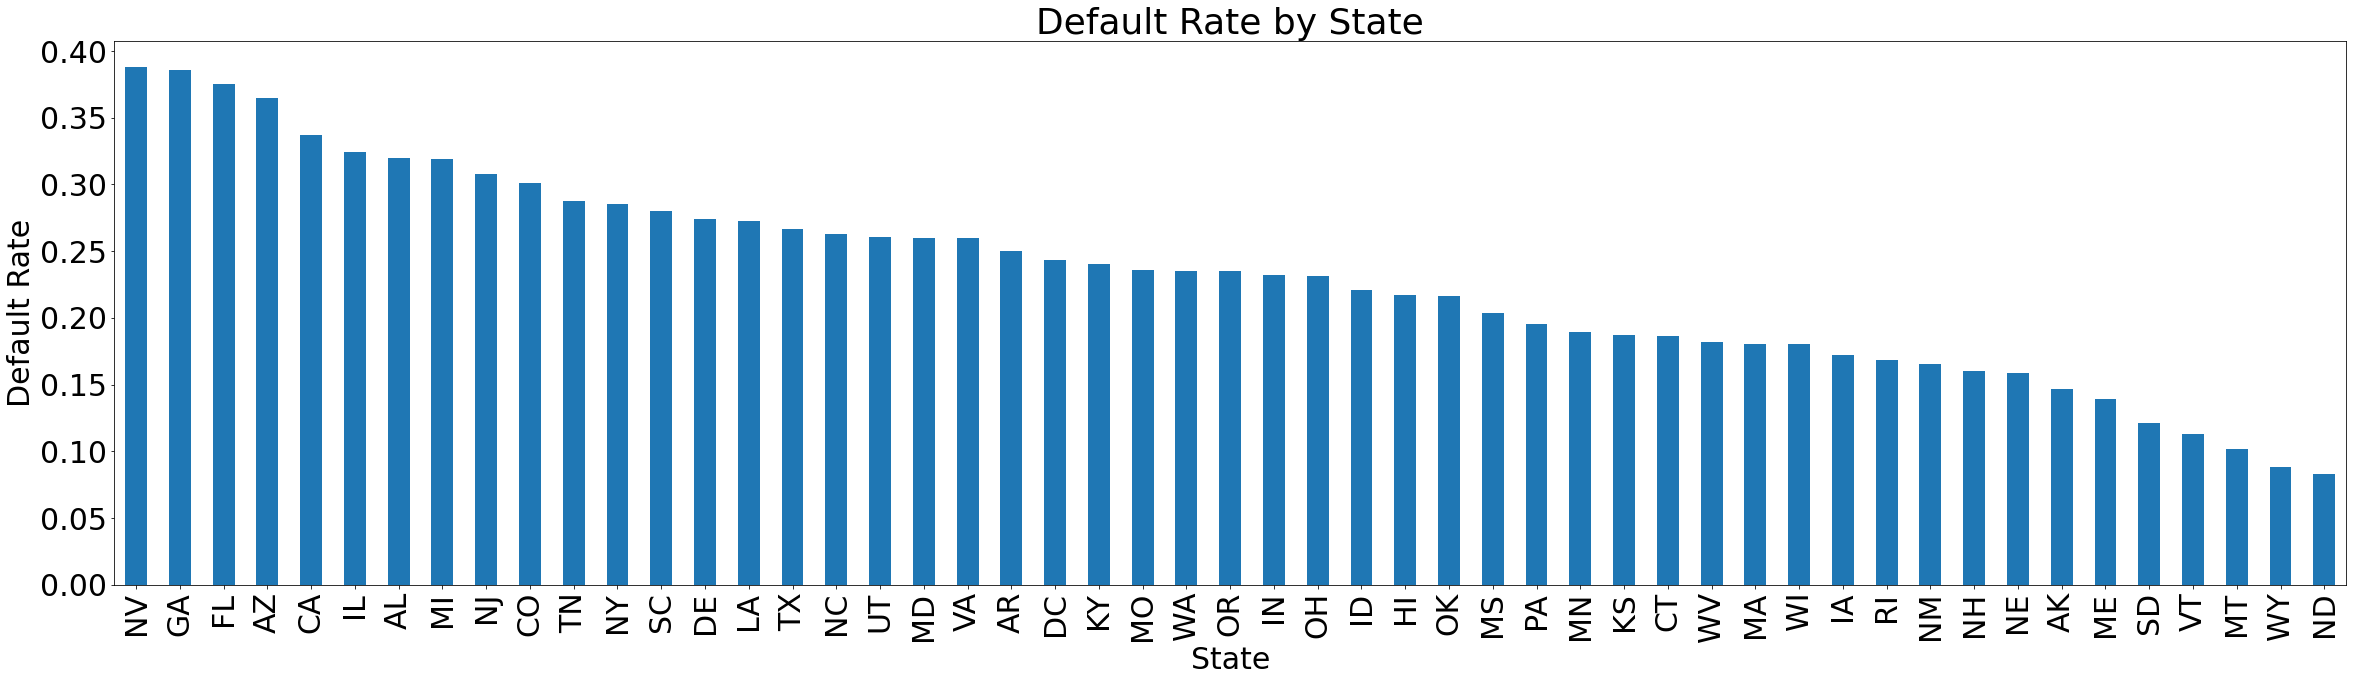

In [195]:
plot_default_rate(SBA_loan_data, 'State')

### New vs Existing Business

Plotting the default rate for new vs. existing businesses.

**Insights:** Default rate does not appear to be significantly influenced by whether the business is new or not, with a slightly lower default rate for new businesses

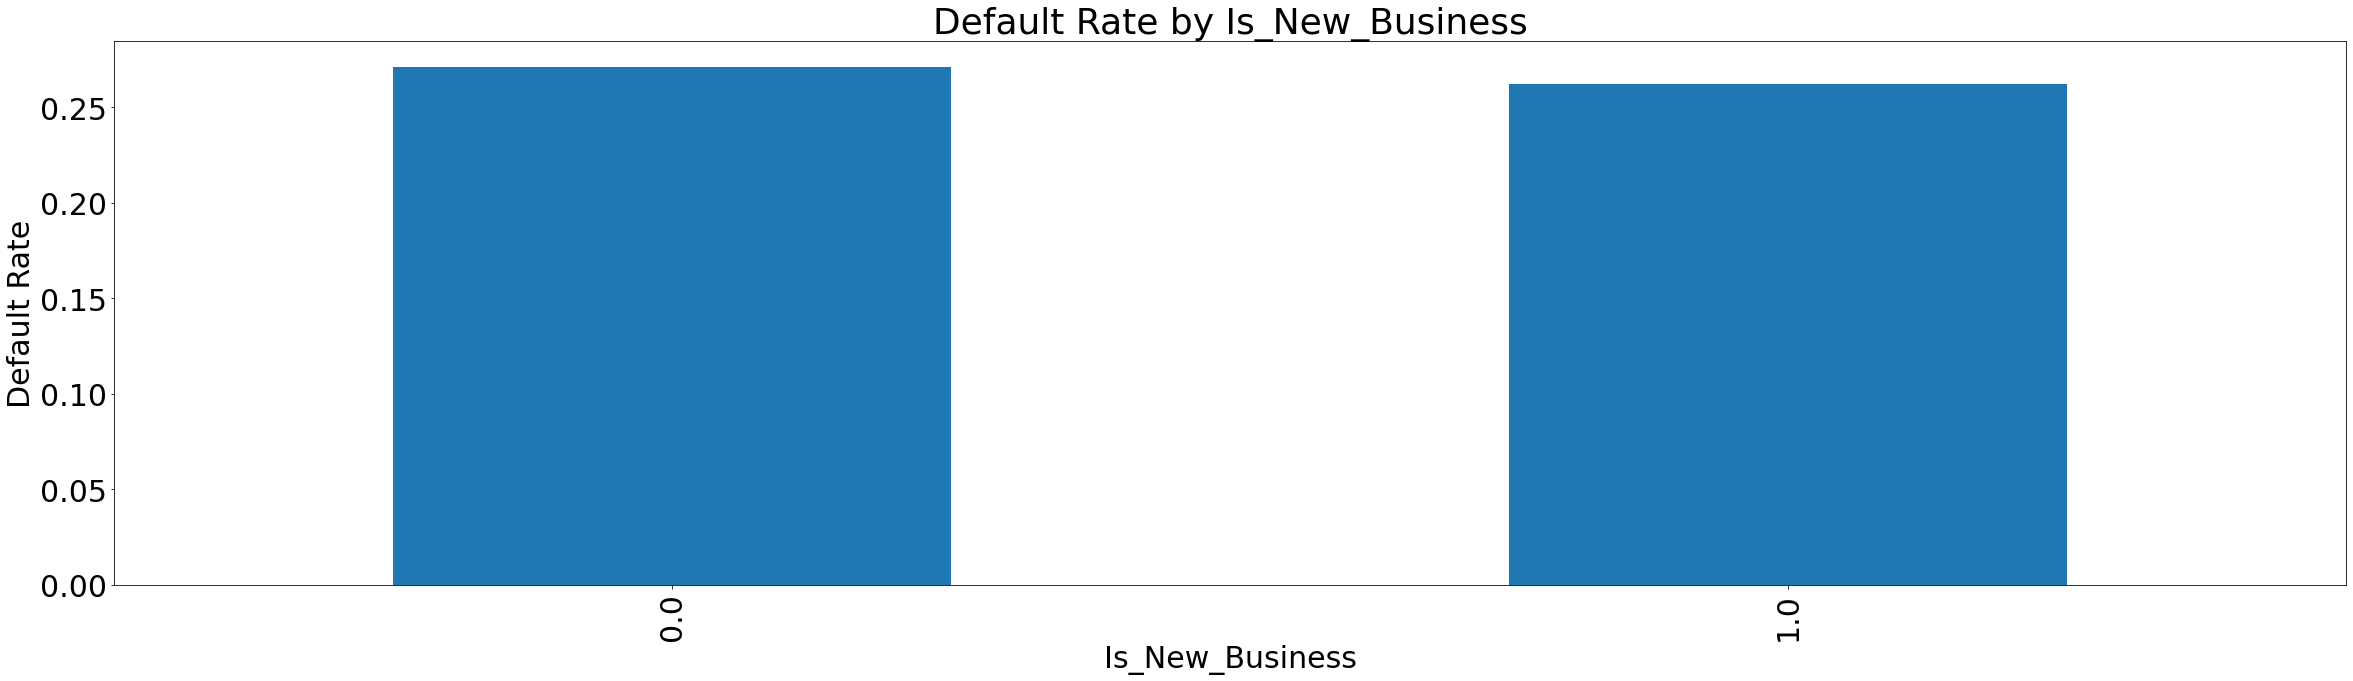

In [196]:
plot_default_rate(SBA_loan_data, 'Is_New_Business')

### Urban vs Rural

Creating a table calculating the number of loans and number of defaults, grouped by whether the business is urban (0) or rural (1).

Plotting the default rate for urban vs. rural businesses.

**Insights:** Default rate appears to be higher for urban compared to rural businesses.

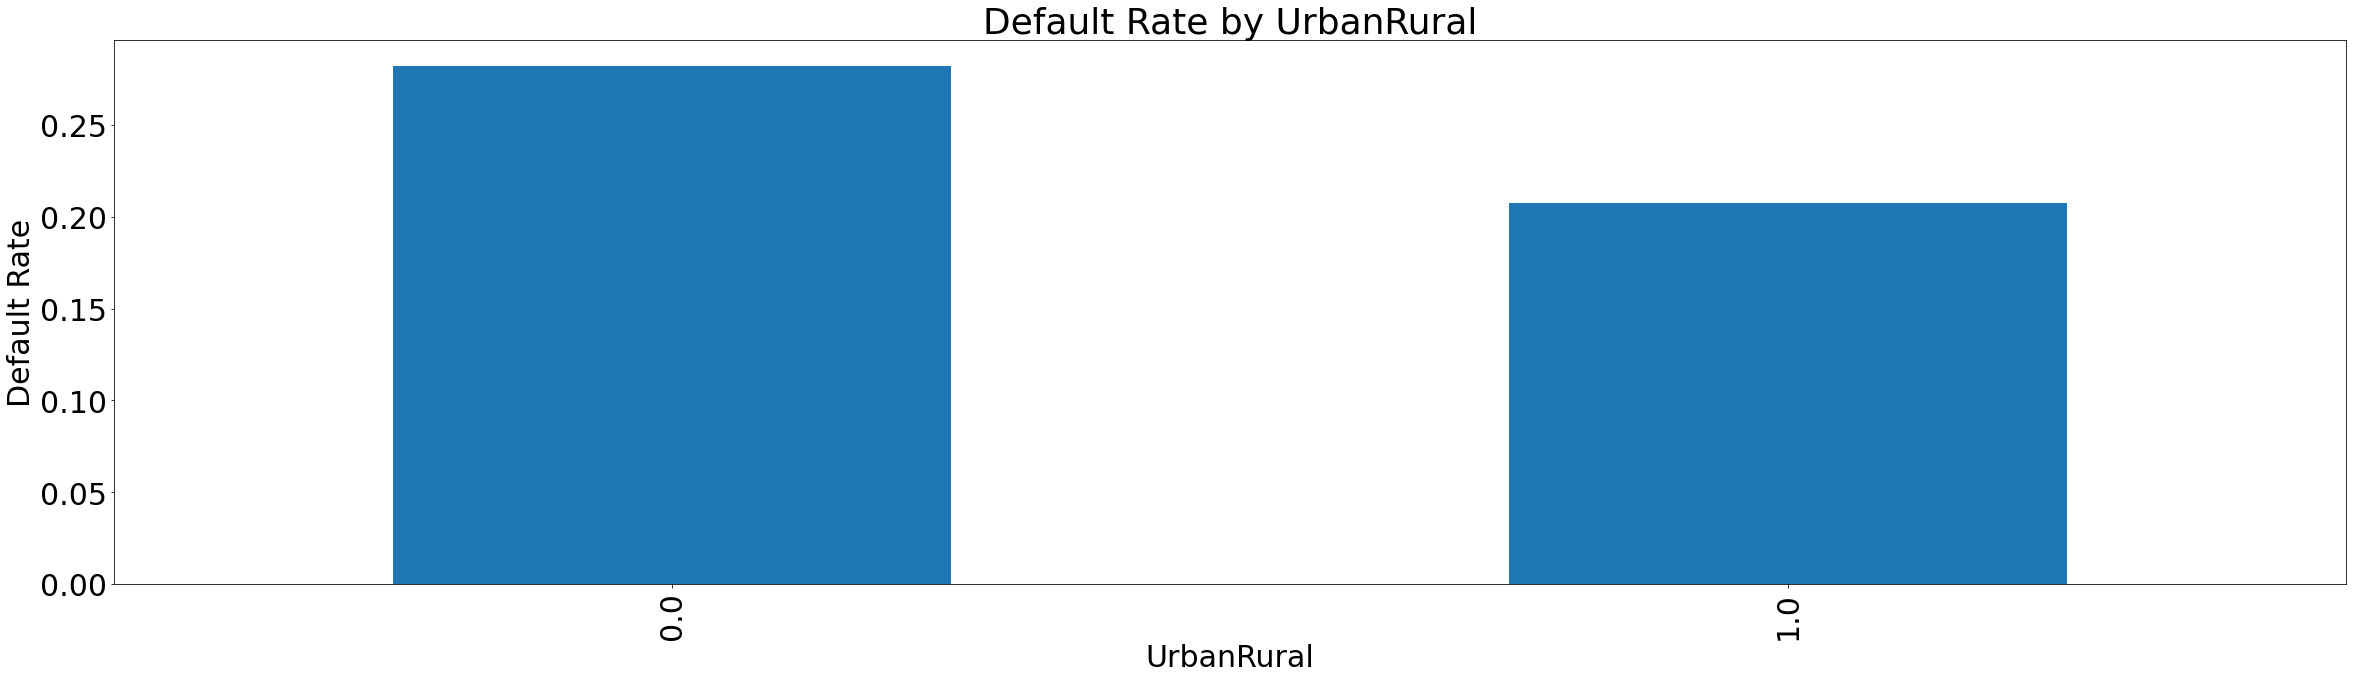

In [197]:
plot_default_rate(SBA_loan_data, 'UrbanRural')

### Revolving Line of Credit

Creating a table calculating the number of loans and number of defaults, grouped by whether the loan is revolving line of credit

Plotting the default rate for revolving line of credit.

**Insights:** Default rate does not appear to be influenced much by whether the loan is revolving line of credit, although having a revolving line of credit does appear to reduce the default risk slightly.

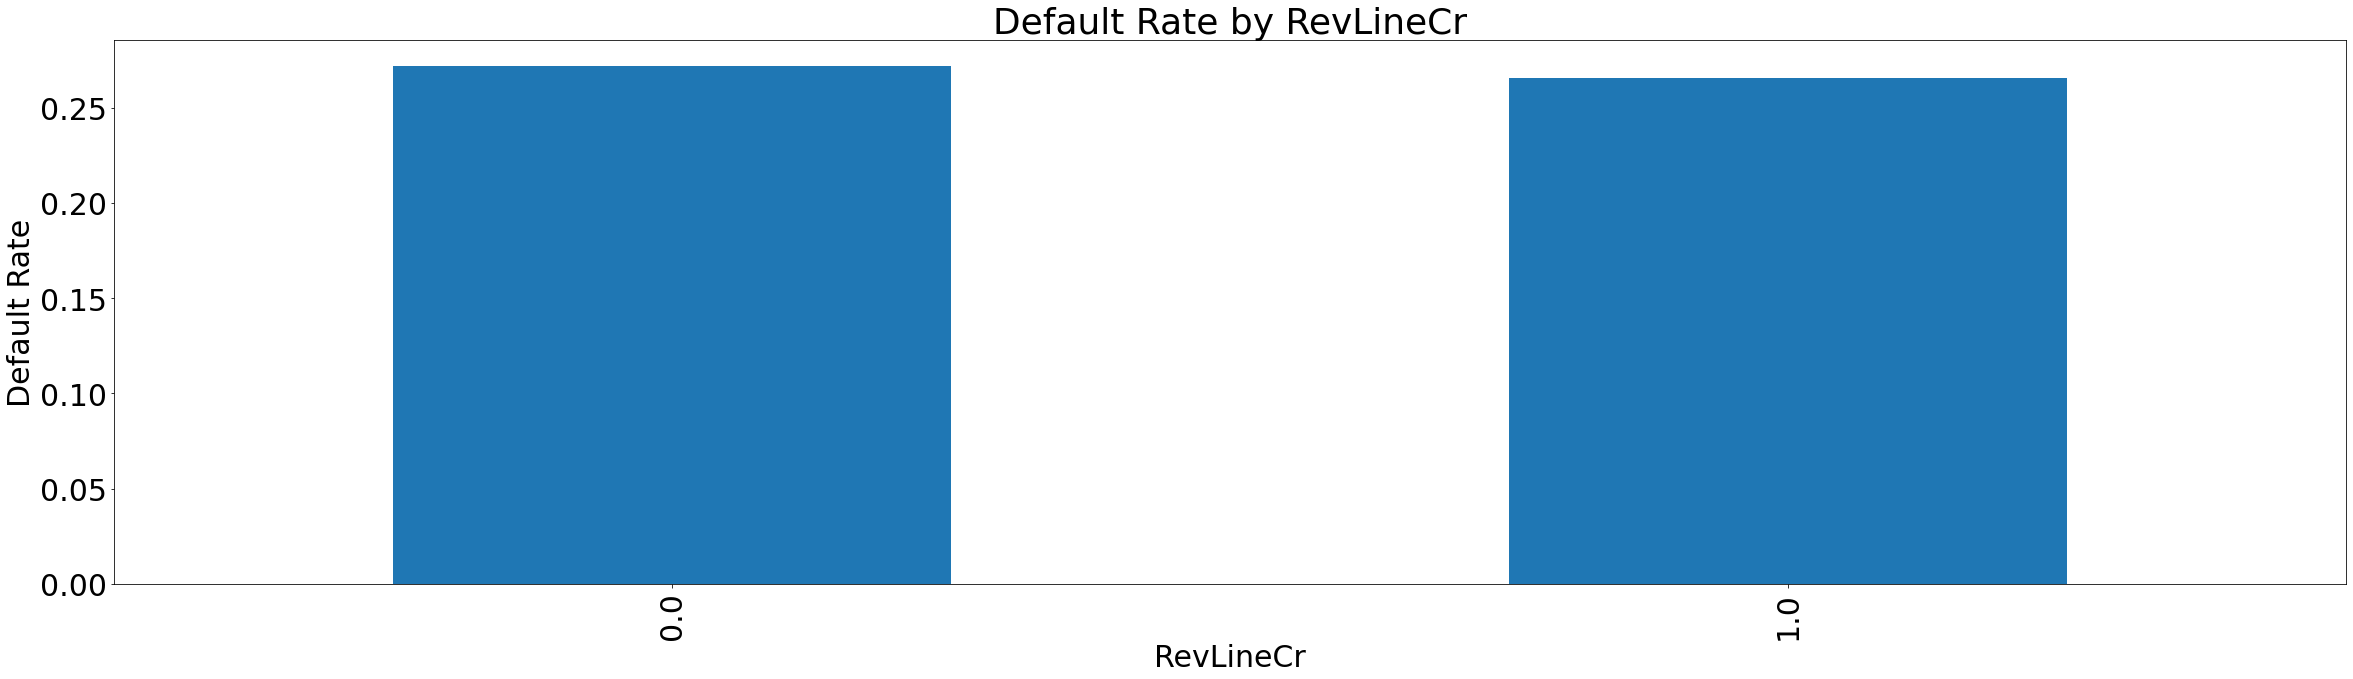

In [198]:
plot_default_rate(SBA_loan_data, 'RevLineCr')

### LowDoc Loan Program

Creating a table calculating the number of loans and number of defaults, grouped by whether the loan is part of the LowDoc loan program.

Plotting the default rate for whether loan is part of the LowDoc loan program.

**Insights:** It appears that loans that are part of the LowDoc loan program are far less likely to default. The reason for this could be that SBA's lowdoc program's purpose is to assist small businesses in paying off their loans, which in turn would reduce the default risk.

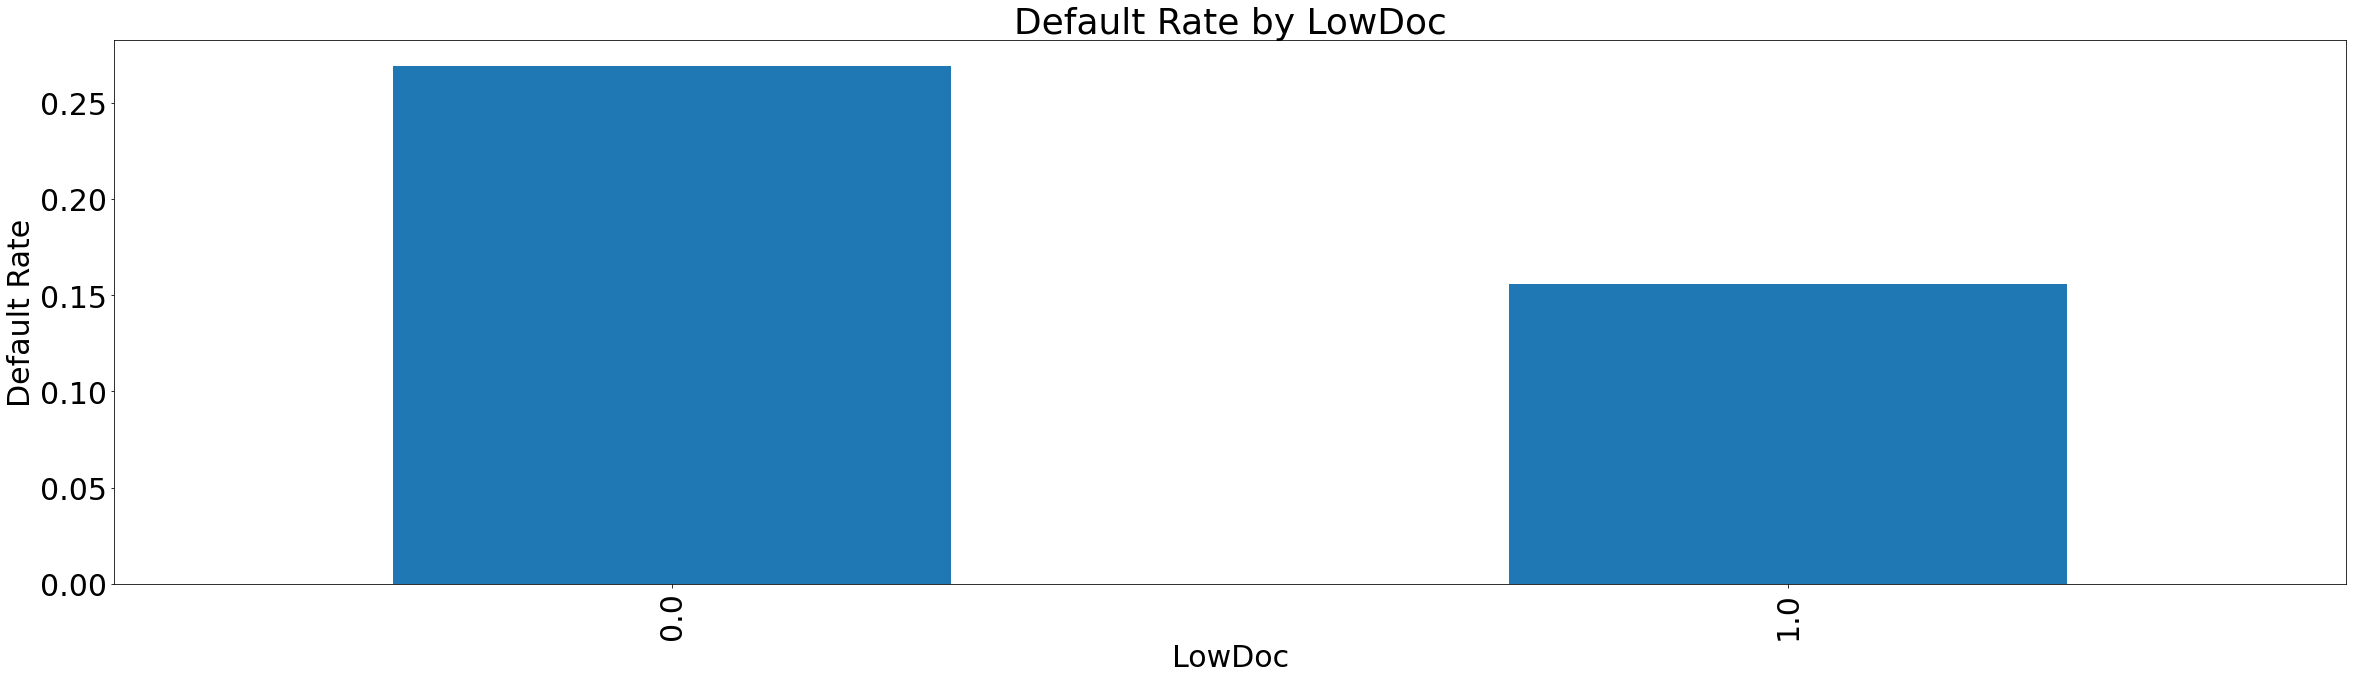

In [199]:
plot_default_rate(SBA_loan_data, 'LowDoc')

### Franchised or Not

Creating a table calculating the number of loans and number of defaults, grouped by whether the loan is part of a franchised business.

Plotting the default rate for whether loan is part of a franchised business.

**Insights:** It appears that franchised businesses (denoted by 1) are much less likely to default on the loan. This could be because franchised businesses receive assistance from the franchisor, which would lower failure rate/increase profits, in turn, reducing the risk of loan default.

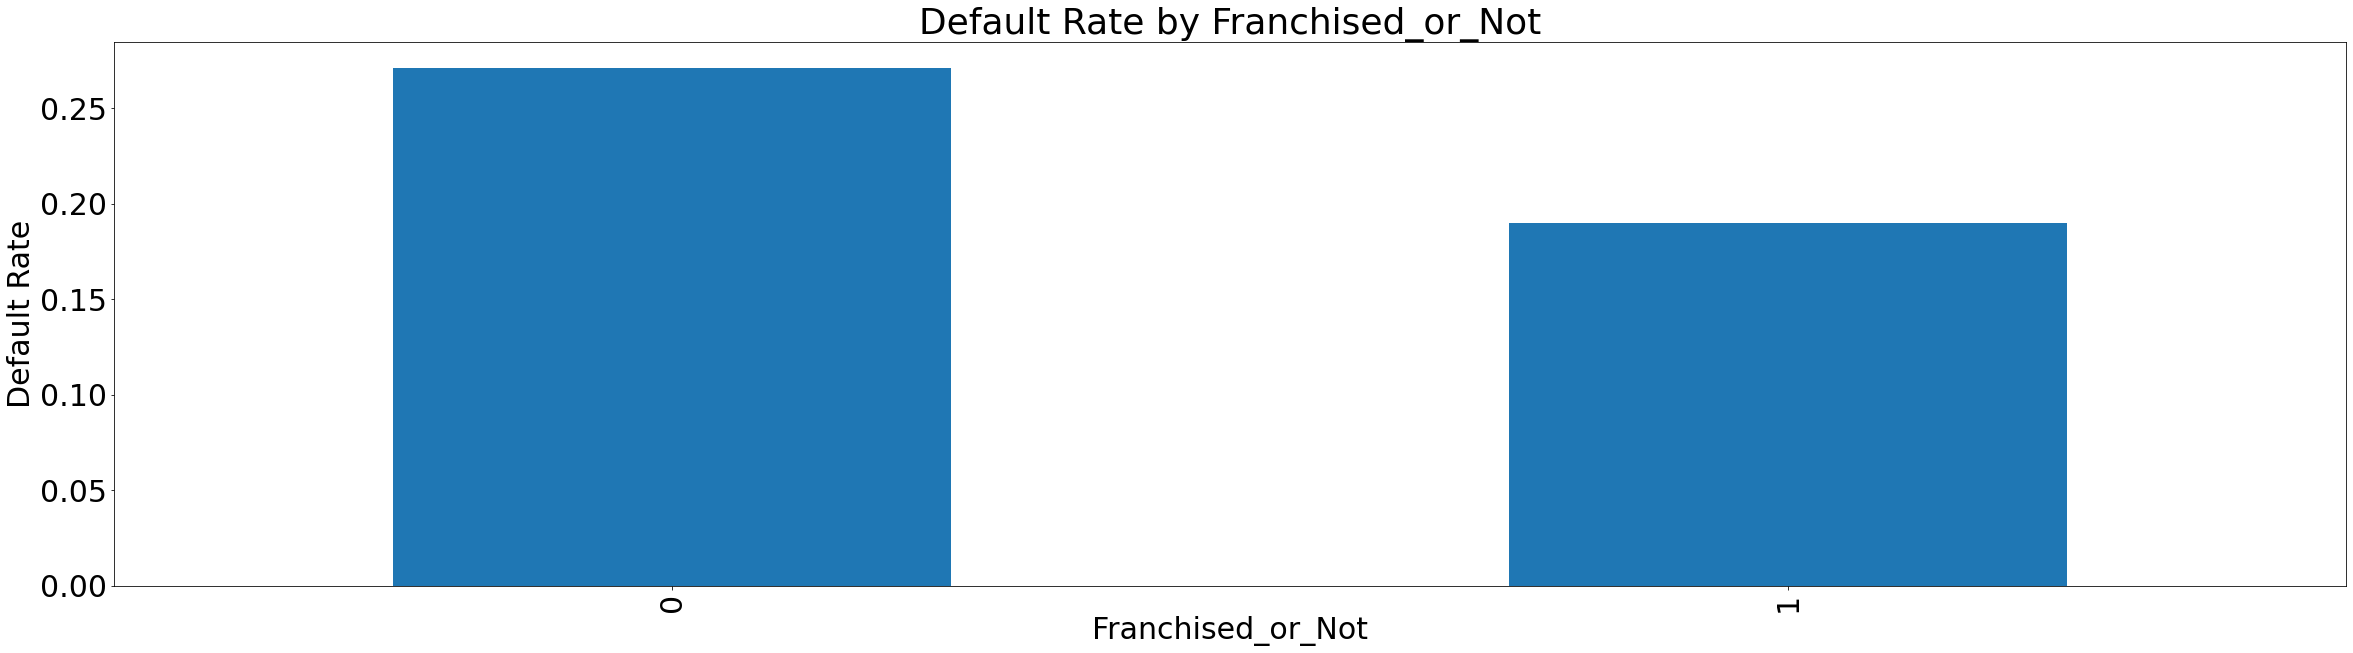

In [200]:
plot_default_rate(SBA_loan_data, 'Franchised_or_Not')

### Borrower Being in Same State as Bank

Creating a table calculating the number of loans and number of defaults, grouped by whether the borrower is in the same state as their bank

Plotting the default rate for whether the borrower is in the same state as their bank.

**Insights:** It appears that borrowers that are in the same state as their bank are far less likely to default. This could be due to ease of communication.

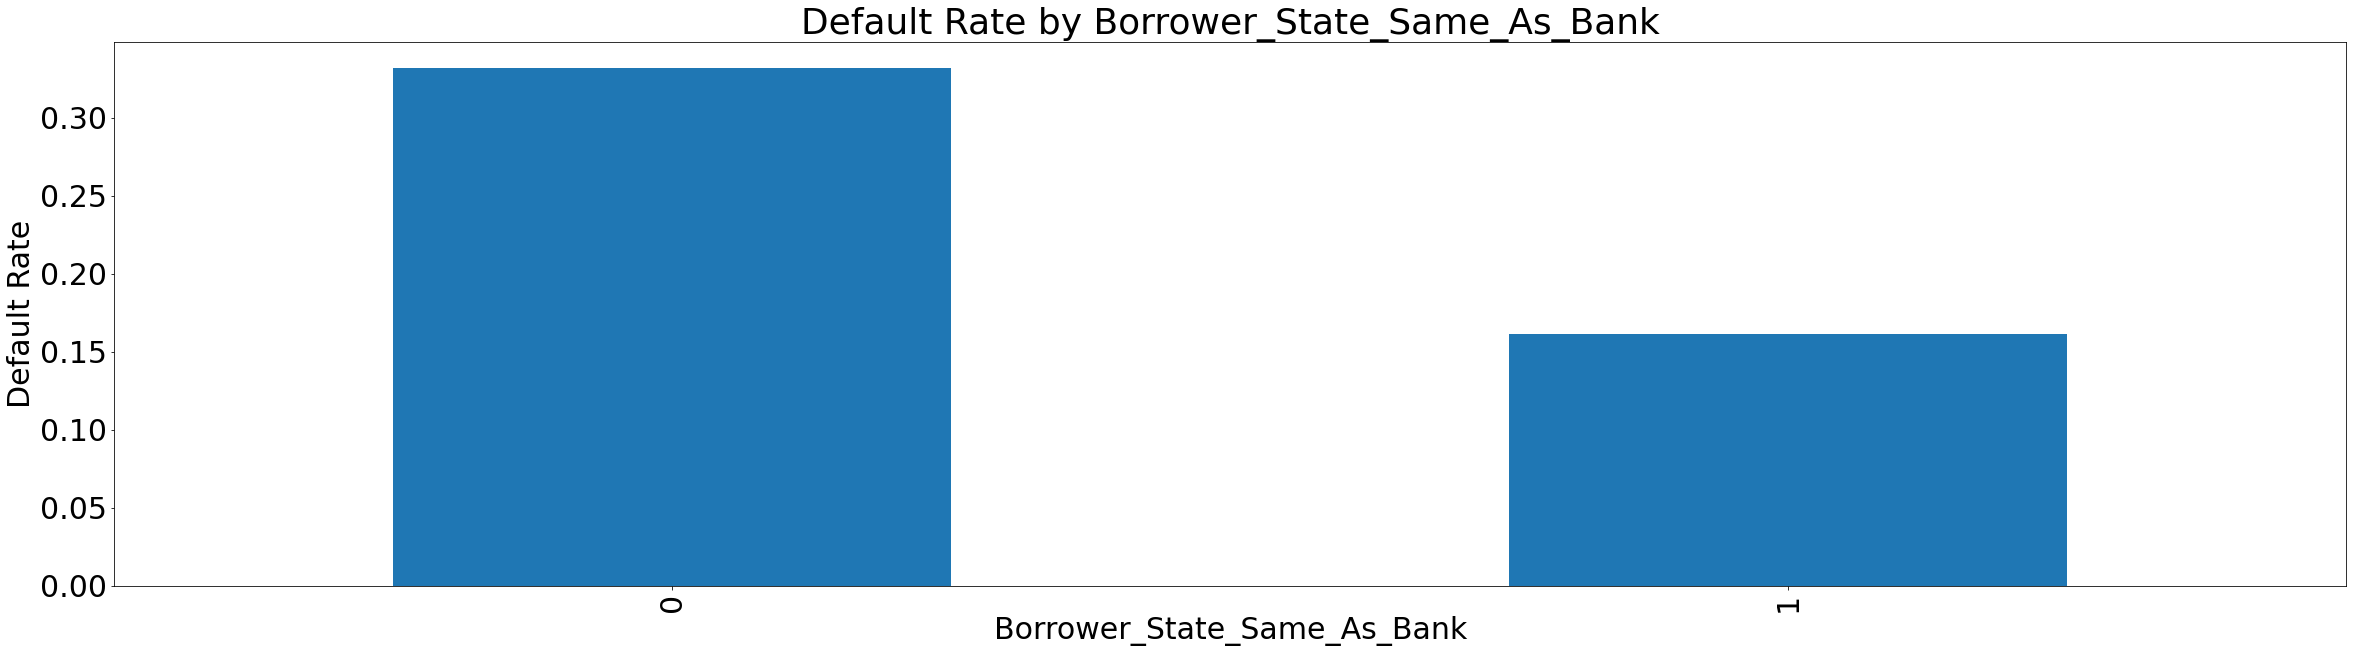

In [201]:
plot_default_rate(SBA_loan_data, 'Borrower_State_Same_As_Bank')

### NAICS Sector

Creating a table calculating the number of loans and number of defaults, grouped by NAICS Sector.

Plotting the default rate for whether the borrower is in the same state as their bank.

**Insights:** It appears that businesses in the real estate and rental industry are most likely to default followed by finance and insurance. The industry least likely to default is mining, quarying, and oil and gas. This sector's low default risk needs to be analyzed skeptically considering that the dataset's latest loan was in June 25, 2014, before the full effects of the 2014 oil crash were observed, of which started in June 20, 2014. Nonetheless, this graph does demonstrate that the industry sector does influence default risk, as different industries have unique challenges and advantages to operating their businesses.

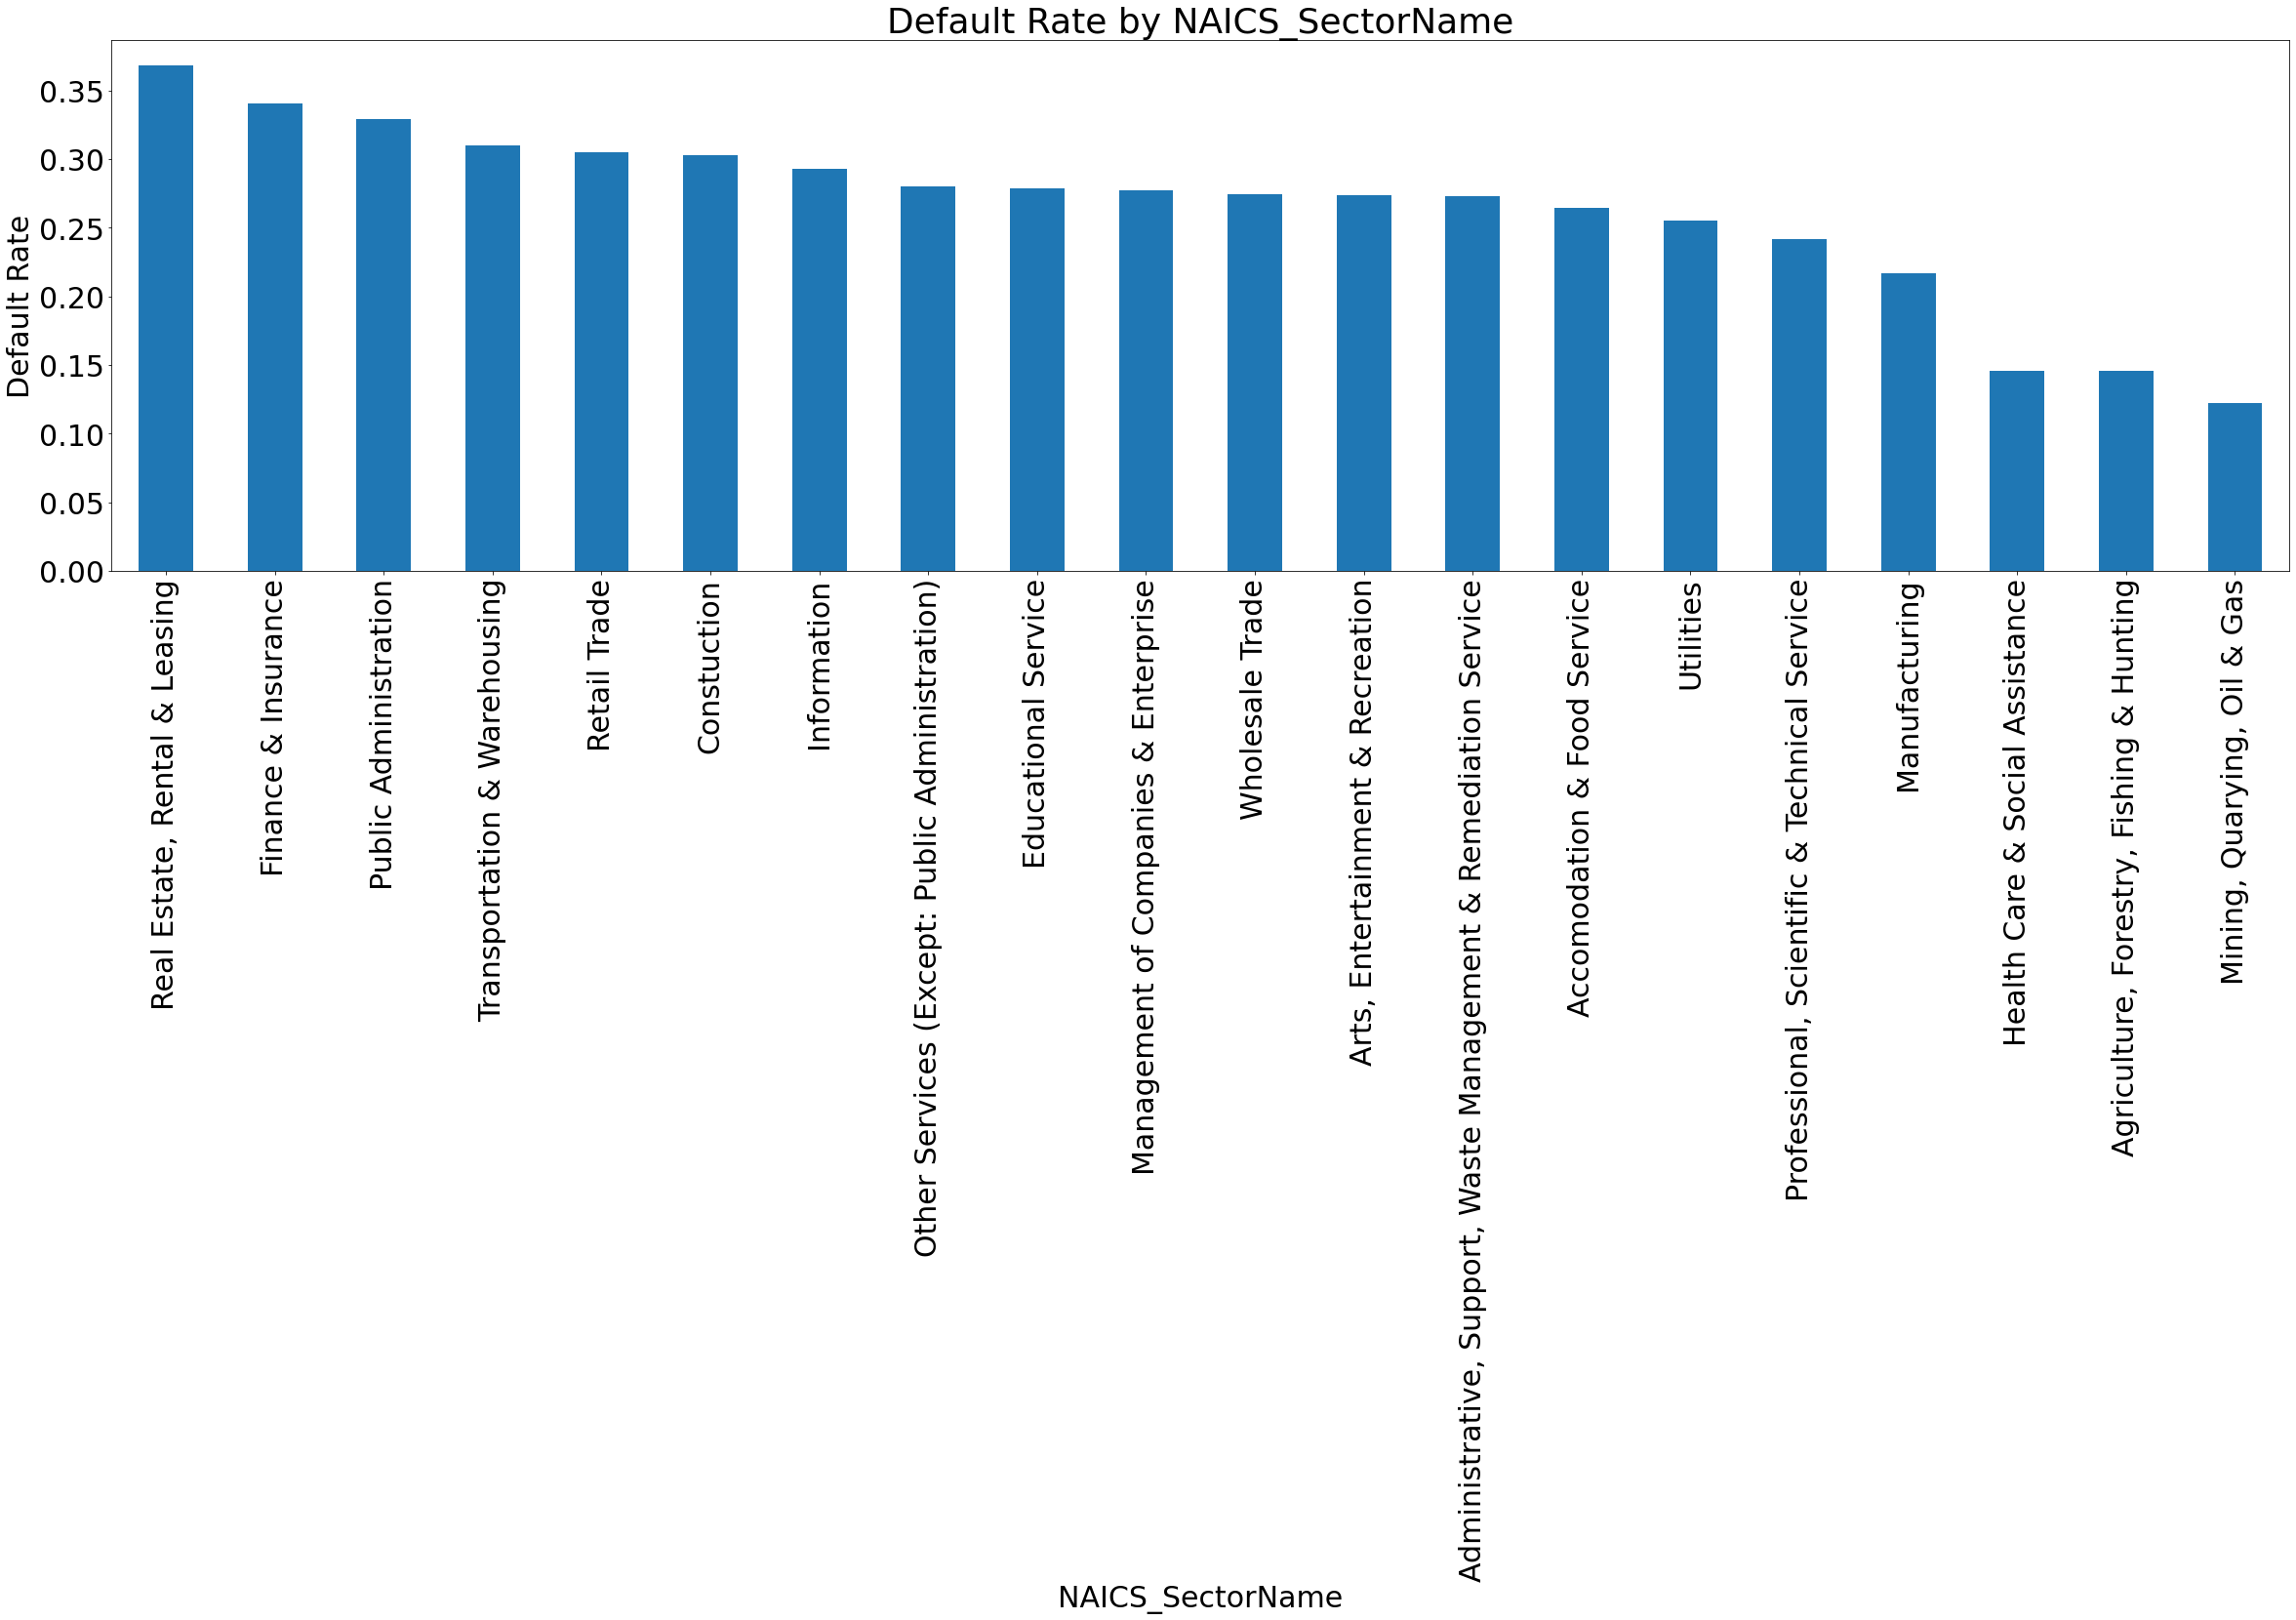

In [202]:
plot_default_rate(SBA_loan_data, 'NAICS_SectorName')

Finding the latest loan approval date in the dataset to determine whether this dataset was collected before the oil crash began on June 20, 2014. 

**Insights:** Given the most recent loan was approved only 5 days after the oil crash, it is highly unlikely the effects of the oil crash affected this dataset's default rates in the oil industry.

Source: https://www.bls.gov/opub/btn/volume-4/pdf/the-2014-plunge-in-import-petroleum-prices-what-happened.pdf

In [203]:
str(SBA_loan_data['ApprovalDate'].max())

'2014-06-25 00:00:00'

### Year

Creating a table calculating the number of loans and number of defaults, grouped by year.

Plotting a time series of default rate.

**Insights:** It appears that there was a peak in default rate in 2007 and 2008, likely due to the subprime mortgage crisis and the following great recession. Surprisingly, the two other local peaks are in 1998 and 1996, which are not defined as recession time periods according to Investopedia

Source: https://www.investopedia.com/articles/economics/08/past-recessions.asp

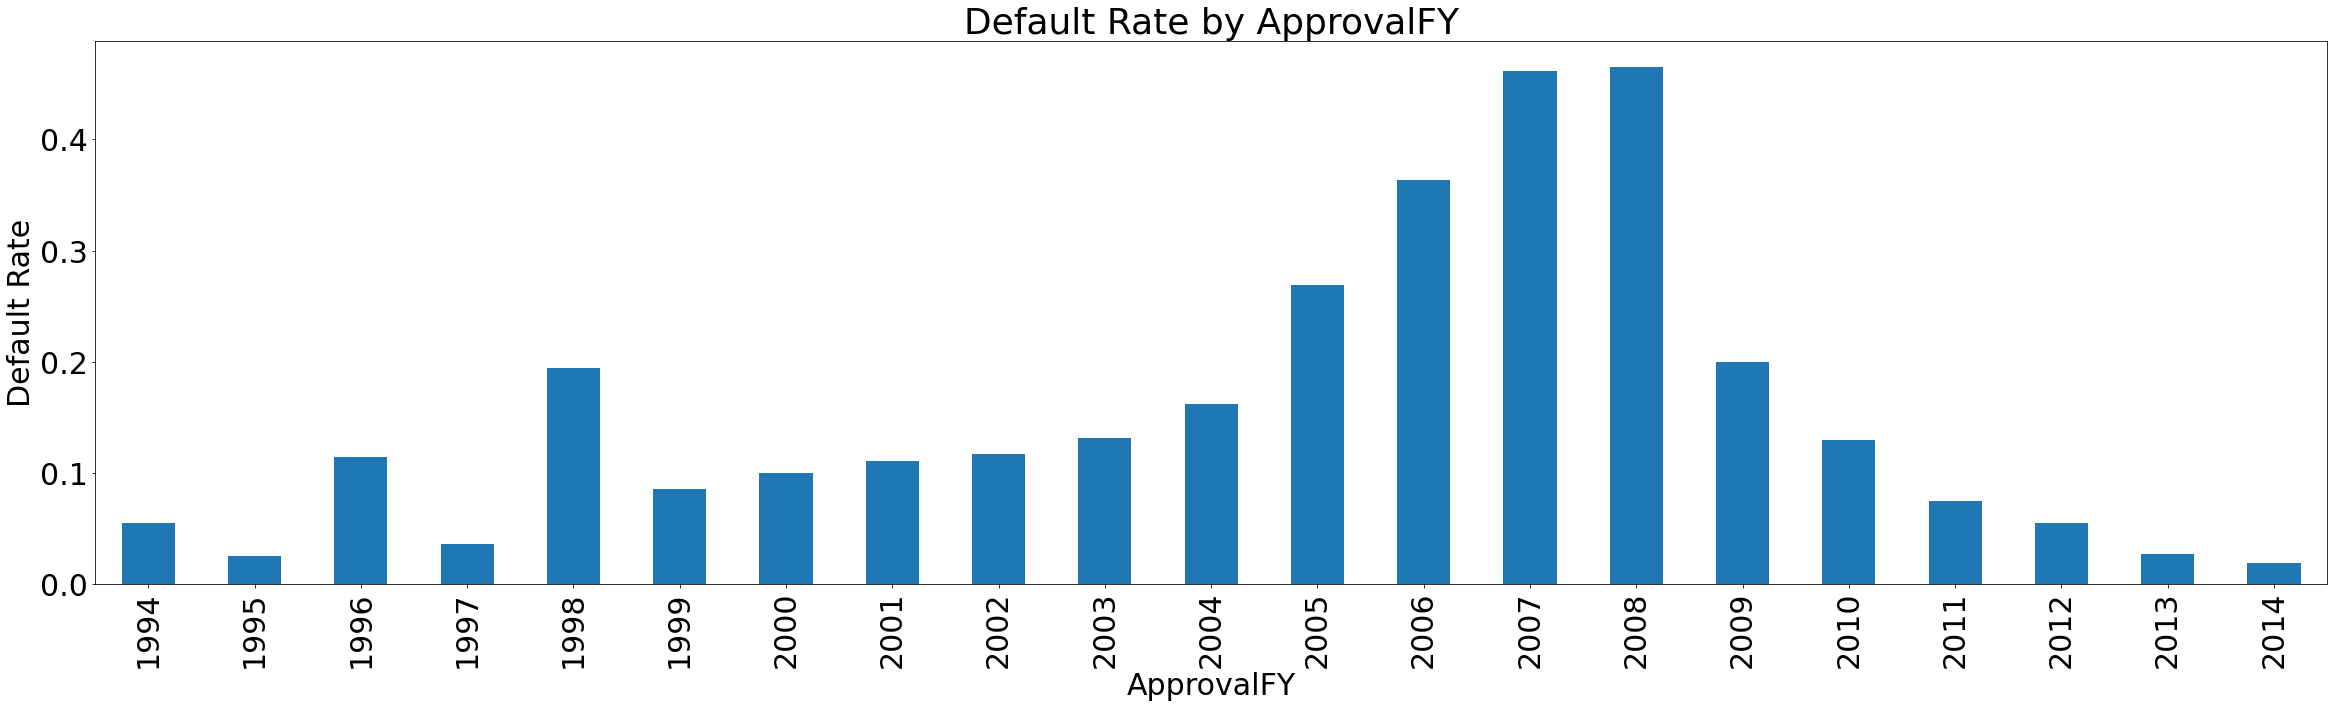

In [204]:
plot_default_rate(SBA_loan_data, 'ApprovalFY', False)

### Month

Plotting a time of year chart for default rate.

**Insights:** Default rate appears to be fairly consistent across the year.

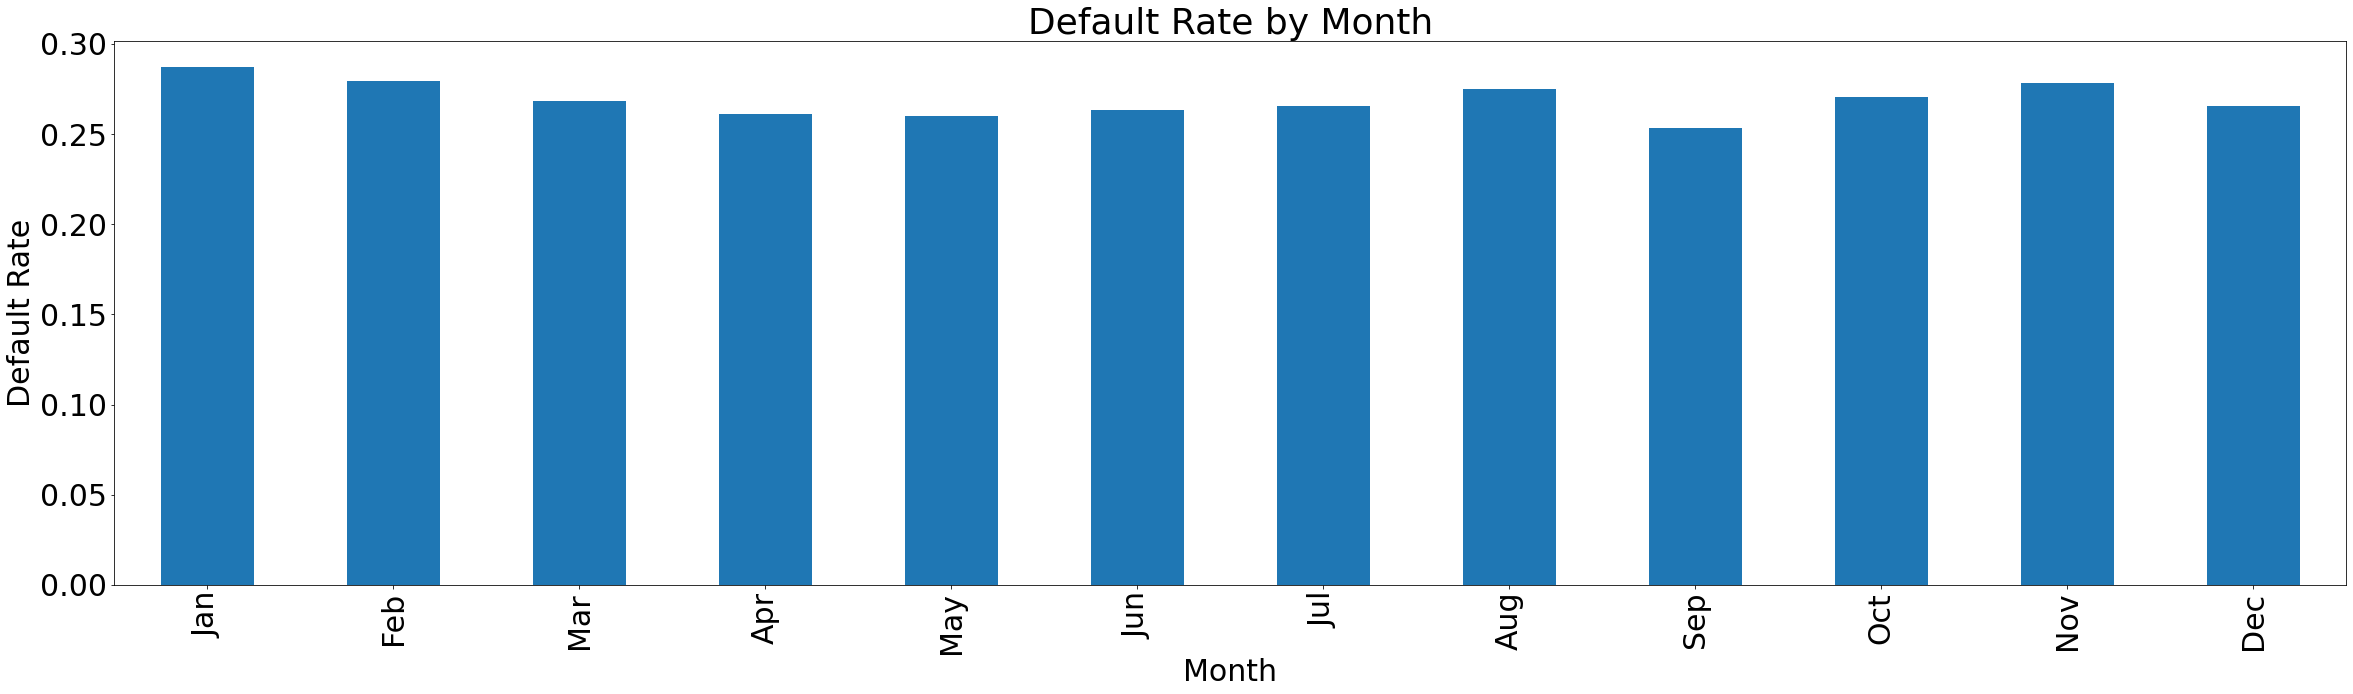

In [205]:
Loans_and_Defaults_by_Month=SBA_loan_data.groupby('Month')[['Month']]\
    .agg('count').rename(columns={'Month':'Number of Loans by Month'})\
.reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).join(
SBA_loan_data[SBA_loan_data['MIS_Status']==1].groupby('Month')[['Month']]\
    .agg('count').rename(columns={'Month':'Number of Defaults by Month'})\
.reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']), how='left'
)

Loans_and_Defaults_by_Month.head()

(Loans_and_Defaults_by_Month['Number of Defaults by Month']/\
 Loans_and_Defaults_by_Month['Number of Loans by Month'])\
.plot(kind='bar');
plt.title('Default Rate by Month');
plt.ylabel('Default Rate');

### Recession

Creating a table calculating the number of loans and number of defaults, based on whether the loan was approved during a recession.

Plotting a time of year chart for default rate.

**Insights:** Surprisingly, the default rate has not increased by very much even during the recession period. It is likely that there is another factor related to recessions that affects the loan default rate, given the large number of defaults in 2006 as seen in the yearly default rate analysis, before the great recession officially started.

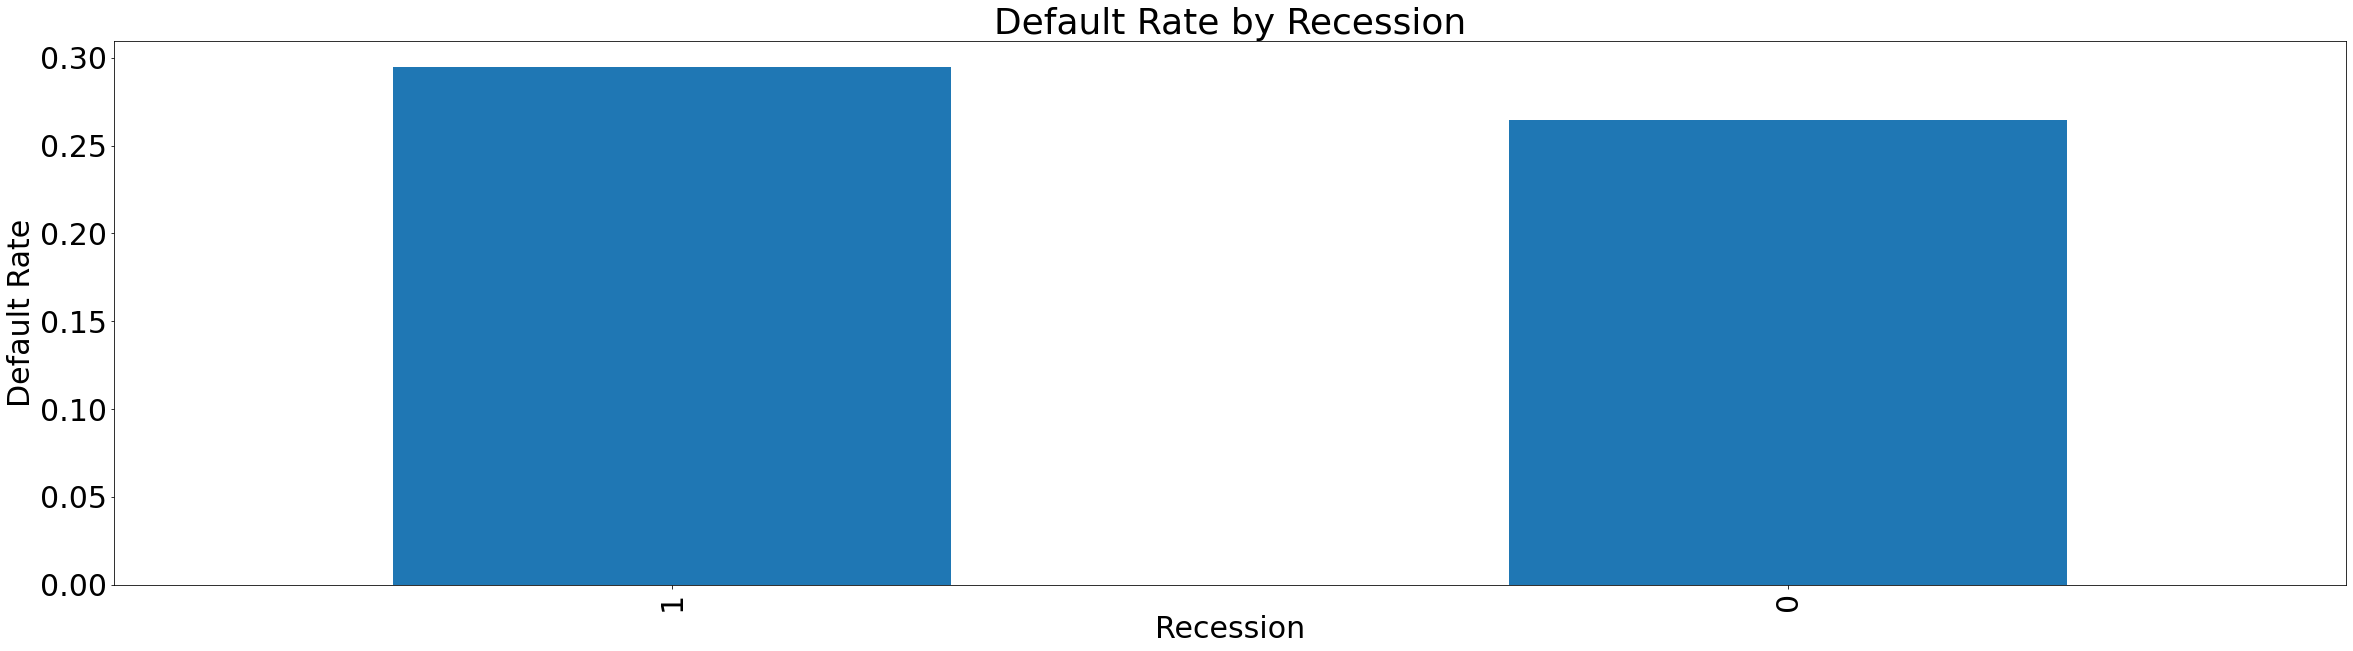

In [206]:
plot_default_rate(SBA_loan_data, 'Recession')

<a id='3.0'></a>
# 3.0 Machine Learning Modelling

Importing the necessary libraries for model development

In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import shap
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score

<a id='3.1'></a>
## 3.1 Metric Selection

**True Positives (TP):** A loan is predicted to default and it did default in reality

**True Negatives (TN):** A loan is predicted to not default and it did not default in reality

**False Positives (FP):** A loan is predicted to default when in fact it didn't. In this situation, the loan will be wrongfully denied. This is an issue because business and job opportunities are being unfairly taken away, which could result in a weaker economy.

**False Negatives (FN):** A loan is predicted to not default when in fact it did. This will be detrimental to all parties involved, such as the loss of money for the banks and SBA (depending on how much SBA guaranteed the loan), as well as a black mark on the credit score to the borrower company.

**Accuracy** A measure of percentage of correctly predicted outcomes in comparison to the true outcomes. Equation is (TP+TN)/(TP+TN+FP+FN).

**Precision (P)** A measure of false positives. Equation is TP/(TP+FP). A higher precision corresponds to a lower false positive rate. Thus, precision is very important if we are concerned with minimizing lost business and job opportunities.

**Recall (R)** A measure of false negatives.Equation is TP/(TP+FN). A higher recall corresponds to a lower false negative rate. Thus, recall is an very important if we are concerned with minimizing the detrimental effects of loan defaults.

**F1-score** A balance of the precision and recall metrics. Equation is 2PR/(P+R). An equation to use if neither precision nor recall are deemed as particularily more important than one another.

In our situation, it is difficult to quantify which metric (precision or recall) is more important. If I were in SBA or the borrower's shoes, I may be more inclined to weigh precision with higher importance, as SBA is aware of the fact that small businesses typically have challenges securing loans due to either an insufficient credit history, a lack of capital, or both. Given that SBA exists to support the growth of small businesses, SBA may value precision with higher importance.

However if I were the bank, I will be much more inclined to weigh recall with higher importance as the bank is primarily concerned with whether their borrower can actually pay off the loan. The bank is not nearly as concerned with helping small businesses prosper.

Because I do not belong to either of the three aforementioned parties, I am in a neutral stance. Thus, I believe that f1-score, a more neutral view of the problem, will be the most appropriate. Then accuracy will come secondly as accuracy can be misleading, especially with imbalanced datasets such as what we have seen in the EDA.

<a id='3.2'></a>
## 3.2 Feature Selection and Train, Test, Split

These are the features, based on the EDA conducted earlier, that I believe would be predictive of whether a loan will default or not. One of the features that I have not included in this list is the approval year. The reason is that I believe that features that aren't replicable are not very useful for the model. For instance, there will never be another loan in the future from 2012. Thus, the year cannot be reused again for unseen future data and thus will not be very useful for predictions in a real business setting.

In [208]:
features=['State', 
          'BankState',
          'Recession',
          'Term',
          'NoEmp',
          'CreateJob',
          'UrbanRural',
          'RevLineCr',
          'LowDoc',
          'DisbursementGross',
          'Month',
          'NAICS_SectorName',
          'Borrower_State_Same_As_Bank',
          'Percent_SBA_Guarantees',
          'Franchised_or_Not',
          'Time_Between_Approval_and_Disbursement (days)',
          'Is_New_Business',
          'Retention_Rate'
         ]

X=pd.get_dummies(SBA_loan_data[features], drop_first=True)

y=SBA_loan_data['MIS_Status']

Seeing what the columns will look like

In [209]:
list(X.columns)

['Recession',
 'Term',
 'NoEmp',
 'CreateJob',
 'UrbanRural',
 'RevLineCr',
 'LowDoc',
 'DisbursementGross',
 'Borrower_State_Same_As_Bank',
 'Percent_SBA_Guarantees',
 'Franchised_or_Not',
 'Time_Between_Approval_and_Disbursement (days)',
 'Is_New_Business',
 'Retention_Rate',
 'State_AL',
 'State_AR',
 'State_AZ',
 'State_CA',
 'State_CO',
 'State_CT',
 'State_DC',
 'State_DE',
 'State_FL',
 'State_GA',
 'State_HI',
 'State_IA',
 'State_ID',
 'State_IL',
 'State_IN',
 'State_KS',
 'State_KY',
 'State_LA',
 'State_MA',
 'State_MD',
 'State_ME',
 'State_MI',
 'State_MN',
 'State_MO',
 'State_MS',
 'State_MT',
 'State_NC',
 'State_ND',
 'State_NE',
 'State_NH',
 'State_NJ',
 'State_NM',
 'State_NV',
 'State_NY',
 'State_OH',
 'State_OK',
 'State_OR',
 'State_PA',
 'State_RI',
 'State_SC',
 'State_SD',
 'State_TN',
 'State_TX',
 'State_UT',
 'State_VA',
 'State_VT',
 'State_WA',
 'State_WI',
 'State_WV',
 'State_WY',
 'BankState_AL',
 'BankState_AN',
 'BankState_AR',
 'BankState_AZ',
 'B

In [210]:
def remove_multicollinearity_and_unimportant_features(X, y, multicol_threshold, corr_with_label=0):
    
    X_and_y=X.copy()
    
    # Finding correlations between predictor and outputs and sorting from most to least correlated
    X_and_y['label']=y
    X_corr_with_predictor=X_and_y.corr().abs()['label']
    X_corr_with_predictor=X_corr_with_predictor.sort_values(ascending=False)
    
    # Removing variables that do not have an absolute correlation with the label above a defined threshold 
    # (default is set to 0). This step is to remove unimportant/irrelevant features to speed up computation speed
    X_corr_with_predictor=X_corr_with_predictor[X_corr_with_predictor>=corr_with_label]
    
    # Dropping the label so that the label does not end up in the predictor variables
    X_corr_with_predictor.drop(index=['label'], inplace=True)
    X_and_y.drop(columns=['label'], inplace=True)
    
    # Reshuffling predictor columns based on most to least correlated with output variable so that when dropping features
    # with high multicollinearity, we don't end up dropping the more important feature.
    X_reshuffled=X_and_y.loc[:,X_corr_with_predictor.index]

    # Create correlation matrix
    corr_matrix = X_reshuffled.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find features with correlation greater than threshold
    to_drop = [column for column in upper.columns if any(upper[column] > multicol_threshold)]
    print(f'To drop columns are {to_drop}')
    
    # Drop features 
    X_reshuffled.drop(to_drop, axis=1, inplace=True)
    
    return X_reshuffled

In [211]:
multicol_threshold=0.7 # The absolute value of 0.7 is the cutoff for a strong linear relationship
corr_with_label=0.05 # Only return features that have an absolute correlation with the label of at least a certain value
X_no_multicollinearity=remove_multicollinearity_and_unimportant_features(X, y, multicol_threshold, corr_with_label)
X_no_multicollinearity.head(2)

To drop columns are []


`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


,Term,Borrower_State_Same_As_Bank,Time_Between_Approval_and_Disbursement (days),DisbursementGross,BankState_VA,Retention_Rate,NAICS_SectorName_Health Care & Social Assistance,BankState_CA,Percent_SBA_Guarantees,UrbanRural,State_CA,State_FL
12,162,0,52.0,253400.0,0,0.0,0,0,0.75,0.0,0,0
24,126,0,82.0,137300.0,0,0.0,0,0,0.85,0.0,0,0


Creating train test split

In [212]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_no_multicollinearity, y, test_size=0.20, random_state=42)

<a id='3.3'></a>
## 3.3 Model Development

I have decided to developed various models for binary dependent variables (in our case predicting whether a loan will default). The models I developed were logistic regression and decision tree classifiers. KNN was avoided as the large number of rows and columns will mean KNN will take a very long time to converge. The same reason is also why I did not use SVMs. As for ensembling methods, I used random forests and xgboost due to how commonly these two ensembling techniques (bagging and boosting) are used in industry respectively. Finally, I used a neural network to determine if it can improve model performance further.

<a id='3.3.1'></a>
### 3.3.1 Logistic Regression

Running a logistic regression model, a commonly used regression based model for binary outcomes.

Using Grid Search for Hyperparameter Tuning. Setting up model, hyperparameters, and Pipeline for **Logistic Regression**

**Important Note 1:** These hyperparameters were chosen based on researching ideas online, such as Stack Overflow and other articles. Being cautious of the time it would take to run the gridsearch cv algorithm, only a few hyperparmeters were chosen to prevent the model from taking too long to run.

**Insights:** I have experimented with running the Logistic Regression model both using and **not using** random oversampling. I have found that although accuracy increases by roughly 3% without oversampling, the f1 score drops by nearly 5%. Because the drop in the f1 score is higher than the increase in the accuracy score, I believe that using Random Oversampler will improve the model performance.

In [213]:
LR_model=LogisticRegression(n_jobs=-1)

pipe = Pipeline([
    ('scaler', RobustScaler()), # Feature scaling enables more accurate coefficients for logistic regression models
    ('ROS', RandomOverSampler(random_state=42)),
    ('model', LR_model)
])

parameters = {
    'model__max_iter': [50,100,200],
    'model__C': [1,0.1,0.01]
}


Running the grid search algorithm based on the pipeline and model hyperparameters we set up

**Important Note:** For this problem, as the dataset is imbalanced, I am interested in optimizing the f1, rather than the accuracy score.

In [214]:
gs = GridSearchCV(pipe, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=2)

gs.fit(X_train_full, y_train_full)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('ROS',
                                        RandomOverSampler(random_state=42)),
                                       ('model',
                                        LogisticRegression(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'model__C': [1, 0.1, 0.01],
                         'model__max_iter': [50, 100, 200]},
             scoring='f1', verbose=2)

Getting the optimal hyperparameters for this model and problem

In [215]:
gs.best_params_

{'model__C': 0.01, 'model__max_iter': 50}

Printing model performance for all the hyperparameters combinations in the grid search. Used to understand trends in model performance given different combinations of hyperparameters.

In [274]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.415400,0.088160,0.081241,0.006250,1,50,"{'model__C': 1, 'model__max_iter': 50}",0.672892,0.673166,0.673926,0.671118,0.676604,0.673541,0.001787,7
1,3.618507,0.272701,0.078123,0.009880,1,100,"{'model__C': 1, 'model__max_iter': 100}",0.672892,0.673166,0.673926,0.671118,0.676604,0.673541,0.001787,7
2,3.905987,0.108695,0.081249,0.006248,1,200,"{'model__C': 1, 'model__max_iter': 200}",0.672892,0.673166,0.673926,0.671118,0.676604,0.673541,0.001787,7
3,3.590383,0.158842,0.081244,0.006249,0.1,50,"{'model__C': 0.1, 'model__max_iter': 50}",0.673207,0.673332,0.674074,0.671118,0.676960,0.673738,0.001887,4
4,3.539905,0.154329,0.078121,0.000004,0.1,100,"{'model__C': 0.1, 'model__max_iter': 100}",0.673207,0.673332,0.674074,0.671118,0.676960,0.673738,0.001887,4
5,3.500482,0.131984,0.081246,0.006248,0.1,200,"{'model__C': 0.1, 'model__max_iter': 200}",0.673207,0.673332,0.674074,0.671118,0.676960,0.673738,0.001887,4
6,3.401933,0.093686,0.084371,0.007652,0.01,50,"{'model__C': 0.01, 'model__max_iter': 50}",0.675141,0.674467,0.676028,0.673857,0.678859,0.675670,0.001750,1
7,3.365399,0.099602,0.074996,0.006248,0.01,100,"{'model__C': 0.01, 'model__max_iter': 100}",0.675141,0.674467,0.676028,0.673857,0.678859,0.675670,0.001750,1
8,2.465467,0.138135,0.043745,0.011696,0.01,200,"{'model__C': 0.01, 'model__max_iter': 200}",0.675141,0.674467,0.676028,0.673857,0.678859,0.675670,0.001750,1


Creating a final model based on grid search's best parameters. Then we generate the predicted y values for the test set.

In [216]:
LR_model=LogisticRegression(C=gs.best_params_['model__C'], 
                         max_iter=gs.best_params_['model__max_iter'],
                        n_jobs=-1)

# Feature scaling (necessary for logistic regression algorithms)
scaler = RobustScaler() # Robust scaler is used as we have observed in the EDA that there are severe outliers in the dataset
scaler.fit(X_train_full)
scaled_X_train_full = scaler.transform(X_train_full)
scaled_X_test = scaler.transform(X_test)

# Running the model with random oversampling
ros = RandomOverSampler()
X_resampled_scaled_full, y_resampled_full = ros.fit_resample(scaled_X_train_full, y_train_full)
LR_model.fit(X_resampled_scaled_full, y_resampled_full)

y_pred=LR_model.predict(scaled_X_test)

Calculating Final Test Scores (seeing if overfitting)

**Insights:** The f1 and accuracy score are not stellar, but still decent. However, the precision score is of concern given that 42 out of 100 loans will be miscorrectly predicted to default when in fact they will not. This will negatively affect 4 businesses for every 10 loan applications as these businesses will be wrongfully denied of the loan opportunity.

In [217]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9191    0.7804    0.8441     50868
           1     0.5787    0.8145    0.6766     18840

    accuracy                         0.7896     69708
   macro avg     0.7489    0.7974    0.7604     69708
weighted avg     0.8271    0.7896    0.7988     69708



<a id='3.3.2'></a>
### 3.3.2 Decision Tree Classifier

Running a decision tree classifier, a commonly used tree based model to see if we can improve the precision, recall, and f1 score, as the logistic regression model did not perform that well.

Grid Search Hyperparameter Tuning. Setting up model, hyperparameters, and Pipeline for **Decision Tree**

**Important Note:** Tree based models are insensitive to scaling, hence feature scaling is not necessary for the pipeline and model

**Insights:** The decision tree performs better without random oversampling, with both the f1 and accuracy score performing nearly 0.5% better than if oversampling were used.

In [277]:
DT_model=DecisionTreeClassifier()

pipe = Pipeline([ 
    ('model', DT_model)
])

parameters = {
    'model__max_depth':  [5,10,15,20],
    'model__min_samples_split': [2,5,10]
}

Running the grid search algorithm based on the pipeline and model hyperparameters we set up

**Important Note:** For this problem, as the dataset is imbalanced, I am interested in optimizing the f1, rather than the accuracy score.

In [278]:
gs = GridSearchCV(pipe, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=2)

gs.fit(X_train_full, y_train_full)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [5, 10, 15, 20],
                         'model__min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=2)

Getting the optimal hyperparameters for this model and problem

In [279]:
gs.best_params_

{'model__max_depth': 15, 'model__min_samples_split': 10}

Printing model performance for all the hyperparameters combinations in the grid search. Used to understand trends in model performance given different combinations of hyperparameters.

In [280]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.121332,0.197627,0.074332,0.022974,5,2,"{'model__max_depth': 5, 'model__min_samples_sp...",0.801986,0.791828,0.792216,0.787568,0.801426,0.795005,0.005712,10
1,1.047352,0.042378,0.062563,0.009387,5,5,"{'model__max_depth': 5, 'model__min_samples_sp...",0.801986,0.791828,0.792216,0.787568,0.801426,0.795005,0.005712,10
2,1.093546,0.035645,0.055681,0.006049,5,10,"{'model__max_depth': 5, 'model__min_samples_sp...",0.801986,0.791828,0.792216,0.787568,0.801426,0.795005,0.005712,10
3,1.693593,0.032935,0.053125,0.007652,10,2,"{'model__max_depth': 10, 'model__min_samples_s...",0.867482,0.869421,0.868533,0.854716,0.864401,0.864911,0.005372,4
4,1.677265,0.030011,0.062497,0.000005,10,5,"{'model__max_depth': 10, 'model__min_samples_s...",0.867182,0.869254,0.868613,0.854724,0.864383,0.864831,0.005325,5
5,1.756174,0.055621,0.057083,0.008810,10,10,"{'model__max_depth': 10, 'model__min_samples_s...",0.867551,0.869289,0.868454,0.854769,0.864657,0.864944,0.005322,3
6,2.241088,0.065996,0.060896,0.010386,15,2,"{'model__max_depth': 15, 'model__min_samples_s...",0.865221,0.866391,0.866086,0.861000,0.863647,0.864469,0.001979,6
7,2.167789,0.050004,0.063790,0.010215,15,5,"{'model__max_depth': 15, 'model__min_samples_s...",0.865659,0.866930,0.866472,0.861654,0.865493,0.865242,0.001869,2
8,2.126502,0.036543,0.069966,0.017341,15,10,"{'model__max_depth': 15, 'model__min_samples_s...",0.867488,0.868233,0.867052,0.862288,0.866745,0.866361,0.002097,1
9,2.392409,0.027803,0.063740,0.002485,20,2,"{'model__max_depth': 20, 'model__min_samples_s...",0.846115,0.848029,0.849377,0.845546,0.847215,0.847256,0.001365,9


Creating a final model based on grid search's best parameters. Then we generate the predicted y values for the test set.

In [281]:
DT_model=DecisionTreeClassifier(max_depth=gs.best_params_['model__max_depth'],
                             min_samples_split=gs.best_params_['model__min_samples_split'])

# Without random oversampling
DT_model.fit(X_train_full, y_train_full)

y_pred=DT_model.predict(X_test)

Calculating Final Test Scores (seeing if overfitting)

**Insights:** All the scores (precision, recall, f1, and accuracy) perform much better than the logistic regression algorithm. This suggests that this particular problem may be better suited to tree algorithms.

In [283]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9530    0.9529    0.9529     50868
           1     0.8728    0.8730    0.8729     18840

    accuracy                         0.9313     69708
   macro avg     0.9129    0.9130    0.9129     69708
weighted avg     0.9313    0.9313    0.9313     69708



<a id='3.3.3'></a>
### 3.3.3 Random Forest Classifier

Running a random forest classifier, a commonly used bagging ensembling technique to see if we can improve the precision, recall, and f1 score even further.

First, we set up the code so that we can use grid search to hyperparameter tune. 

**Insights:** Random forest performs better with random oversampling, with an improvement of around 1% in the f1 score and 0.25% in the accuracy.

**Important Note:** Hyperparameter tuning for random forests could take a while to run as it is building 100X2X5=1000 different decision trees (100 estimators) X (2 hyperparameters) X (5 folds for cross validation). 

In [284]:
RF_model=RandomForestClassifier(n_jobs=-1)

pipe = Pipeline([
    ('ROS', RandomOverSampler(random_state=42)), 
    ('model', RF_model)
])

parameters = {
    'model__max_features': ['auto','log2']
}

Running the grid search algorithm based on the pipeline and model hyperparameters we set up

**Important Note:** For this problem, as the dataset is imbalanced, I am interested in optimizing the f1, rather than the accuracy score.

In [285]:
gs = GridSearchCV(pipe, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=2)

gs.fit(X_train_full, y_train_full)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ROS',
                                        RandomOverSampler(random_state=42)),
                                       ('model',
                                        RandomForestClassifier(n_jobs=-1))]),
             n_jobs=-1, param_grid={'model__max_features': ['auto', 'log2']},
             scoring='f1', verbose=2)

Identifying the best hyperparameters

In [286]:
gs.best_params_

{'model__max_features': 'log2'}

Printing out the grid search results to see the variations in performance given different hyperparameters

In [287]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,125.411901,0.260675,3.168536,0.082321,auto,{'model__max_features': 'auto'},0.864309,0.865106,0.867074,0.864591,0.865073,0.865231,0.000969,2
1,90.233959,46.340032,1.478027,0.799641,log2,{'model__max_features': 'log2'},0.864802,0.865108,0.868987,0.864790,0.865328,0.865803,0.001604,1


Creating a final model based on grid search's best parameters. Then we generate the predicted y values for the test set.

In [288]:
RF_model=RandomForestClassifier(max_features=gs.best_params_['model__max_features'],
                             n_jobs=-1)

# With random oversampling
ros = RandomOverSampler()
X_resampled_full, y_resampled_full = ros.fit_resample(X_train_full, y_train_full)
RF_model.fit(X_resampled_full, y_resampled_full)

y_pred=RF_model.predict(X_test)

**Insights:** The random forest algorithm performs similarly to the decision tree. f1-score and accuracy is slightly lower for the random forest in comparison to the decision tree.

In [289]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9543    0.9482    0.9513     50868
           1     0.8626    0.8774    0.8700     18840

    accuracy                         0.9291     69708
   macro avg     0.9085    0.9128    0.9106     69708
weighted avg     0.9295    0.9291    0.9293     69708



<a id='3.3.4'></a>
### 3.3.4 XGBoost

Running an XGBoost model, a commonly used boosting ensembling technique, to see if we can improve the precision, recall, and f1 score even further.

Using Cross Validation to run XGBClassifier to ensure that the good score we observed is not a fluke.

**Important Note:** Given that the vanilla XGBClassifier model performs very well already, there's no need to hyperparameter tune with grid search.

**Insights:** Given that XGBoost algorithm performs better without random oversampling (ROS), with slightly higher f1 and accuracy scores as compared to with ROS. It was found that without ROS, the precision score performs better than with (roughly 5% better), the recall score is worse (roughly 4.5% worse). However, because f1 and accuracy score were both higher, I believe without ROS is the better option for this algorithm to address this specific problem.

In [290]:
XGBoost_model = XGBClassifier(n_jobs=-1)
xgb_f1_scores=cross_val_score(XGBoost_model, X_train_full, y_train_full, cv=5, scoring="f1", n_jobs=-1)

**Insights:** XGBClassifier performs extraordinarily well regardless of the data being used as all 5 k-folds have very high f1_scores.

In [291]:
print(f'f1 scores for 5 fold cross validation is {xgb_f1_scores}')
print(f'Mean cross validation score is {round(xgb_f1_scores.mean(),4)}')

f1 scores for 5 fold cross validation is [0.88674843 0.8876663  0.88602524 0.88637577 0.88283652]
Mean cross validation score is 0.8859


Creating a final model. Then we generate the predicted y values for the test set.

In [292]:
XGBoost_model = XGBClassifier(n_jobs=-1)

# Without random oversampling
XGBoost_model.fit(X_train_full, y_train_full)

y_pred=XGBoost_model.predict(X_test)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[14:59:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBoost, in comparison to the other 4 models we have tried, is by far the best in terms of f1 score and accuracy.

In [293]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9602    0.9580    0.9591     50868
           1     0.8873    0.8927    0.8900     18840

    accuracy                         0.9403     69708
   macro avg     0.9237    0.9253    0.9245     69708
weighted avg     0.9405    0.9403    0.9404     69708



<a id='3.3.5'></a>
### 3.3.5 Neural Networks

Using neural networks, another method to predict binary outcomes, to see if we can improve the precision, recall, and f1 score even further.

Installing the libraries for the neural network architecture and model. Only run the !pip install tensorflow if you haven't had tensorflow installed yet. It takes quite a long time to install.

In [294]:
#!pip install tensorflow

In [295]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation#, Conv2D, MaxPooling2D, AveragePooling2D
# from sklearn.neural_network import MLPClassifier

Preparing the data for the model. 

**Insights:** It has been found that not random oversampling has improved the model's accuracy by roughly 0.75%.

In [296]:
# Feature scaling (important for neural networks as it enables faster convergence as well as treating each variable equally)
scaler = RobustScaler() # Robust scaler is used as we have found outlier values during EDA.
scaler.fit(X_train_full)
scaled_X_train_full = scaler.transform(X_train_full)
scaled_X_test = scaler.transform(X_test)

Creating the model architecture for the deep learning model.

**Important Note:** I have used a relu activation functions for the layers as I have found that has improved model performance. I have also created two hidden layers of 50 units each so that the model can learn from the various patterns in the dataset's features. I have used dropout regularization to address potential overfitting issues. The output variable is binary, hence a dense layer with 1 unit using the sigmoid activation function.

In [297]:
NN_model = Sequential()
NN_model.add(Dense(50, input_shape=(X_train_full.shape[1],), activation='relu'))
NN_model.add(Dropout(0.5))
NN_model.add(Dense(50, activation='relu'))
NN_model.add(Dropout(0.5))
NN_model.add(Dense(1, activation='sigmoid'))

**Important Note:** I have used the binary crossentropy loss function as our output is binary (whether the loan defaults or not). I have used the adam optimizer to speed up the algorithm. Finally, I have used the accuracy metric as the f-beta metrics appear to have been scrapped.

In [298]:
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Running the model.

**Important Note:** I have decided to use 50 epochs using mini batch gradient descent. The reason I chose the particular batch size is that it is a power of 2. I decided not to use SGD because the model may be very noisy and unstable during the convergence process, which could affect the model interpretation and accuracy of the accuracy score. At the same time, I did not use batch gradient descent because it would take a very long time for the model to converge to the minima when nearly 280000 data points are used.

In [299]:
# Without random oversampling
history = NN_model.fit(scaled_X_train_full, 
                    y_train_full, 
                    epochs=50,
                    validation_data=(scaled_X_test, y_test), 
                    batch_size=2048,
                   workers=-1)

# Generating predictions
y_pred=NN_model.predict(scaled_X_test)
y_pred=pd.Series(y_pred[:,0]).apply(lambda x: 1 if x>0.5 else 0)

Epoch 1/50
137/137 [==============================] - 1s 5ms/step - loss: 0.5415 - accuracy: 0.7513 - val_loss: 0.4080 - val_accuracy: 0.8292
Epoch 2/50
137/137 [==============================] - 1s 5ms/step - loss: 0.4208 - accuracy: 0.8190 - val_loss: 0.3719 - val_accuracy: 0.8385
Epoch 3/50
137/137 [==============================] - 1s 4ms/step - loss: 0.3943 - accuracy: 0.8311 - val_loss: 0.3594 - val_accuracy: 0.8425
Epoch 4/50
137/137 [==============================] - 1s 5ms/step - loss: 0.3822 - accuracy: 0.8348 - val_loss: 0.3520 - val_accuracy: 0.8439
Epoch 5/50
137/137 [==============================] - 1s 4ms/step - loss: 0.3730 - accuracy: 0.8373 - val_loss: 0.3449 - val_accuracy: 0.8464
Epoch 6/50
137/137 [==============================] - 1s 4ms/step - loss: 0.3655 - accuracy: 0.8392 - val_loss: 0.3412 - val_accuracy: 0.8487
Epoch 7/50
137/137 [==============================] - 1s 4ms/step - loss: 0.3597 - accuracy: 0.8420 - val_loss: 0.3361 - val_accuracy: 0.8493
Epoch 

Calculating Final Test Scores (seeing if overfitting)

**Insights:** Accuracy and f1 score are not bad, performing better than the logistic regression, but underperforms compared to the tree algorithms (decision tree, random forest, XGBoost)

In [300]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8717    0.9449    0.9068     50868
           1     0.8076    0.6246    0.7044     18840

    accuracy                         0.8583     69708
   macro avg     0.8397    0.7847    0.8056     69708
weighted avg     0.8544    0.8583    0.8521     69708



<a id='3.4'></a>
## 3.4 Model Selection

Based on our findings, XGBoost is the best performing model with regards to the f1_score and the accuracy. Thus, we will proceed with this model for the model interpretation.

<a id='3.5'></a>
## 3.5 Model Interpretation for XGBoost

Obtaining the feature importances for the model

**Insights:** The two most important features are whether the borrower is in the same state as bank and the term duration. 

**Term Length:** The term length is the most important feature. This is not too surprising because one of SBA's major objectives is to extend the loan duration so that companies can pay off their loans in a reasonable time frame. A major contribution for loan defaults could be having to pay off a very high loan amount in a short period of time. Most companies struggle with capital and cash flow and may not have the means/capability to pay off soo much money in a tight timeframe. Extending the term length could help a lot with improving the success of paying off loans.

**Same State as Bank:** Having the company in the same state as the bank could impact loan default rates as this is a measure of ease of communication, a crucial factor in doing business that could make or break a company's financial performance. 

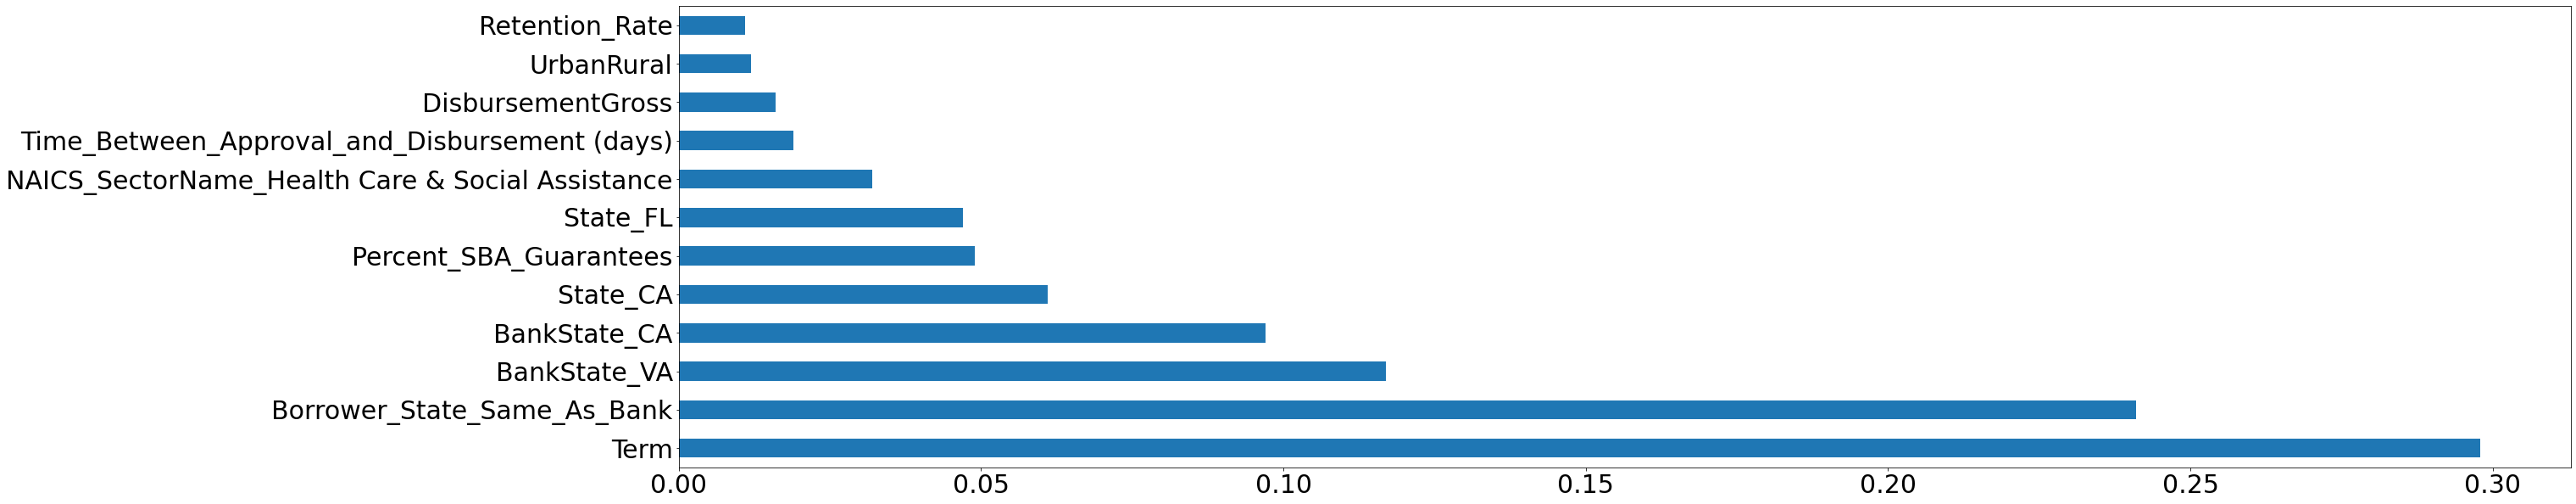

In [301]:
pd.Series(np.around(XGBoost_model.feature_importances_, decimals=3), index=X_train_full.columns).sort_values(ascending=False)[:20]\
.plot(kind='barh');

Using SHAP Library for Enriched Model Interpretation

Using a summary plot to understand the overall impact of each feature

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


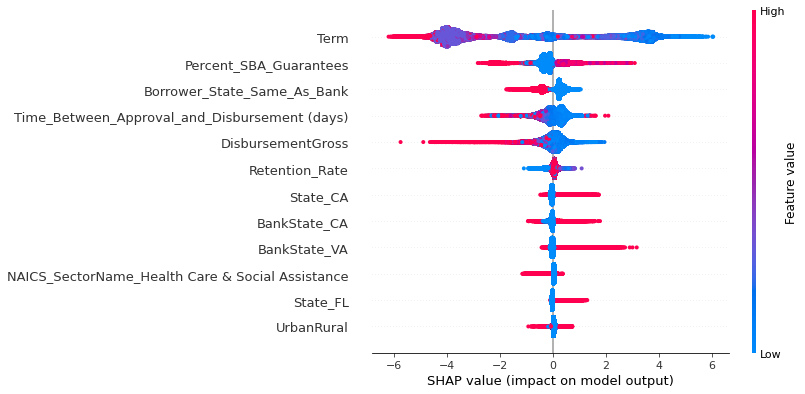

In [302]:
shap.initjs()
explainer = shap.TreeExplainer(XGBoost_model, feature_perturbation = "tree_path_dependent")
shap_values = explainer.shap_values(X_train_full)
shap.summary_plot(shap_values, X_train_full, feature_names=X_train_full.columns)

Analyzing each feature in more detail

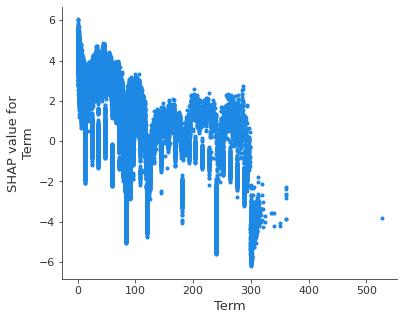

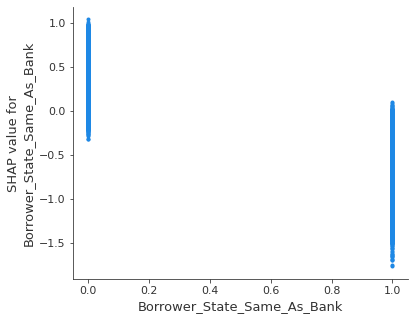

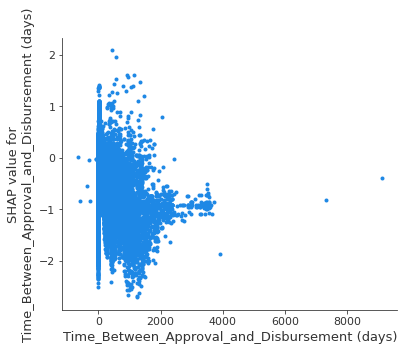

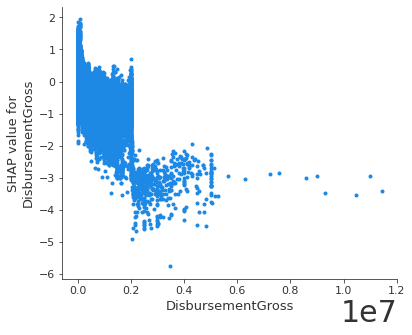

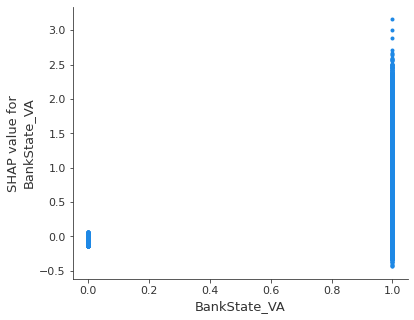

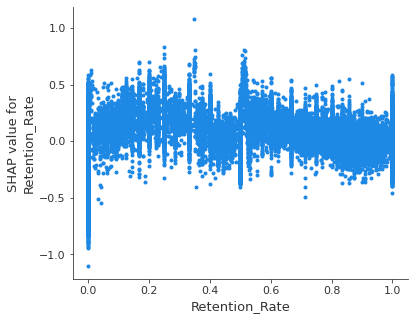

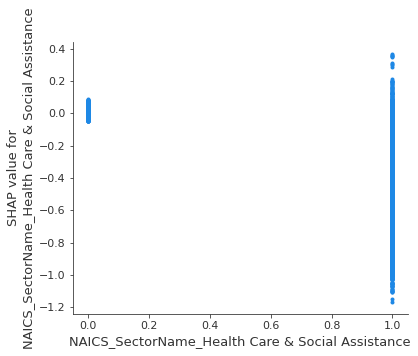

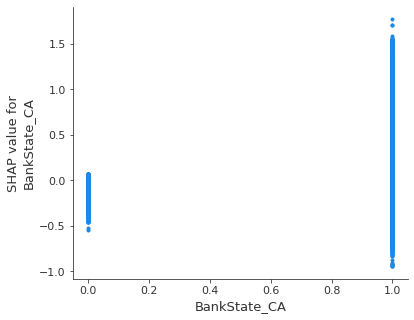

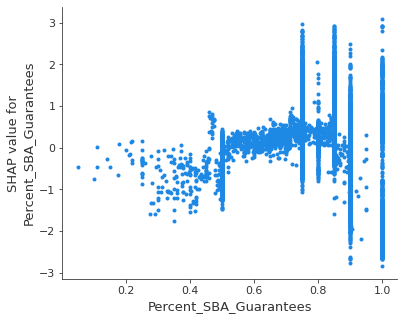

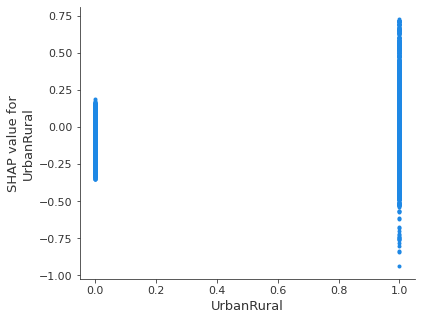

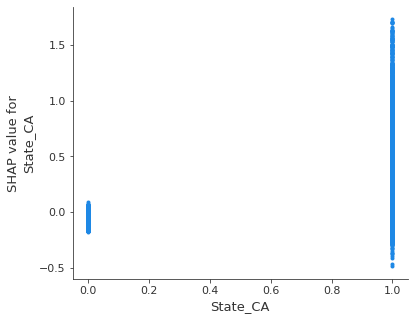

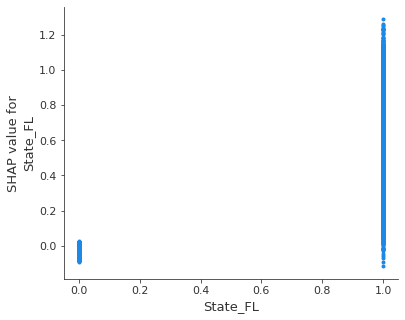

In [303]:
for column in X_train_full.columns:
    shap.dependence_plot(
        column,
        shap_values,
        X_train_full[X_train_full.columns],
        interaction_index = None
    )

<a id='4.0'></a>
# 4.0 Final Insights and Recommendations

<a id='4.1'></a>
## 4.1 Algorithm

The most appropriate models to use are tree based ones, as they have all performed better on all metrics (accuracy, precision, recall, f1_score) compared to the logistic regression and surprisingly, even a neural network. The best performing is XGBoost, suggesting this model is the best suited for predicting loan defaults for small businesses.

<a id='4.2'></a>
## 4.2 Recommendations Based on Model Interpretation

It appears that term length is crucial towards the success rate of paying off loans. Given that the majority of loan defaults occur where term length is under 100 months, extending term length to above this duration would be an important objective to a small business applying to a loan.

Being in the same state as your bank as a small business would also be critical. Because the majority of loans for companies that are in the same state as their banks have a low SHAP value vice versa, it would be highly advisable to choose a bank in the same state if you were a small business. This could be due to improved communications, an essential ingredient for business success.

It also appears that having your business in California and Florida, all other factors being equal, will increase loan default risk, due to the high SHAP values where California and Florida are equal to 1. This could be due to other factors that have not been accounted in the model, such as the fact that California is home to one of the largest tech startup ecosystems in the world. Given that this industry is notorious for having a high rate of failure, this unaccounted variable could be skewing the findings against California.

Being in the health and social insurance industry will likely reduce risk of default given that SHAP values are mostly negative if the company were in this industry. This makes sense as this industry has promising futures, as the US population is aging and that healthcare is essential no matter what the economic circumstances are. Thus, if an entrepreneur were to start a business and they were only concerned about not defaulting on their loans, then the best industry to target would be the health and social insurance industry.

<a id='4.3'></a>
## 4.3 Considerations

Because this dataset only has data up to 2014, some of these findings as well as the model may not perform very well if it were used today, given that the economic landscape has changed dramatically over the past 8 years. Thus, if more recent data regarding this problem were to be published on Kaggle, this could improve the practicality and applicability of the model.